## Importing libraries

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [96]:
import matplotlib
np.__version__, pd.__version__, sns.__version__, matplotlib.__version__

('2.0.2', '2.2.3', '0.13.2', '3.9.4')

## 1. Load data

In [97]:
df = pd.read_csv('Cars.csv')

In [98]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [99]:
# Check the shape of your data
df.shape

(8128, 13)

In [100]:
# Statistical info Hint: look up .describe()
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [101]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [102]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## 2. Exploratory Data Analysis

EDA is an essential step to inspect the data, so to better understand nature of the given data.

### Renaming

Now we would like to rename some of the following column names, so it's easy to write the code...

In [103]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [104]:
# rename columns
df.rename(columns = {'name':'brand'},  inplace = True)

In [105]:
# Notice that the column names changed
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [106]:
df=df[df['owner']!='Test Drive Car']

In [107]:
owner_mapping ={'First Owner': 1,'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4}
df['owner'] = df['owner'].map(owner_mapping)
print(df.head(5))

                          brand  year  selling_price  km_driven    fuel  \
0        Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1  Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Honda City 2017-2020 EXi  2006         158000     140000  Petrol   
3     Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
4        Maruti Swift VXI BSIII  2007         130000     120000  Petrol   

  seller_type transmission  owner     mileage   engine   max_power  \
0  Individual       Manual      1   23.4 kmpl  1248 CC      74 bhp   
1  Individual       Manual      2  21.14 kmpl  1498 CC  103.52 bhp   
2  Individual       Manual      3   17.7 kmpl  1497 CC      78 bhp   
3  Individual       Manual      1   23.0 kmpl  1396 CC      90 bhp   
4  Individual       Manual      1   16.1 kmpl  1298 CC    88.2 bhp   

                     torque  seats  
0            190Nm@ 2000rpm    5.0  
1       250Nm@ 1500-2500rpm    5.0  
2     12.7@ 2,700

In [108]:
df['engine'].value_counts()

engine
1248 CC    1017
1197 CC     832
998 CC      453
796 CC      444
2179 CC     389
           ... 
2650 CC       1
2446 CC       1
3498 CC       1
2776 CC       1
1950 CC       1
Name: count, Length: 121, dtype: int64

In [109]:
df.shape

(8123, 13)

In [110]:
df = df[~df['fuel'].isin(["CNG","LPG"])]
df.fuel.value_counts()

fuel
Diesel    4401
Petrol    3627
Name: count, dtype: int64

In [111]:
df.shape

(8028, 13)

In [112]:
df['mileage'] = df['mileage'].str.split().str.get(0)
df['mileage']=df['mileage'].astype(float)

df['engine'] = df['engine'].str.split().str.get(0)
df['engine']=df['engine'].astype(float)

df['max_power'] = df['max_power'].str.split().str.get(0)
df['max_power']=df['max_power'].astype(float)

df['brand'] = df['brand'].str.split().str.get(0)

df.drop(['torque'],axis=1,inplace=True)

df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [113]:
df.to_csv('Cleaned_data.csv')

In [154]:
def r2(self, y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)


In [155]:
def __init__(self, init_type='zero', input_dim=None):
    if init_type == 'zero':
        self.weights = np.zeros((input_dim, 1))
    elif init_type == 'xavier':
        lower, upper = -1.0 / np.sqrt(input_dim), 1.0 / np.sqrt(input_dim)
        self.weights = np.random.uniform(lower, upper, (input_dim, 1))
    else:
        raise ValueError("Invalid initialization type. Choose 'zero' or 'xavier'.")


In [156]:
def update_weights(self, X, y, learning_rate=0.01, use_momentum=False, momentum=0.9):
    m = X.shape[0]
    y_pred = X.dot(self.weights)
    gradient = (1/m) * X.T.dot(y_pred - y)
    
    if use_momentum:
        self.velocity = momentum * self.velocity + learning_rate * gradient
        self.weights -= self.velocity
    else:
        self.weights -= learning_rate * gradient


In [157]:
import matplotlib.pyplot as plt

def plot_feature_importance(self, feature_names):
    importance = np.abs(self.weights.flatten())  # Absolute value of coefficients
    plt.barh(feature_names, importance)
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.title("Feature Importance")
    plt.show()


## Feature Brand

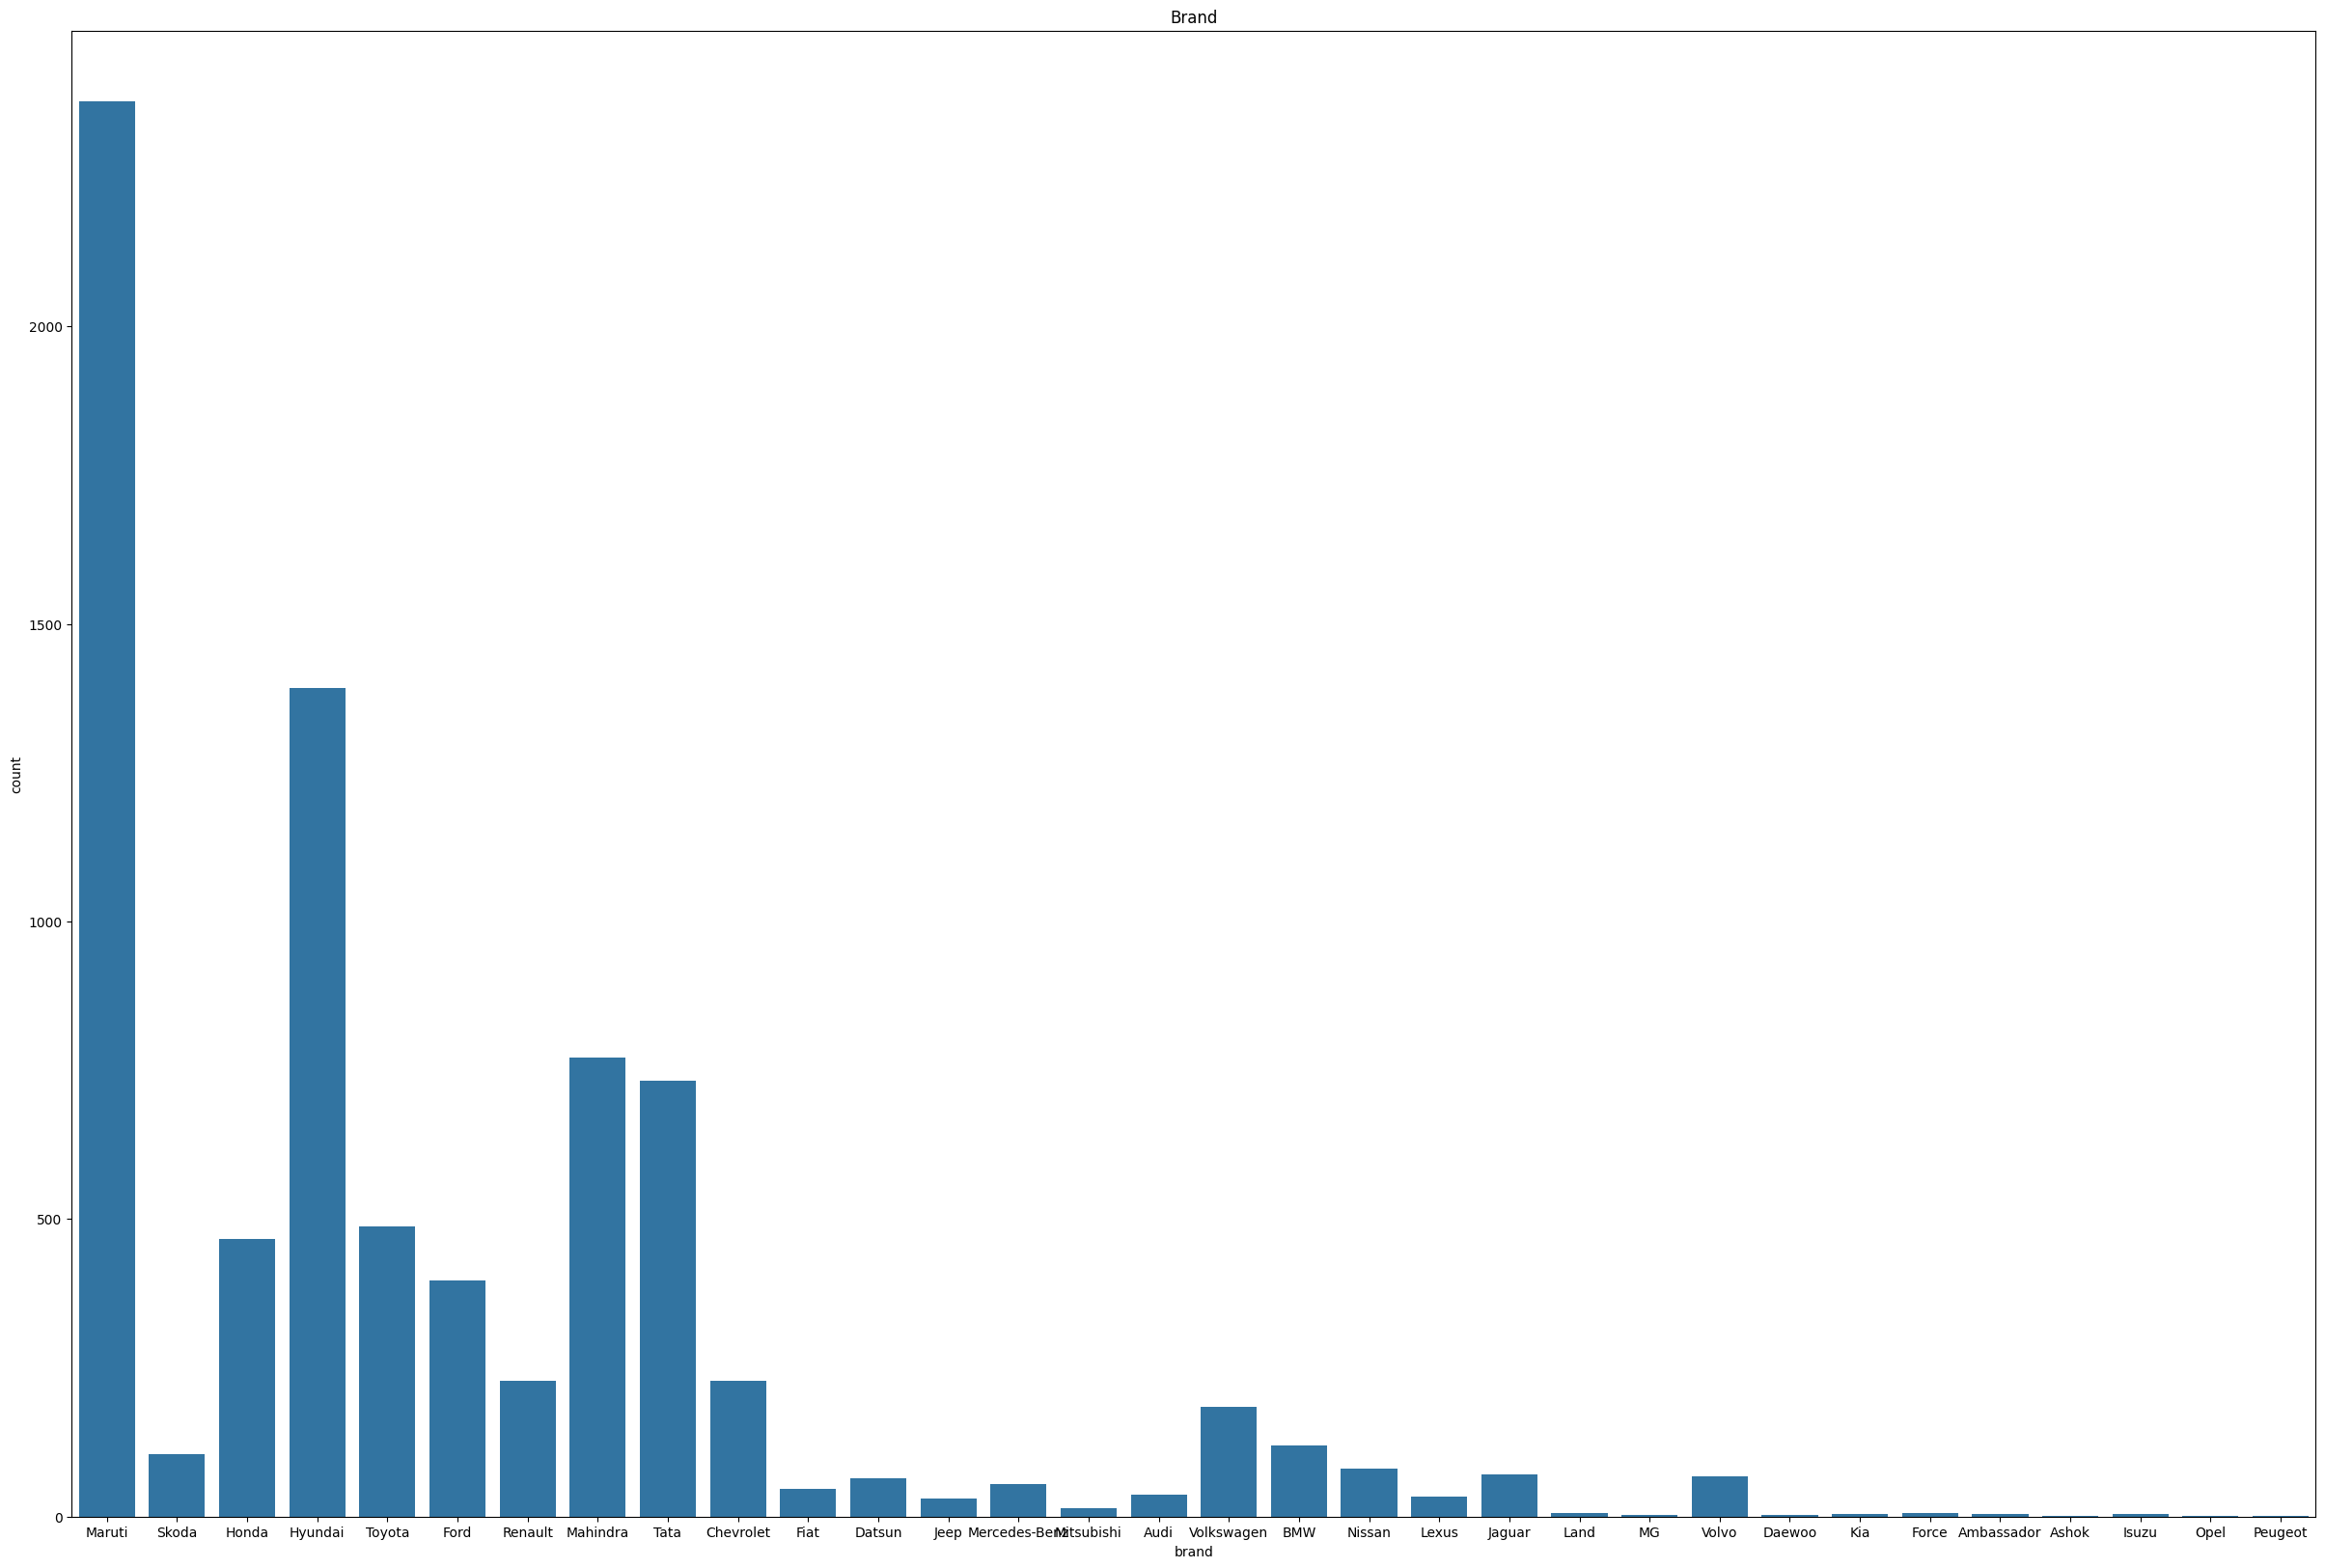

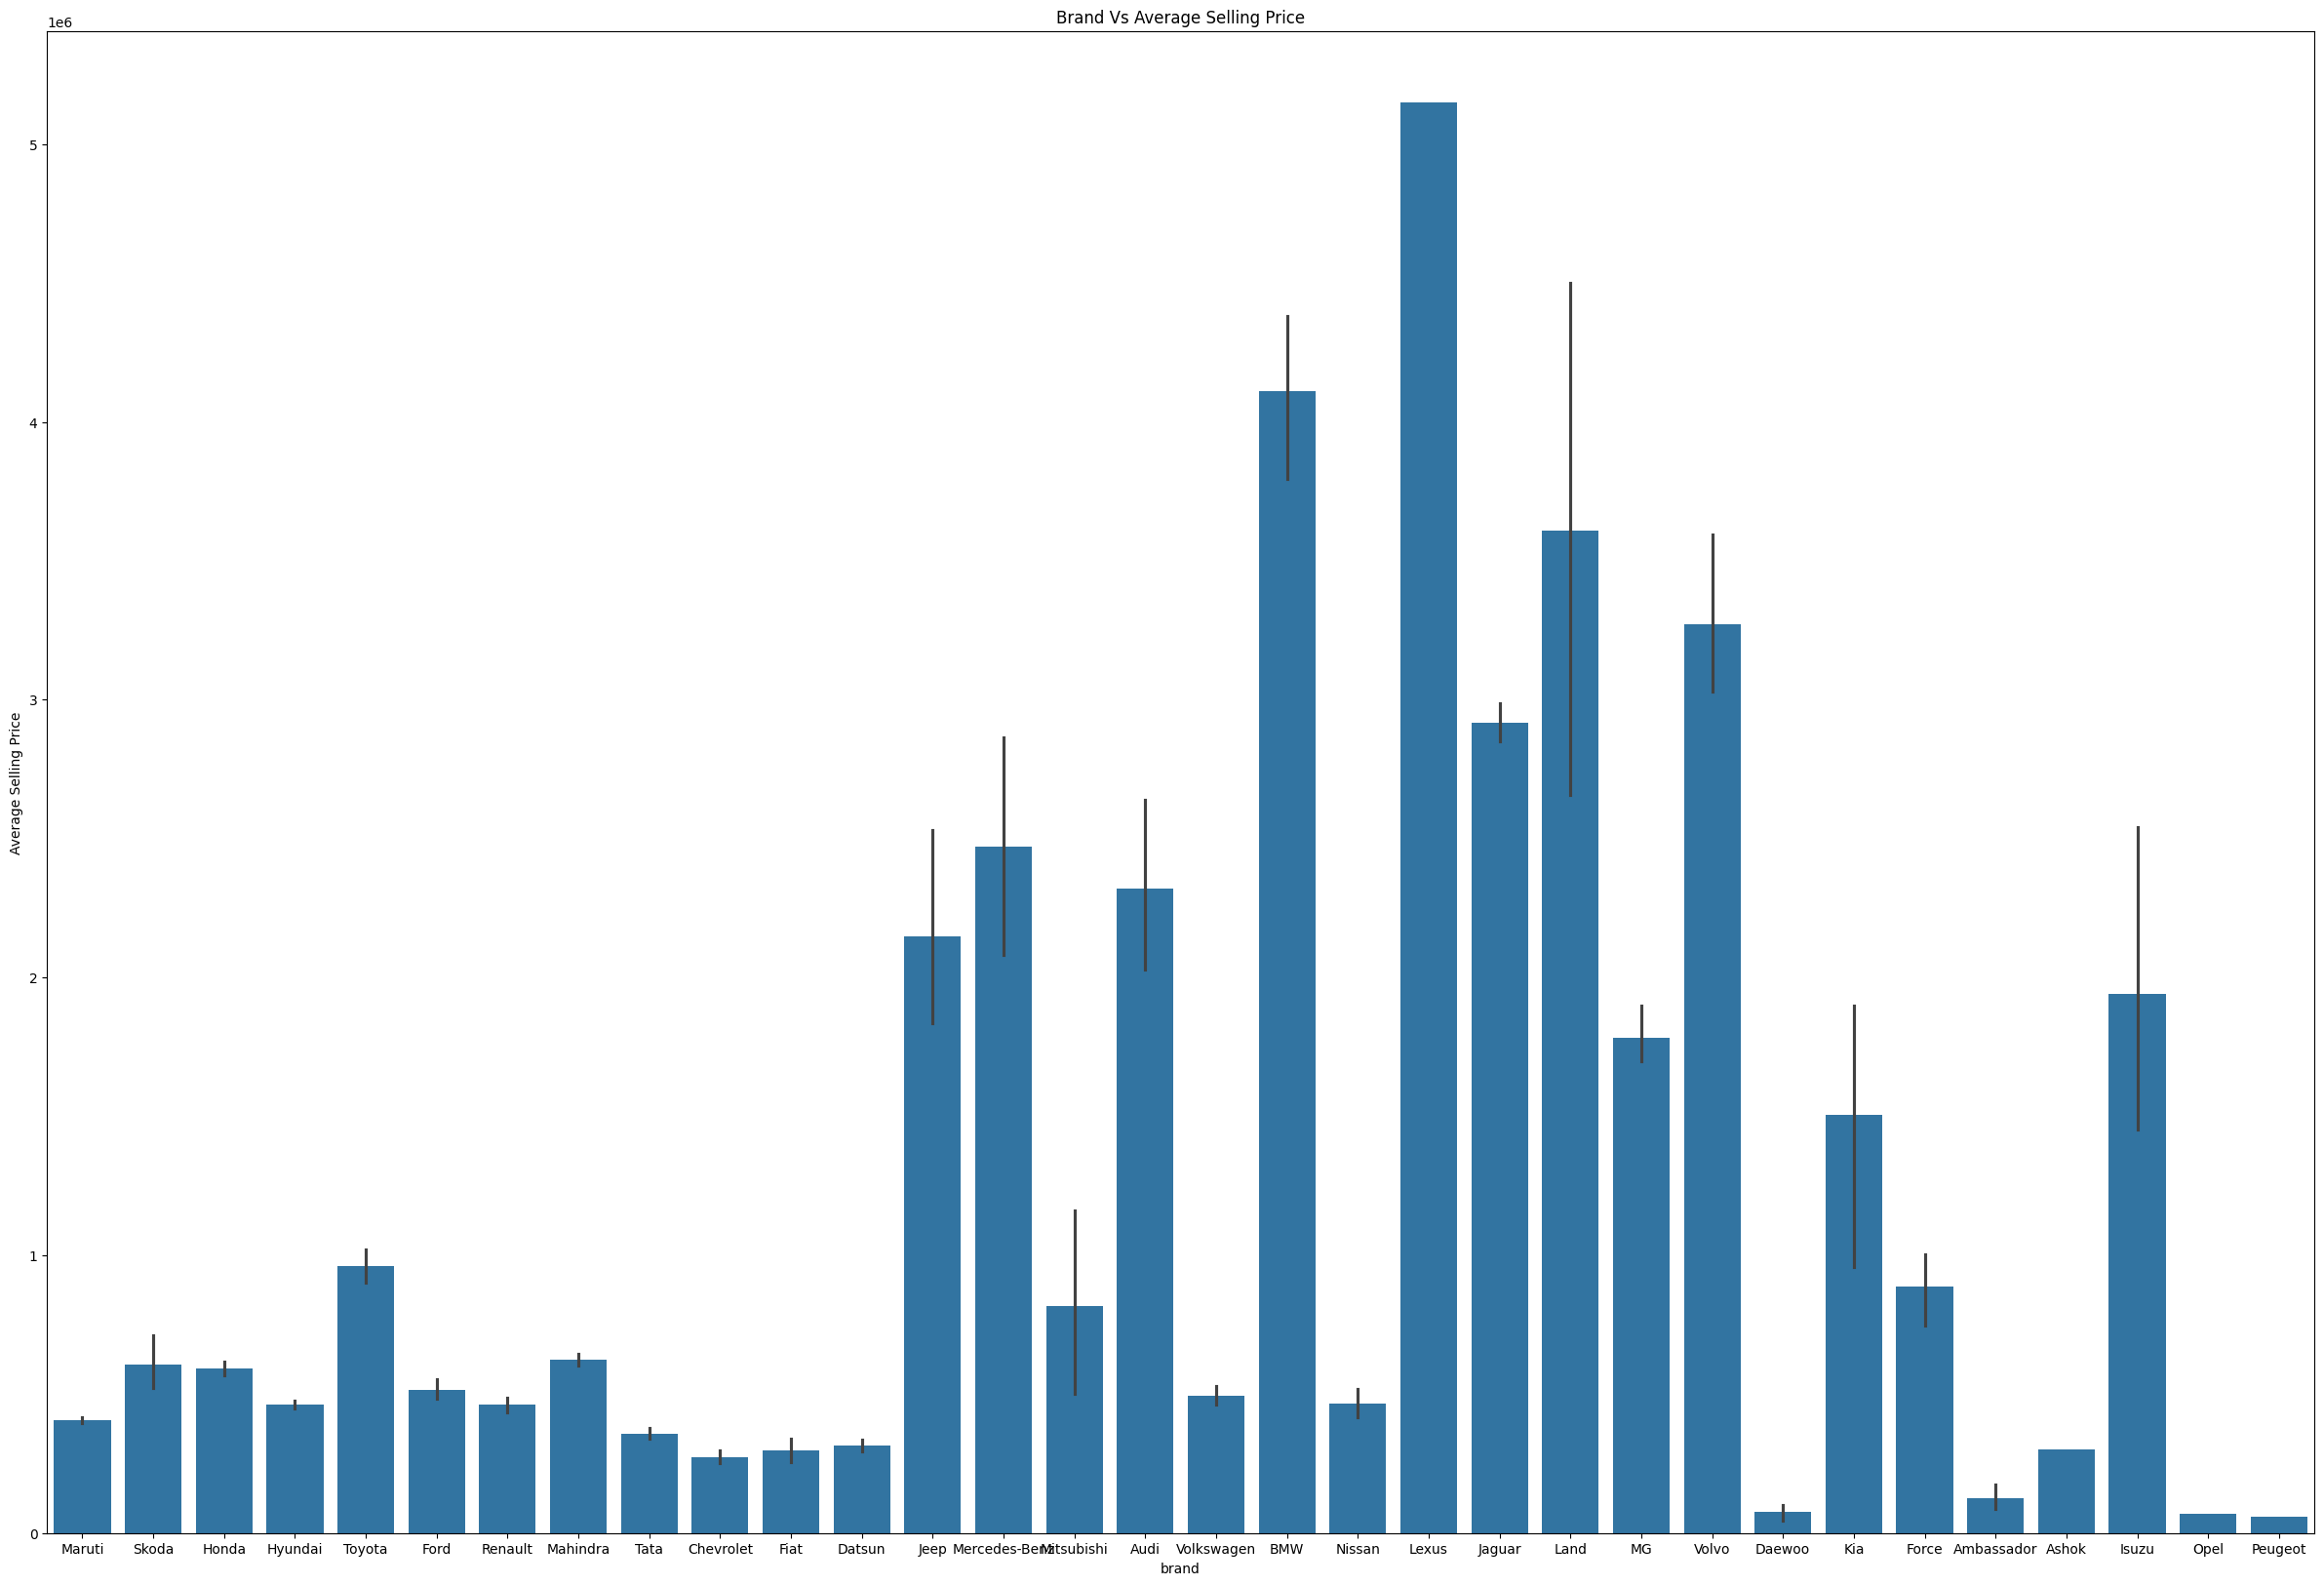

In [114]:
# Plotting the brand
plt.figure(figsize=(30,20))
plt.title('Brand')
sns.countplot(data = df, x='brand')
plt.show()

#Bar plot of brand vs average selling price
plt.figure(figsize=(30,20))
sns.barplot(x = df['brand'], y = df['selling_price'], estimator=np.average)
plt.title('Brand Vs Average Selling Price')
plt.ylabel("Average Selling Price")
plt.show()

## Feature Year

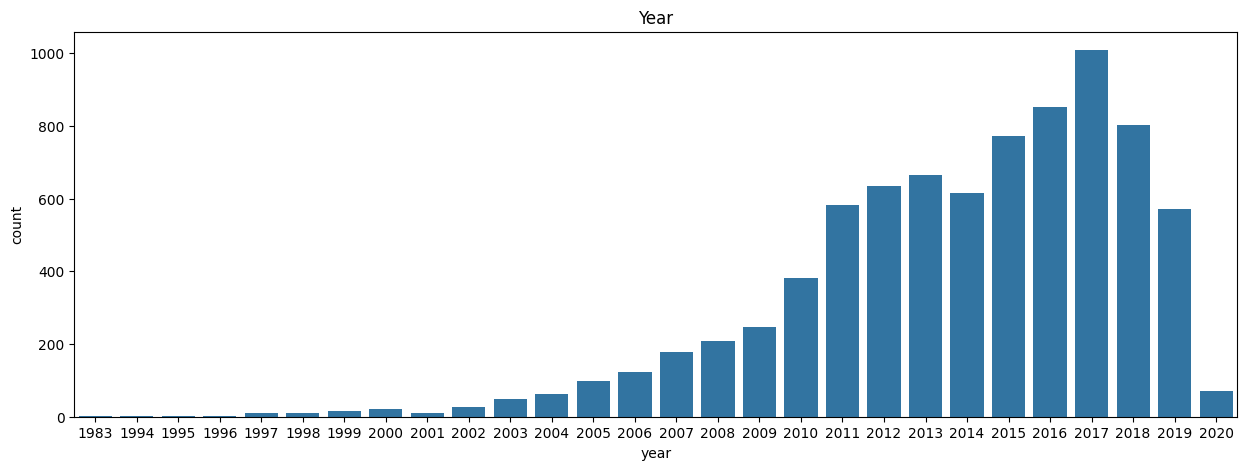

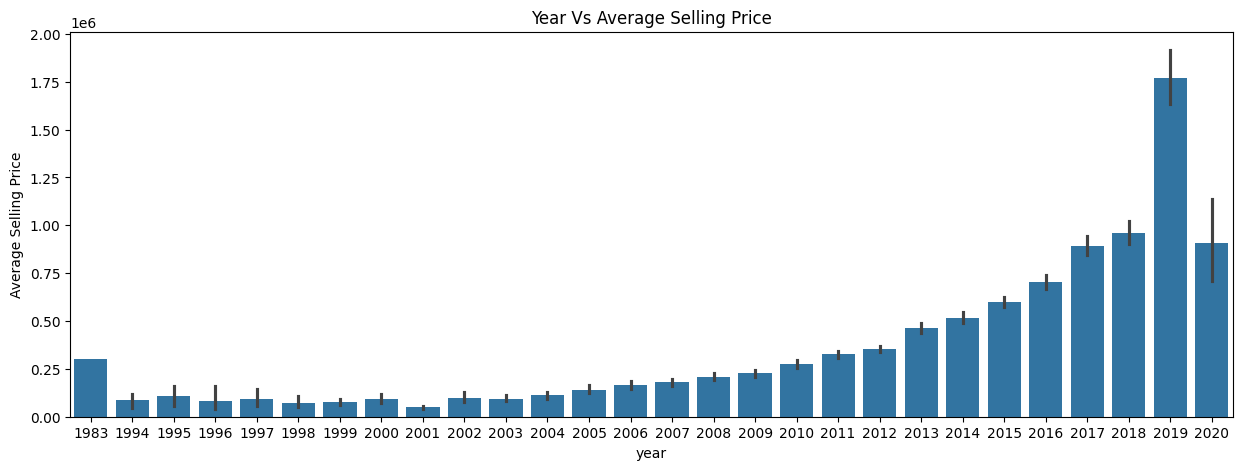

In [115]:
# Plotting the year
plt.figure(figsize=(15,5))
plt.title('Year')
sns.countplot(data = df, x='year')
plt.show()

#Bar plot of year vs average selling price
plt.figure(figsize=(15,5))
sns.barplot(x = df['year'], y = df['selling_price'], estimator=np.average)
plt.title('Year Vs Average Selling Price')
plt.ylabel("Average Selling Price")
plt.show()

## Feature Km Driven

Text(0.5, 1.0, 'km_driven Distribution')

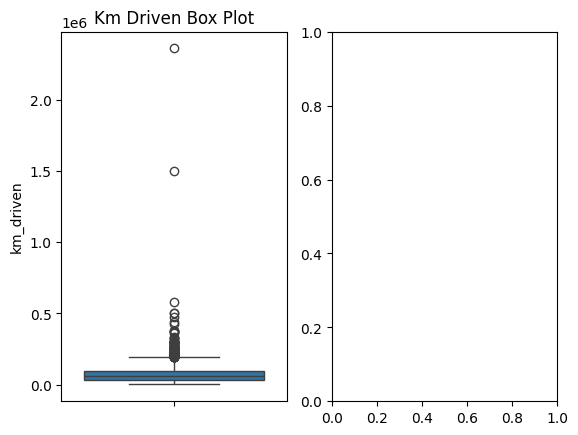

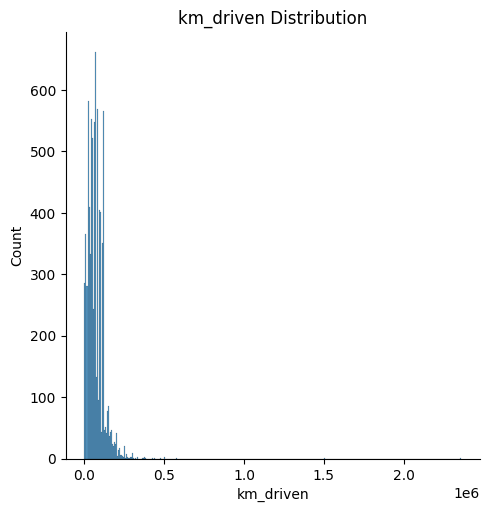

In [116]:
# Plotting the Km driven
plt.subplot(1,2,1)
sns.boxplot(df['km_driven'])
plt.title('Km Driven Box Plot')

plt.subplot(1,2,2)
sns.displot(df.km_driven)
plt.title('km_driven Distribution')

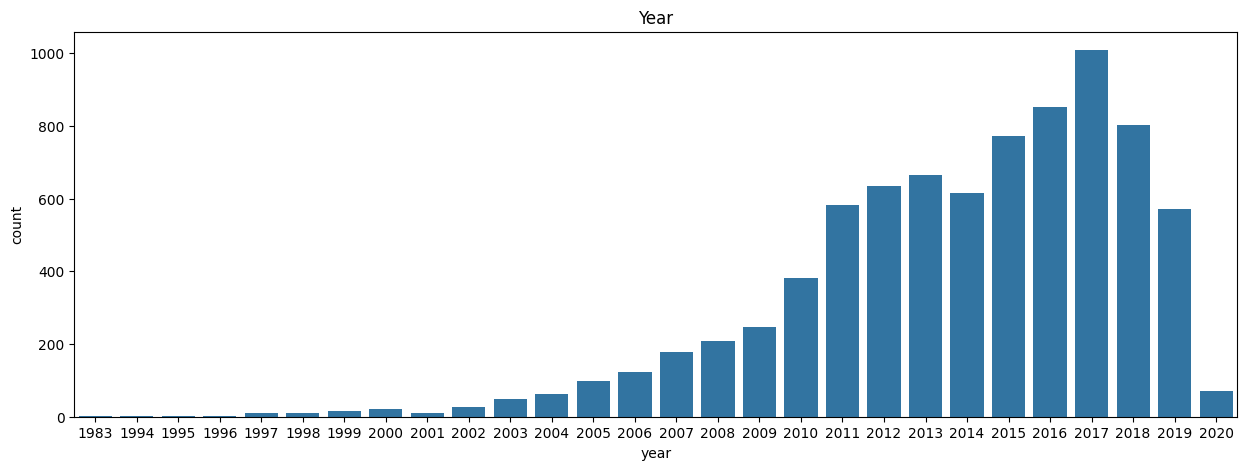

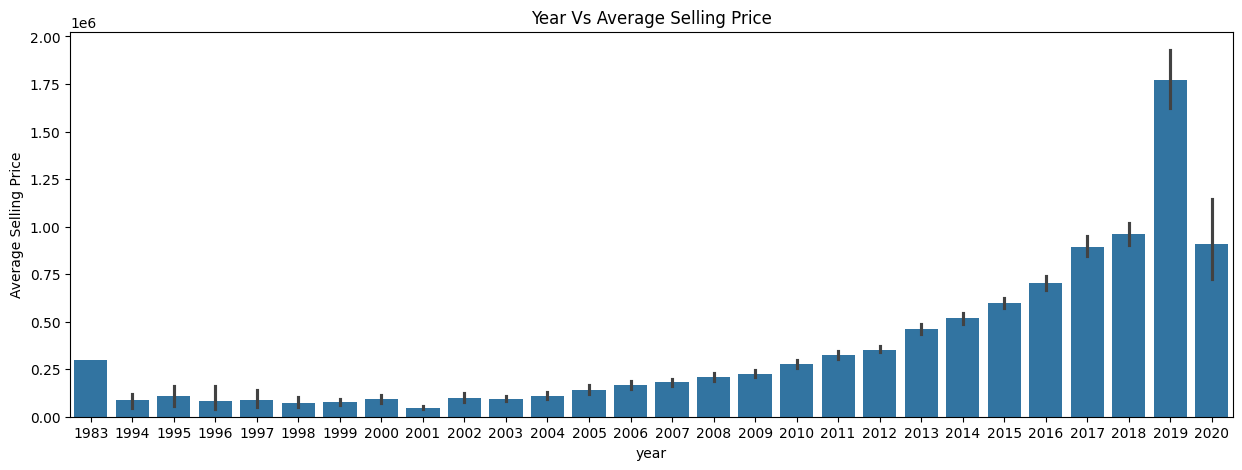

In [117]:
# Plotting the year
plt.figure(figsize=(15,5))
plt.title('Year')
sns.countplot(data = df, x='year')
plt.show()

#Bar plot of year vs average selling price
plt.figure(figsize=(15,5))
sns.barplot(x = df['year'], y = df['selling_price'], estimator=np.average)
plt.title('Year Vs Average Selling Price')
plt.ylabel("Average Selling Price")
plt.show()

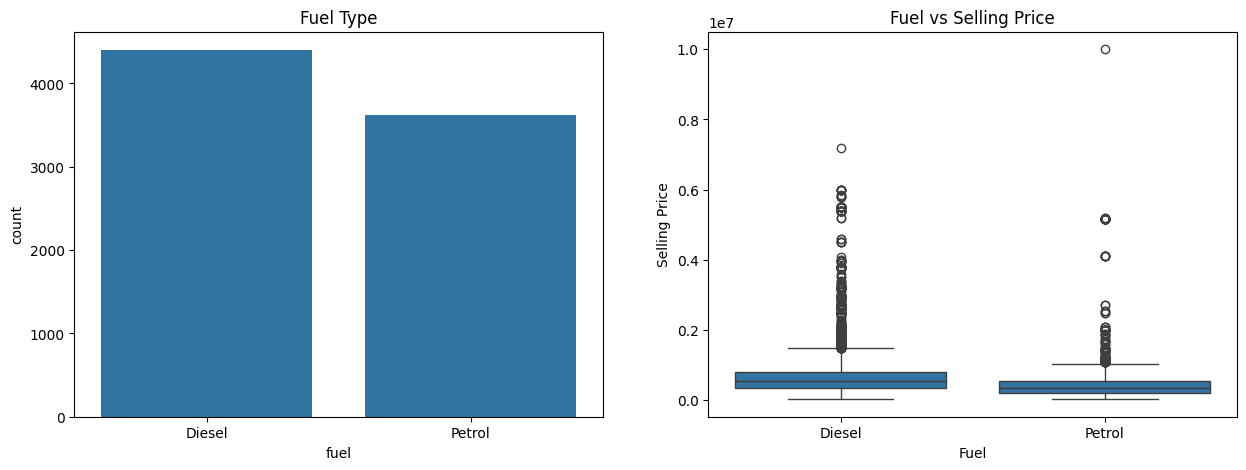

In [118]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'fuel')
plt.title('Fuel Type')

plt.subplot(1,2,2)
plt.title('Fuel vs Selling Price')
plt.xlabel('Fuel')
plt.ylabel('Selling Price')
sns.boxplot(data = df, x = 'fuel', y = 'selling_price')
plt.show()

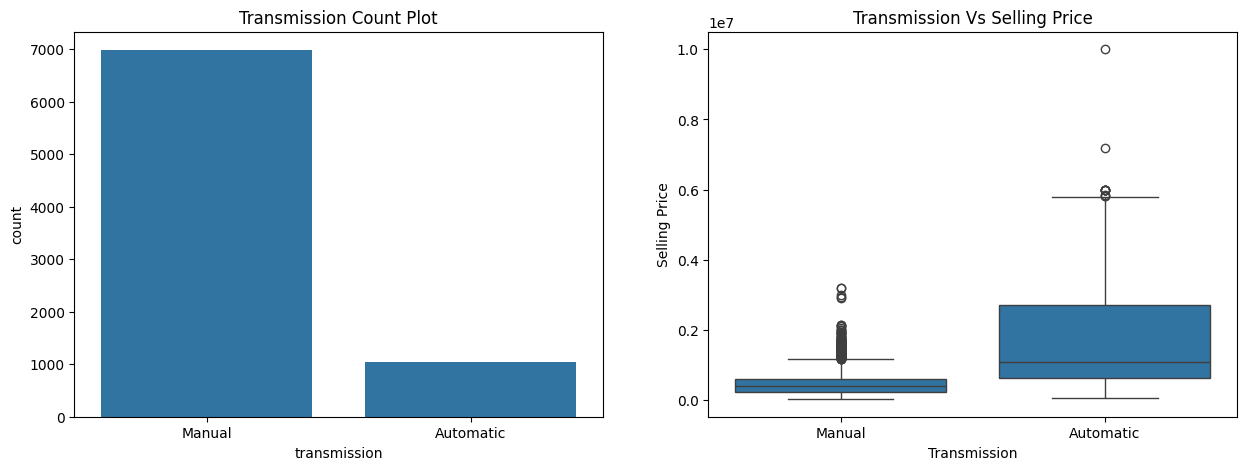

In [119]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Transmission Count Plot')
sns.countplot(data = df, x = 'transmission')

plt.subplot(1,2,2)
plt.title('Transmission Vs Selling Price')
sns.boxplot(x = df["transmission"], y = df["selling_price"])
plt.ylabel("Selling Price")
plt.xlabel("Transmission")
plt.show()

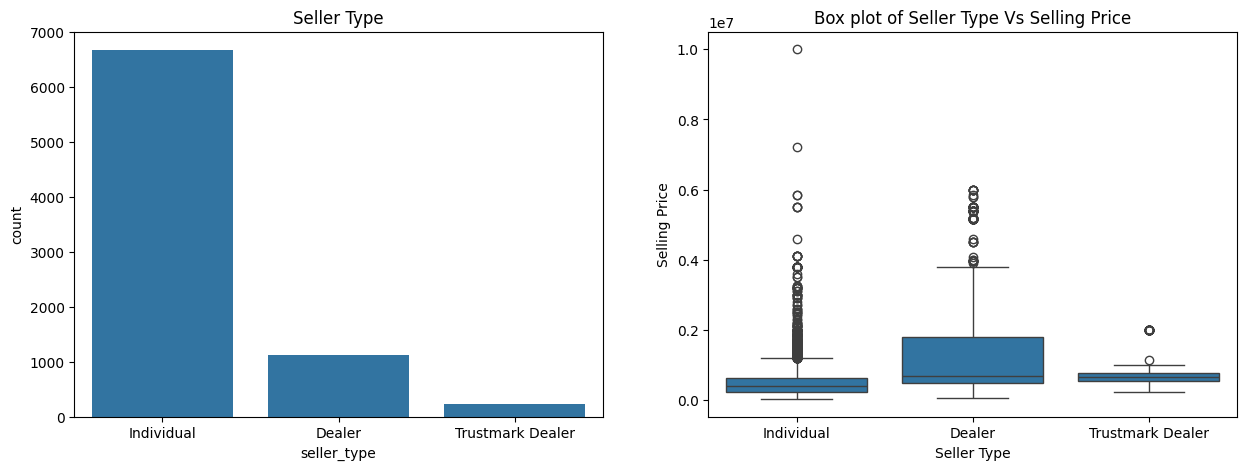

In [120]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x = 'seller_type')
plt.title('Seller Type')

plt.subplot(1,2,2)
sns.boxplot(x = df["seller_type"], y = df["selling_price"])
plt.title('Box plot of Seller Type Vs Selling Price')
plt.ylabel("Selling Price")
plt.xlabel("Seller Type")
plt.show()

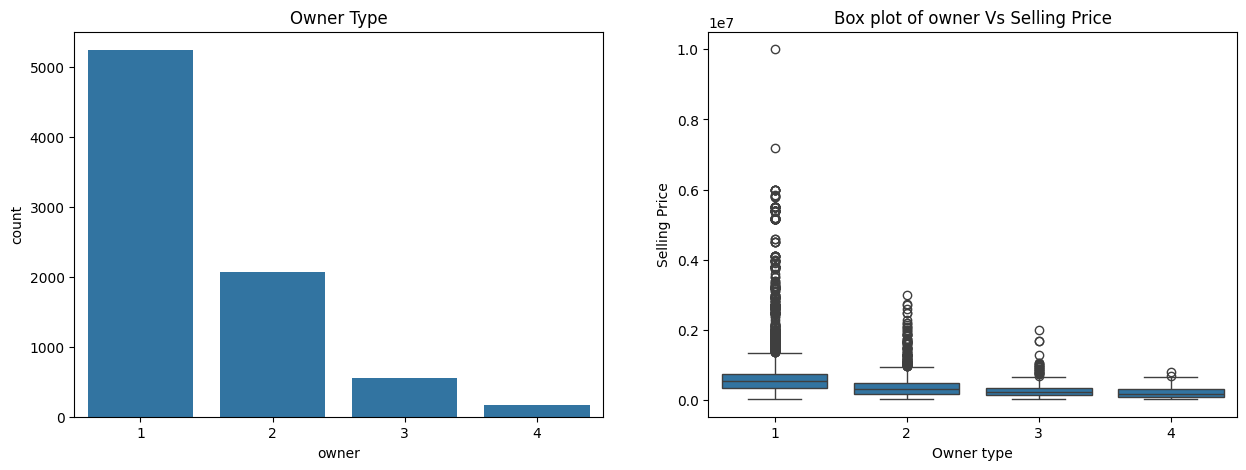

In [121]:
# Plotting the owner type
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x='owner')
plt.title('Owner Type')

# Box plot of owner type vs selling price
plt.subplot(1,2,2)
sns.boxplot(x = df["owner"], y = df["selling_price"])
plt.title('Box plot of owner Vs Selling Price')
plt.ylabel("Selling Price")
plt.xlabel("Owner type")
plt.show()

# {'First_owner': 1,'Second_owner': 2, 'Third_owner': 3, 'Fourth_and_above_owner': 4}

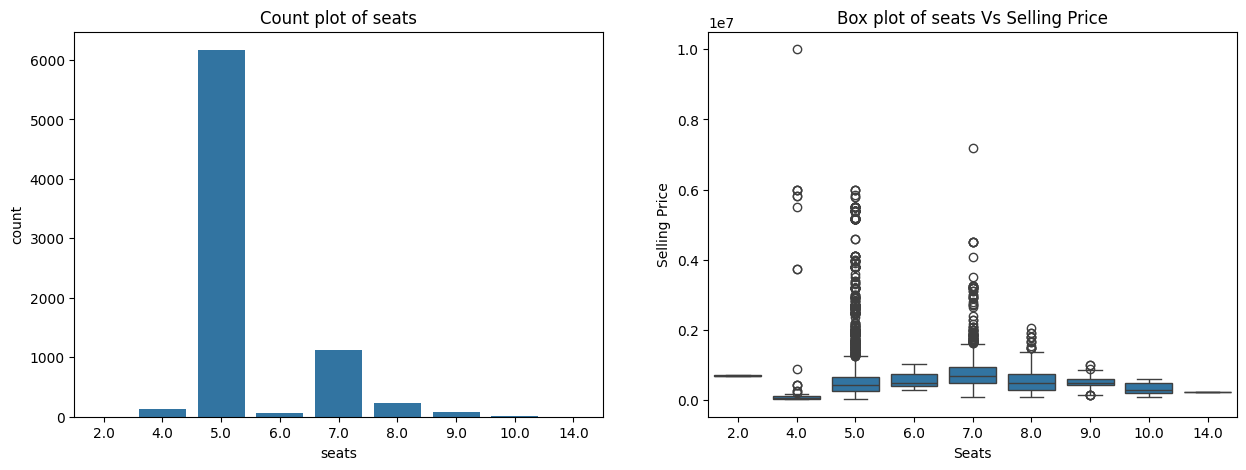

In [122]:
#Plotting the seats
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(data = df, x='seats')
plt.title('Count plot of seats')

# Box plot of owner type vs selling price
plt.subplot(1,2,2)
sns.boxplot(x = df["seats"], y = df["selling_price"])
plt.title('Box plot of seats Vs Selling Price')
plt.ylabel("Selling Price")
plt.xlabel("Seats")
plt.show()

#### Distribution plot

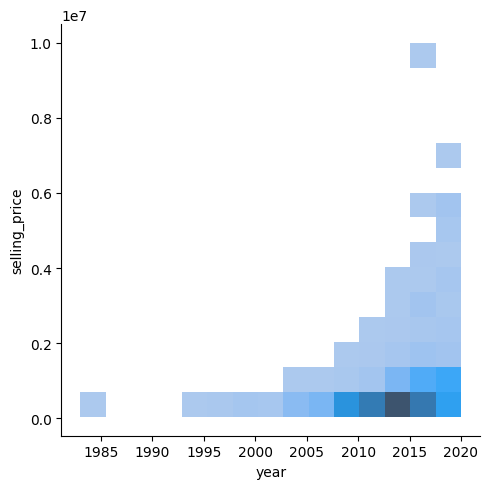

In [123]:
sns.displot(x='year', y='selling_price', data=df, bins=15)

<Axes: title={'center': 'Mileage Distribution Plot'}, xlabel='mileage', ylabel='Count'>

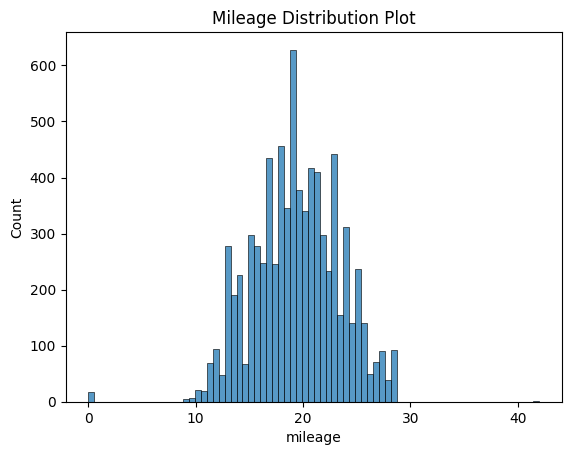

In [124]:
plt.title('Mileage Distribution Plot')
sns.histplot(df['mileage'])

<Axes: title={'center': 'Max power Dirstribution plot'}, xlabel='max_power', ylabel='Count'>

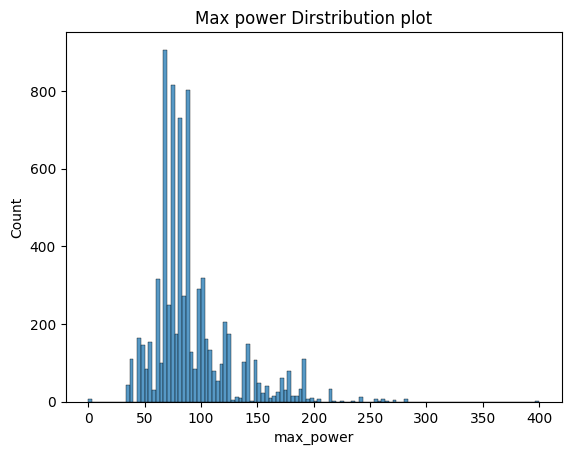

In [125]:
plt.title('Max power Dirstribution plot')
sns.histplot(df['max_power'])

<Axes: title={'center': 'engine Dirstribution plot'}, xlabel='engine', ylabel='Count'>

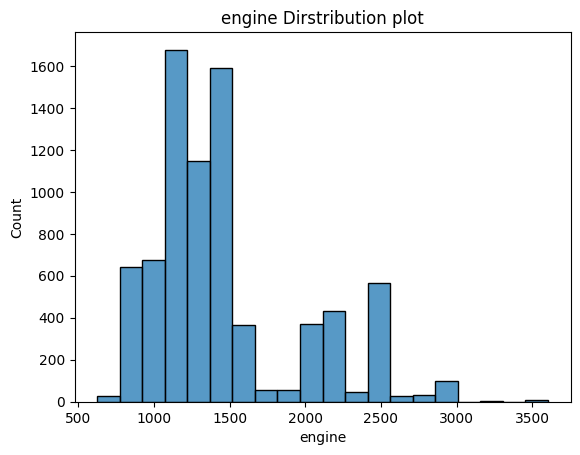

In [126]:
plt.title('engine Dirstribution plot')
sns.histplot(df['engine'],bins=20)

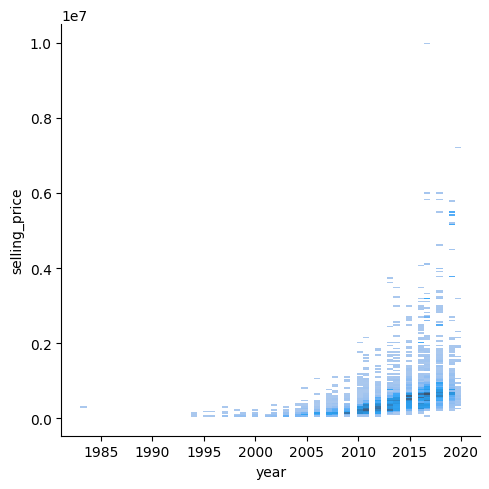

In [127]:
sns.displot(data = df, x = 'year', y='selling_price')

#### Correlation Matrix

Let's use correlation matrix to find strong factors predicting the car price.  It's also for checking whether certain features are too correlated.

<Axes: >

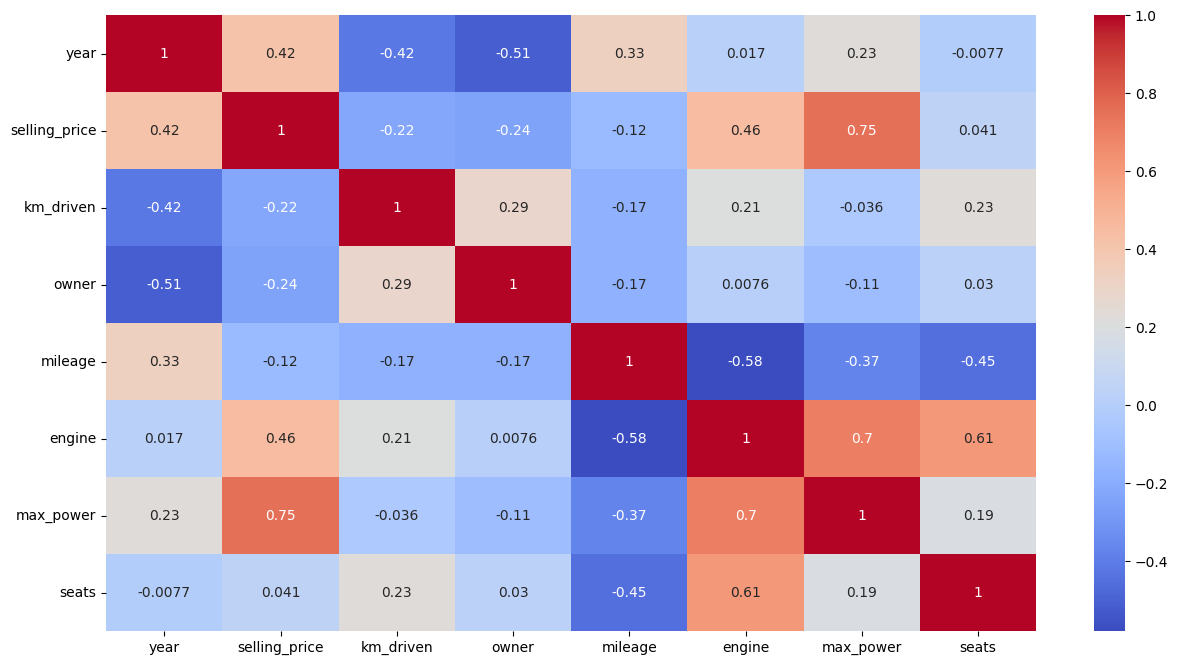

In [128]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

#### Label encoding for fuel, transmission and seller_type



In [129]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [130]:
import sklearn

In [131]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()

array([0, 1])

In [132]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [133]:
df['transmission'] = le.fit_transform(df['transmission'])
df['transmission'].unique() 

array([1, 0])

In [134]:
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [135]:
df['seller_type'] = le.fit_transform(df['seller_type'])
df['seller_type'].unique()

array([1, 0, 2])

In [136]:
le.classes_

array(['Dealer', 'Individual', 'Trustmark Dealer'], dtype=object)

## One hot encoding for brands

In [137]:
df['brand'].isna().sum()

np.int64(0)

In [138]:
df.reset_index(inplace=True)

In [139]:
from sklearn.preprocessing import OneHotEncoder
brand_ohe = OneHotEncoder(drop='first').fit(df[['brand']])
brand_array = brand_ohe.transform(df[['brand']]).toarray()

In [140]:
print(brand_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [141]:
brand_ohe.categories_[0]

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [142]:
brand_labels = brand_ohe.categories_[0]

In [143]:
print(brand_labels)

['Ambassador' 'Ashok' 'Audi' 'BMW' 'Chevrolet' 'Daewoo' 'Datsun' 'Fiat'
 'Force' 'Ford' 'Honda' 'Hyundai' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Land'
 'Lexus' 'MG' 'Mahindra' 'Maruti' 'Mercedes-Benz' 'Mitsubishi' 'Nissan'
 'Opel' 'Peugeot' 'Renault' 'Skoda' 'Tata' 'Toyota' 'Volkswagen' 'Volvo']


In [144]:
brand_df = pd.DataFrame(brand_array,columns=brand_labels[1:])

In [145]:
brand_df.head(5)

,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,Force,Ford,Honda,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [146]:
df = pd.concat([df,brand_df], axis=1)

In [147]:
df.head(5)

,index,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
0,0,Maruti,2014,450000,145500,0,1,1,1,23.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,Skoda,2014,370000,120000,0,1,1,2,21.14,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2,Honda,2006,158000,140000,1,1,1,3,17.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,Hyundai,2010,225000,127000,0,1,1,1,23.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Maruti,2007,130000,120000,1,1,1,1,16.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [149]:
# Let's check out heatmap
plt.figure(figsize = (20,20))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is not here...

ValueError: could not convert string to float: 'Maruti'

<Figure size 2000x2000 with 0 Axes>

In [152]:
df.describe()

,index,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
count,8028.000000,8028.000000,8.028000e+03,8.028000e+03,8028.000000,8028.000000,8028.000000,8028.000000,7814.000000,7814.000000,...,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000,8028.000000
mean,4062.523418,2013.815521,6.403937e+05,6.977314e+04,0.451794,0.890010,0.869706,1.458022,19.391962,1462.914640,...,0.001744,0.010090,0.000125,0.000125,0.028401,0.013079,0.091305,0.060787,0.023044,0.008346
std,2350.205169,4.030836,8.027015e+05,5.664419e+04,0.497702,0.395861,0.336648,0.715283,4.001972,504.759742,...,0.041726,0.099946,0.011161,0.011161,0.166125,0.113621,0.288061,0.238955,0.150054,0.090979
min,0.000000,1983.000000,2.999900e+04,1.000000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,624.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.750000,2011.000000,2.600000e+05,3.500000e+04,0.000000,1.000000,1.000000,1.000000,16.780000,1197.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4065.500000,2015.000000,4.500000e+05,6.000000e+04,0.000000,1.000000,1.000000,1.000000,19.300000,1248.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6102.250000,2017.000000,6.800000e+05,9.800000e+04,1.000000,1.000000,1.000000,2.000000,22.320000,1582.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8127.000000,2020.000000,1.000000e+07,2.360457e+06,1.000000,2.000000,1.000000,4.000000,42.000000,3604.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [151]:
df['max_power'].loc[df['max_power'] == 0].count()

np.int64(6)

#### Predictive Power Score


In [150]:
pip install ppscore

  Using cached ppscore-1.3.0-py2.py3-none-any.whl
  Using cached pandas-1.5.3-cp39-cp39-macosx_10_9_x86_64.whl.metadata (11 kB)
Using cached pandas-1.5.3-cp39-cp39-macosx_10_9_x86_64.whl (12.0 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.3
    Uninstalling pandas-2.2.3:
      Successfully uninstalled pandas-2.2.3
Note: you may need to restart the kernel to use updated packages.


In [153]:
import ppscore as pps

# before using pps, let's drop country and year
dfcopy = df.copy()
# dfcopy.head(5)

# #this needs some minor preprocessing because seaborn.heatmap unfortunately does not accept tidy data
matrix_df = pps.matrix(dfcopy)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')


# #plot
plt.figure(figsize = (15,8))
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

TypeError: unstack() takes from 2 to 3 positional arguments but 4 were given

<Axes: ylabel='selling_price'>

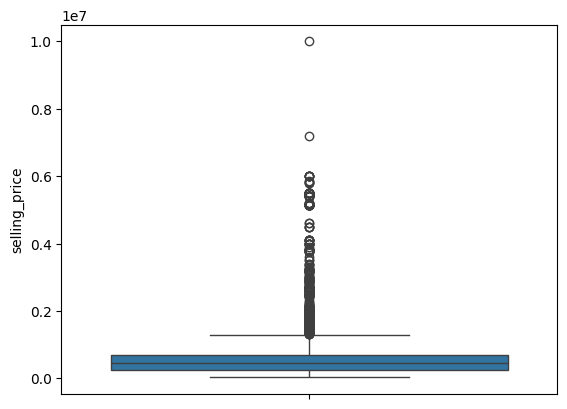

In [301]:
sns.boxplot(df['selling_price'])

## 3. Feature Engineering

I chose 4 Features. 3 Features(year,max_power,mileage) are chosen based on the ppscore and for the brand features, I assume that most of the people predict the car price based on the brand name. 


## 4. Feature selection

In [302]:
brand_cats = list(brand_ohe.categories_[0][1:])
features = ['year','max_power','mileage'] + brand_cats

In [303]:
features

['year',
 'max_power',
 'mileage',
 'Ashok',
 'Audi',
 'BMW',
 'Chevrolet',
 'Daewoo',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Kia',
 'Land',
 'Lexus',
 'MG',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mitsubishi',
 'Nissan',
 'Opel',
 'Peugeot',
 'Renault',
 'Skoda',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [304]:
df.columns

Index(['index', 'brand', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner', 'mileage', 'engine',
       'max_power', 'seats', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel', 'Peugeot', 'Renault',
       'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='object')

In [305]:
X = df[features]

y = np.log(df["selling_price"])
# y = df["selling_price"]

### Train test split

In [306]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 32)

## 5. Preprocessing

### Null values

In [307]:
#check for null values
X_train[features].isna().sum()

year               0
max_power        152
mileage          155
Ashok              0
Audi               0
BMW                0
Chevrolet          0
Daewoo             0
Datsun             0
Fiat               0
Force              0
Ford               0
Honda              0
Hyundai            0
Isuzu              0
Jaguar             0
Jeep               0
Kia                0
Land               0
Lexus              0
MG                 0
Mahindra           0
Maruti             0
Mercedes-Benz      0
Mitsubishi         0
Nissan             0
Opel               0
Peugeot            0
Renault            0
Skoda              0
Tata               0
Toyota             0
Volkswagen         0
Volvo              0
dtype: int64

In [308]:
X_test[features].isna().sum()

year              0
max_power        56
mileage          59
Ashok             0
Audi              0
BMW               0
Chevrolet         0
Daewoo            0
Datsun            0
Fiat              0
Force             0
Ford              0
Honda             0
Hyundai           0
Isuzu             0
Jaguar            0
Jeep              0
Kia               0
Land              0
Lexus             0
MG                0
Mahindra          0
Maruti            0
Mercedes-Benz     0
Mitsubishi        0
Nissan            0
Opel              0
Peugeot           0
Renault           0
Skoda             0
Tata              0
Toyota            0
Volkswagen        0
Volvo             0
dtype: int64

In [309]:
y_train.isna().sum()

0

In [310]:
y_test.isna().sum()

0

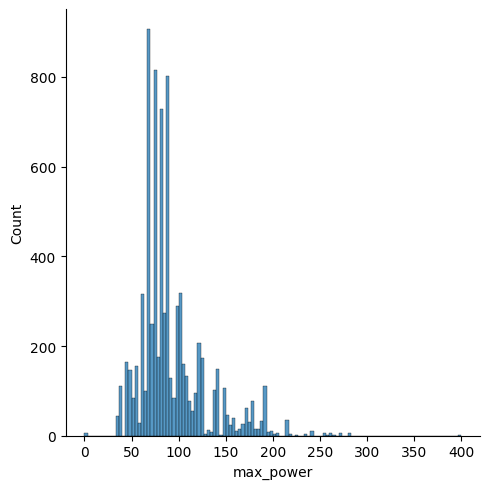

In [311]:
sns.displot(data=df, x='max_power')

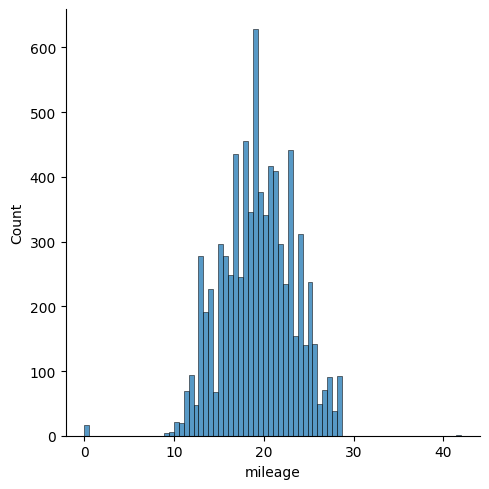

In [312]:
sns.displot(data=df, x='mileage')

In [313]:
#X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [314]:
#X_test['engine'].fillna(X_train['engine'].median(), inplace=True)
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

In [315]:
max_power_default = X_train['max_power'].median()
mileage_default = X_train['mileage'].mean()

In [316]:
#check again
X_train[features].isna().sum()

year             0
max_power        0
mileage          0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [317]:
X_test[features].isna().sum()

year             0
max_power        0
mileage          0
Ashok            0
Audi             0
BMW              0
Chevrolet        0
Daewoo           0
Datsun           0
Fiat             0
Force            0
Ford             0
Honda            0
Hyundai          0
Isuzu            0
Jaguar           0
Jeep             0
Kia              0
Land             0
Lexus            0
MG               0
Mahindra         0
Maruti           0
Mercedes-Benz    0
Mitsubishi       0
Nissan           0
Opel             0
Peugeot          0
Renault          0
Skoda            0
Tata             0
Toyota           0
Volkswagen       0
Volvo            0
dtype: int64

In [318]:
y_train.isna().sum(), y_test.isna().sum()

(0, 0)

### Checking Outliers

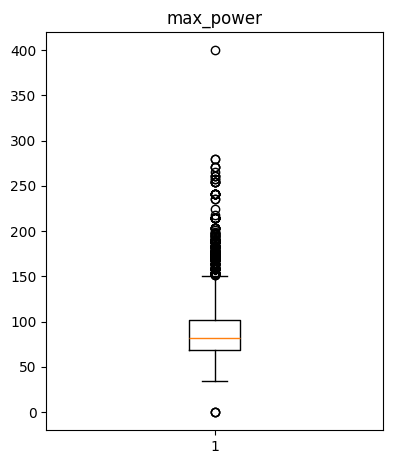

In [319]:
# Create a dictionary of columns.
#col_dict = {'engine':1,'max_power':2,'mileage':3}
col_dict = {'max_power':1}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [320]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [321]:
numeric_cols = X_train.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    outlier_count(col)



---------------year---------------

Number of outliers: 46
Percent of data that is outlier: 0.82%

---------------max_power---------------

Number of outliers: 395
Percent of data that is outlier: 7.03%

---------------mileage---------------

Number of outliers: 17
Percent of data that is outlier: 0.3%

---------------Audi---------------

Number of outliers: 32
Percent of data that is outlier: 0.57%

---------------BMW---------------

Number of outliers: 82
Percent of data that is outlier: 1.46%

---------------Chevrolet---------------

Number of outliers: 159
Percent of data that is outlier: 2.83%

---------------Daewoo---------------

Number of outliers: 2
Percent of data that is outlier: 0.04%

---------------Datsun---------------

Number of outliers: 46
Percent of data that is outlier: 0.82%

---------------Fiat---------------

Number of outliers: 32
Percent of data that is outlier: 0.57%

---------------Force---------------

Number of outliers: 5
Percent of data that is outlier: 

### Scaling

In [322]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_scale_features = ['year','max_power','mileage']
X_train[num_scale_features] = scaler.fit_transform(X_train[num_scale_features])
X_test[num_scale_features]  = scaler.transform(X_test[num_scale_features])

In [323]:
X_train

,year,max_power,mileage,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
6713,-0.955836,-0.642479,-0.065265,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2441,-2.964379,-1.560897,-0.827955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6993,-0.202633,-0.076217,-0.654500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2502,0.048435,-0.698158,1.082595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3544,1.052707,0.217676,1.136162,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4030,0.801639,0.999193,0.082681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2940,-1.206904,0.763848,-0.598383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1334,0.299503,-0.269372,-0.113731,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1579,1.052707,1.793050,-0.445335,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [324]:
X_test

,year,max_power,mileage,Ashok,Audi,BMW,Chevrolet,Daewoo,Datsun,Fiat,...,Mitsubishi,Nissan,Opel,Peugeot,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo
560,1.052707,-0.189010,0.858125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3818,-0.955836,-0.843383,-0.343303,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4024,0.299503,-0.269372,-0.062715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6545,1.052707,0.494063,0.455098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3473,-1.457972,-1.618298,0.090334,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4902,-0.202633,-0.498977,1.034130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7649,-0.704768,0.304639,-1.669719,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5884,-3.466514,-1.560897,-0.827955,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3100,1.052707,-0.698445,1.082595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [325]:
y_train

6713    12.206073
2441    11.002100
6993    12.765688
2502    13.217674
3544    13.458836
          ...    
4030    13.997832
2940    12.765688
1334    13.049793
1579    14.269766
2775    12.429216
Name: selling_price, Length: 5619, dtype: float64

In [326]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 34)
Shape of X_test:  (2409, 34)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## 6. Modeling

In [327]:
import mlflow
import os
import mlflow.sklearn

#This is for dockerized method
#We build two docker containers, one for jupyter notebook and one for mlflow
#Therefore, We need to set the tracking uri to the mlflow container

mlflow.set_tracking_uri("http://localhost:5001")

# os.environ['LOGNAME']='rachel'

# mlflow.set_experiment(experiment_name='rach_mlassignment2')

In [328]:
os.environ['LOGNAME']='rachel'


In [329]:
mlflow.set_experiment(experiment_name='rachel_mlassignment2')

<Experiment: artifact_location='mlflow-artifacts:/297688301421410131', creation_time=1725341738724, experiment_id='297688301421410131', last_update_time=1725341738724, lifecycle_stage='active', name='rachel_mlassignment2', tags={}>

In [331]:
from sklearn.preprocessing import PolynomialFeatures

In [332]:
#Putting 0 for bias
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)

intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [333]:
# X_train = pd.DataFrame(X_train)
# X_test = pd.DataFrame(X_test)

In [334]:
type(X_train)

numpy.ndarray

In [335]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [336]:
type(y_train)

numpy.ndarray

While concatenating the intercept, type of X_train and X_test changed into numpy array. Therefore, I changed y_train into numpy arrary.

In [93]:
from sklearn.model_selection import KFold
from math import sqrt
import numpy as np
#Class
class LinearRegression(object):
    kfold = KFold(n_splits=5)

    #init function
    def __init__(self, regularization, lr, method, momentum, init_theta, num_epochs=500, bs=50, cv= kfold):
    # def __init__(self, regularization, lr, method, num_epochs=500, bs=50, cv= kfold):
       self.lr = lr
       self.regularization = regularization
       self.momentum = momentum
       self.init_theta = init_theta
       self.num_epochs = num_epochs
       self.bs = bs
       self.method = method
       self.cv = cv
       self.prev_step = 0 # Initialize velocity for momentum as None; will set it later
    
    #mse
    def mse(self,ytrue,ypred):
        # MSE = (ytruee-ypred)**2.sum()/
        return ((ytrue-ypred)**2).sum()/ytrue.shape[0]
    
    #r2 score function
    def r2_score(self, ytrue, ypred):
        return 1 - ((((ypred-ytrue)**2).sum())/(((ytrue-ytrue.mean())**2).sum()))
    
    #fit Function
    def fit(self, X_train, y_train):

        #create a list of keeping kfold scores
        self.kfold_scores = []

        #variable to know our loss is not improving anymore
        # if the new loss !< old loss, then we stop the training process. (0.01 -> tolerance)
        self.val_loss_old = np.infty

        #cross validation
        for fold, (train_idx,val_idx) in enumerate(self.cv.split(X_train)):
        
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val = X_train[val_idx]
            y_cross_val = y_train[val_idx]# Cross validaiton ends here!!


            # print("X_cross_train",X_cross_train.shape, "y_cross_train",y_cross_train.shape, "X_cross_val",X_cross_val.shape, "y_cross_val",y_cross_val.shape)


            # Initializeing theta 
            # method 1: zero
            if self.init_theta =='zero':
                self.theta = np.zeros(X_cross_train.shape[1]) #initialize theta into 0

            # Xavier mthod for initialization
            if self.init_theta == 'xavier':
                
                #m = number of samples
                m = X_cross_train.shape[1]

                #calculate the range of the weights
                lower, upper = -(1.0/np.sqrt(m)),(1.0/np.sqrt(m))
                # print(lower,upper)

                numbers = np.random.uniform(lower,upper,size=m)
                scaled = lower + numbers*(upper-lower)
                self.theta = scaled
                # print(scaled)



            with mlflow.start_run(run_name=f"Fold-{fold}", nested=True):
                
                params = {"method": self.method, "lr": self.lr, "reg": type(self).__name__}
                mlflow.log_params(params=params)
                for epoch in range(self.num_epochs):

                    #Shuffle the data a little bit so that order of data doesn't affect the learning
                    perm = np.random.permutation(X_cross_train.shape[0])

                    X_cross_train = X_cross_train[perm]
                    y_cross_train = y_cross_train[perm]

                    if self.method == 'mini':
                        for batch_idx in range(0, X_cross_train.shape[0],self.bs):
                            X_method_train = X_cross_train[batch_idx:batch_idx+self.bs, :]
                            y_method_train = y_cross_train[batch_idx:batch_idx+self.bs]
                            train_loss = self._train(X_method_train,y_method_train) # train_loss is theta here.

                    elif self.method =='sto':
                        for batch_idx in range(0, X_cross_train.shape[0],1):
                            X_method_train = X_cross_train[batch_idx].reshape(1,-1)
                            y_method_train = y_cross_train[batch_idx].reshape(1, )
                            train_loss = self._train(X_method_train,y_method_train)
                    else:
                        X_method_train = X_cross_train
                        y_method_train = y_cross_train
                        train_loss = self._train(X_method_train,y_method_train)

                    # Training error for each epoch into mlflow
                    mlflow.log_metric(key="train_loss", value=train_loss, step=epoch)
                    yhat_val = self.predict(X_cross_val)

                    # Validation loss for each epoch into mlflow
                    val_loss_new = self.mse(y_cross_val,yhat_val)
                    mlflow.log_metric(key="val_loss", value=val_loss_new, step=epoch)

                    # r2 score for each epoch into mlflow
                    val_r2 = self.r2_score(y_cross_val,yhat_val)
                    mlflow.log_metric(key="val_r2", value=val_r2, step=epoch)

                    #early stopping
                    if np.allclose(val_loss_new, self.val_loss_old):
                        print(f"Early Stopping at Epoch {epoch}")
                        break

                    self.val_loss_old = val_loss_new

                self.kfold_scores.append(val_loss_new)
                print(f"Fold {fold}: MSE: {val_loss_new}")
                print(f"Fold {fold}:R2: {val_r2}")


    #train
    def _train(self,X,y):
        #1. predict
        yhat = self.predict(X)

        #2. calculate the grad
        grad = (1/X.shape[0]) * X.T @ (yhat - y) 
        if self.regularization:
            grad += self.regularization.derivation(self.theta)

        self.update(grad)
        
        return self.mse(y,yhat)
    
    def update(self,grad):
        step = self.lr * grad
        self.theta = self.theta - step + self.momentum * self.prev_step
        self.prev_step = step
        return

    # predict
    def predict(self,X):
        #shape of return value(predicted value) -> (m,n) @ (n,) =(m,)
        return X @ self.theta  # @ is matrix multiplication

    # get theta
    def _coef(self):
        return self.theta[1:]
    
    # get intercept or bias
    def _intercept(self):
        return self.theta[0]
    
    # Feature Importance 
    def feature_importance(self):
        feature_importance = model._coef()
        sorted_idx = feature_importance.argsort()
        plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
        plt.xlabel("Feature Importance")



Now we can create `Ridge`, `Lasso` and `Elastic` class that extends the `LinearRegression`, with added penalty.

### Ridge Regression
$$ J(\theta) =  \frac{1}{2}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n \boldsymbol{\theta}_j^2$$


### Lasso Regression
$$ J(\theta) = \frac{1}{2}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2+ \lambda\sum_{j=1}^n |\theta_j|$$

### Elastic Net
$$
J(\theta) = \frac{1}{2}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})^2 + \lambda \sum_{j=1}^n |\theta_j| + (1 - \lambda) \sum_{k=1}^n \theta_k^2
$$

## Create a class for Regularizaiton

##  Testing

In [94]:
class LassoPenalty:
    
    def __init__(self, l):
        self.l = l # lambda value
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class NormalPenalty:

    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): 
        return 0
        
    def derivation(self, theta):
        return 0
    
class ElasticPenalty:
    
    def __init__(self, l = 0.1, l_ratio=0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):  #__call__ allows us to call class as method
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return (l1_contribution + l2_contribution)

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return (l1_derivation + l2_derivation)
    
    #  def __init__(self, regularization, lr, method, momentum, init_theta, mlflow_params, num_epochs=500, bs=50, cv= kfold):
class Lasso(LinearRegression):
    
    def __init__(self, lr, method, momentum, init_theta, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization, lr, method,momentum, init_theta)
        
class Ridge(LinearRegression):
    
    def __init__(self, method, lr, momentum, init_theta,l):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, lr, method, momentum, init_theta)

class Normal(LinearRegression):
    
    def __init__(self, method, lr, momentum, init_theta,l):
        self.regularization = NormalPenalty(l)
        super().__init__(self.regularization, lr, method, momentum, init_theta,)
        
class ElasticNet(LinearRegression):
    
    def __init__(self, method, lr, l, momentum, init_theta, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization, lr, method,momentum, init_theta)


In [95]:
type(X_train)

numpy.ndarray

## Experiment

In [96]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [97]:
poly_degrees = [True,False]
regs = ["Normal", "ElasticNet","Ridge", "Lasso"]
lrs = [0.01, 0.001, 0.0001]
momentums = [0,0.5] # momentum should be between 0 and 1. 
init_thetas = ['zero','xavier']
methods = ['batch','mini','sto']

for poly_degree in poly_degrees:
    for reg in regs:
        for momentum in momentums:
            for method in methods:
                for init_theta in init_thetas:
                    for lr in lrs:
                        


                            params = { 
                                    "momentum": momentum,
                                    "method": method, 
                                    "init_theta": init_theta,
                                    "lr": lr, 
                                    "l" :0.1
                                    }
               
                            
                            mlflow.start_run(run_name=f"poly_degree:{poly_degree}-reg-{reg}-momentum-{params['momentum']}-method-{params['method']}-theta-{params['init_theta']}-lr-{params['lr']}", nested=True)
                            ## log the parameters
                            mlflow.log_params(params=params)
                            print("="*5, reg, "="*5)

                            # #######
                            type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                            model = type_of_regression(**params)  

                            #Polynominal Loop
                            if poly_degree == True:
                                poly = PolynomialFeatures(degree=1, include_bias=False)
                                X_train_poly = poly.fit_transform(X_train)
                                X_test_poly = poly.transform(X_test)
                            else:
                                 X_train_poly, X_test_poly = X_train, X_test

                            model.fit(X_train_poly, y_train)
                

                            #for train data
                            yhat = model.predict(X_train_poly)
                            train_mse  = model.mse(yhat, y_train)
                            train_r2 = model.r2_score(yhat, y_train)

                            print("Train MSE: ", train_mse)
                            mlflow.log_metric(key="train_mse", value=train_mse)

                            print("Train R2: ", train_r2)
                            mlflow.log_metric(key="train_r2", value=train_r2)

                            signature = mlflow.models.infer_signature(X_train_poly, model.predict(X_train_poly))
                            mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                            mlflow.end_run()

===== Normal =====


2024/09/04 01:18:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/669af2f17f9b4f6c9030f6b1b39432bb.
2024/09/04 01:18:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.09501840799258326
Fold 0:R2: 0.8636161092267218


2024/09/04 01:19:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/6d632dd9ed7548a89c7e986a61949d37.
2024/09/04 01:19:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.09228069356121542
Fold 1:R2: 0.8649479271067388


2024/09/04 01:19:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/b47f0786c7354ab0aeec835bbf0d680d.
2024/09/04 01:19:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.23770374651792373
Fold 2:R2: 0.6344055514497233


2024/09/04 01:19:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/57f201abf5e54bcf9e1abe25513344a6.
2024/09/04 01:19:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.09770838359737949
Fold 3:R2: 0.8609862303847626


2024/09/04 01:19:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f83d415ac2144ba2bc1b6d81664514a8.
2024/09/04 01:19:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.08612330668817576
Fold 4:R2: 0.8722353960573742
Train MSE:  0.08876191041427185
Train R2:  0.8507848242698731


2024/09/04 01:19:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/bbab6c3c0db64bdf8209fb8e130ee2b5.
2024/09/04 01:19:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:20:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/57c52ec5f8da4f51b9d0f7187ea88e8e.
2024/09/04 01:20:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 62.18872351762092
Fold 0:R2: -88.26207305240096


2024/09/04 01:20:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/30d36f4afa434cfeb95e894d0ab3e4a6.
2024/09/04 01:20:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 62.331766476162265
Fold 1:R2: -90.2220524666972


2024/09/04 01:20:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1b54f4792c4a4745b395e7fcd00e9ecb.
2024/09/04 01:20:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 62.83541906278596
Fold 2:R2: -95.64248341980839


2024/09/04 01:20:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5b724c55b5a042c69a4f8cf72cb8d473.
2024/09/04 01:20:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 62.87826848469884
Fold 3:R2: -88.45952033097998


2024/09/04 01:20:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0ed5a4b59d95467c85fb0194749c02f1.
2024/09/04 01:20:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 62.42979139377797
Fold 4:R2: -91.61508734826475
Train MSE:  62.14039586350324
Train R2:  -296.02491996513396


2024/09/04 01:20:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/275a2b8039904dcf826b100e22abbc81.
2024/09/04 01:20:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:21:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/972965f86567405286713522615aabdd.
2024/09/04 01:21:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 152.0980403103453
Fold 0:R2: -217.31267177339956


2024/09/04 01:21:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9acdfab842de494590358860695b3b0b.
2024/09/04 01:21:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 152.4405360470332
Fold 1:R2: -222.0955315962688


2024/09/04 01:21:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a28b129e369a4a64adf995be16625985.
2024/09/04 01:21:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 153.67636180407237
Fold 2:R2: -235.35817933873514


2024/09/04 01:21:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/a157ffaeec4e4805924aa1578b746925.
2024/09/04 01:21:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 153.75291883673412
Fold 3:R2: -217.7506542418462


2024/09/04 01:21:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/895f0b9ff481483c916c52a8bcf0eac4.
2024/09/04 01:21:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 153.00037692172228
Fold 4:R2: -225.97726448490104
Train MSE:  152.8963328905238
Train R2:  -33121.8262388035


2024/09/04 01:21:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/b1e2dd5eb554470a9e11e4677c4dbf64.
2024/09/04 01:21:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:22:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/dadd54eb0e4a4fd79587fdf8680caf69.
2024/09/04 01:22:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.09470677462087601
Fold 0:R2: 0.8640634096248884


2024/09/04 01:22:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2a3238146d0e4095b167f2fde15108cd.
2024/09/04 01:22:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.0952295312832927
Fold 1:R2: 0.860632326176321


2024/09/04 01:22:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/b1b5fc63adb145faaa23c6bb2919e8b3.
2024/09/04 01:22:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.6507044828223093
Fold 2:R2: -0.0008001558724994862


2024/09/04 01:22:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5226444a07594af58b4241d3c27c7b23.
2024/09/04 01:22:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.0992437810718713
Fold 3:R2: 0.8588017567200837


2024/09/04 01:22:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ca8e5a507c7c408abdbc732a9fafdd42.
2024/09/04 01:22:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.08712622778533657
Fold 4:R2: 0.8707475547088249
Train MSE:  0.088956490451224
Train R2:  0.8510901023633762


2024/09/04 01:22:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/668b31e7557e4e20a6e0c98501531e05.
2024/09/04 01:22:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:23:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5aad9a5bd39f421cbdc7817d5a68e06a.
2024/09/04 01:23:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 63.70477373607725
Fold 0:R2: -90.43812327013238


2024/09/04 01:23:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/fec7c398a22f4da08131ca47be6b47dc.
2024/09/04 01:23:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 64.28610056847864
Fold 1:R2: -93.08220511735117


2024/09/04 01:23:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4fa85851d2aa4155926dde63e1f0888b.
2024/09/04 01:23:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 65.3048129495214
Fold 2:R2: -99.44047444645128


2024/09/04 01:23:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/bf6239b8715b4af1bb8753d2ddd17e32.
2024/09/04 01:23:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 65.57727797216364
Fold 3:R2: -92.299513065133


2024/09/04 01:24:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/cae3825cd27d4b55b8f32a14658b0751.
2024/09/04 01:24:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 64.49300650959799
Fold 4:R2: -94.67588322638419
Train MSE:  64.3425245204318
Train R2:  -390.9130760959932


2024/09/04 01:24:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/f4caa747b01a4a9b93112096c1d0f9ef.
2024/09/04 01:24:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:24:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/520475561cb54713b318c52550d20278.
2024/09/04 01:24:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 154.89389937433936
Fold 0:R2: -221.32568509636545


2024/09/04 01:24:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/8bc23d3a717f4a7b9d3e12042832ec4d.
2024/09/04 01:24:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 157.86505729265886
Fold 1:R2: -230.03427599017945


2024/09/04 01:24:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2abdfab5371f4cfda917e9dde6b254a3.
2024/09/04 01:24:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 158.99150990240068
Fold 2:R2: -243.53301320835973


2024/09/04 01:24:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/aa16e90f10fb4249b32fd00216bf6e7a.
2024/09/04 01:24:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 160.877812478735
Fold 3:R2: -227.88753591787


2024/09/04 01:25:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/a58d1a3481fe4c4db5a9af35c10046b3.
2024/09/04 01:25:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 158.6146061715893
Fold 4:R2: -234.30601780541005
Train MSE:  159.04165962388092
Train R2:  -358.4937902182232


2024/09/04 01:25:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/08b7f03b508f427fa20a0c1077712837.
2024/09/04 01:25:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:25:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/e78cf45243174693b26c572b446a9165.
2024/09/04 01:25:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 98
Fold 0: MSE: 0.08621341818322897
Fold 0:R2: 0.8762542789644482


2024/09/04 01:25:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/cba0e7060a804a98b394454530edcc90.
2024/09/04 01:25:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 307
Fold 1: MSE: 0.08311677531961582
Fold 1:R2: 0.8783592497419703


2024/09/04 01:25:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c0894ab4176e415e9068e6adf68ae431.
2024/09/04 01:25:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 174
Fold 2: MSE: 0.2290960793251187
Fold 2:R2: 0.6476443639916223


2024/09/04 01:25:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c48830d4f0154a6a86a47ad54cbc38cb.
2024/09/04 01:25:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 77
Fold 3: MSE: 0.08839388331958692
Fold 3:R2: 0.8742383562313399


2024/09/04 01:25:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e47c32d312bf454cb233eecc8dedee66.
2024/09/04 01:25:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 25
Fold 4: MSE: 0.0760368365769712
Fold 4:R2: 0.8871987539275396
Train MSE:  0.08026459305888566
Train R2:  0.8669657409238716


2024/09/04 01:25:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/b9858d1b6ef94debb46ef913041d04a1.
2024/09/04 01:25:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:25:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/bf81a40a68674fb180341e6ac56aaea4.
2024/09/04 01:25:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 113
Fold 0: MSE: 0.0862511553357438
Fold 0:R2: 0.8762001132528202


2024/09/04 01:25:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/72161b89853c4615896ab7e26fbe2540.
2024/09/04 01:25:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 88
Fold 1: MSE: 0.08310886752333374
Fold 1:R2: 0.8783708227399475


2024/09/04 01:25:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/511109f4e52041439c1d8a12129b2f10.
2024/09/04 01:25:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 87
Fold 2: MSE: 0.23009562734641908
Fold 2:R2: 0.6461070335414298


2024/09/04 01:25:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/1f93cf42f6304561b0c7c674c15a1799.
2024/09/04 01:25:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 87
Fold 3: MSE: 0.08761591971527062
Fold 3:R2: 0.8753451973157765


2024/09/04 01:25:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0ef335173b5c4f36914e271e9fc14e69.
2024/09/04 01:25:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 136
Fold 4: MSE: 0.07611823284231016
Fold 4:R2: 0.8870780019266777
Train MSE:  0.08027646052467895
Train R2:  0.8665474087328191


2024/09/04 01:25:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/e6294e22b4c24a7e999d6ebc458c8ab4.
2024/09/04 01:25:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:25:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b6dab5b4006e480980718e5bbe4e2503.
2024/09/04 01:25:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.10991257472896833
Fold 0:R2: 0.8422378894454275


2024/09/04 01:26:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9d2b6fc57c844177b4257f03cf6fd68b.
2024/09/04 01:26:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.10798836308408503
Fold 1:R2: 0.8419598756788568


2024/09/04 01:26:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/369e280453974d4e8521ff788ec00f1c.
2024/09/04 01:26:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.2520582280047899
Fold 2:R2: 0.6123279913763473


2024/09/04 01:26:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/3be927e1c0e245c4839578b30efeb5f6.
2024/09/04 01:26:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.11437155455005758
Fold 3:R2: 0.8372788459967455


2024/09/04 01:26:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/4db209cb7f1a4f74a52b93a6a19a18be.
2024/09/04 01:26:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.10127881465933214
Fold 4:R2: 0.8497520805886016
Train MSE:  0.1030431417857054
Train R2:  0.8260824136039745


2024/09/04 01:26:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/b1c601d83dfb4c1e9ad0dc769d00d1b7.
2024/09/04 01:26:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:26:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/add1ab4f7db742158605ffe80e79cfdc.
2024/09/04 01:26:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 73
Fold 0: MSE: 0.08610816046054094
Fold 0:R2: 0.876405359771393


2024/09/04 01:26:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/cf10f0309bb14d0eab7202e72d0d77f2.
2024/09/04 01:26:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 9
Fold 1: MSE: 0.08385448959130376
Fold 1:R2: 0.8772796106782662


2024/09/04 01:27:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e12d81f518564abc9923cfeabb940637.
2024/09/04 01:27:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 135
Fold 2: MSE: 0.8077082454046882
Fold 2:R2: -0.24227596280638486


2024/09/04 01:27:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/1ba340a152f7483e9d185eab748d44fd.
2024/09/04 01:27:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 471
Fold 3: MSE: 0.08886027480520092
Fold 3:R2: 0.8735748017220482


2024/09/04 01:27:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ee4a2a616374414fa82ebbc1bbee245b.
2024/09/04 01:27:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 82
Fold 4: MSE: 0.07587738979341876
Fold 4:R2: 0.8874352944870453
Train MSE:  0.08009392440599973
Train R2:  0.8675244629266645


2024/09/04 01:27:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/acdc35305e8145c9991ff1ebb6606714.
2024/09/04 01:27:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:27:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5e293a972c664dc387da11c0a096018b.
2024/09/04 01:27:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 97
Fold 0: MSE: 0.08612480310919339
Fold 0:R2: 0.8763814718824676


2024/09/04 01:27:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ff9b5027c3a4400a96edaab69b60321f.
2024/09/04 01:27:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 97
Fold 1: MSE: 0.08366345389790812
Fold 1:R2: 0.8775591899206195


2024/09/04 01:27:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/446fdca3c1434d4a99ee68f82ab9725e.
2024/09/04 01:27:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 79
Fold 2: MSE: 0.7631273379157354
Fold 2:R2: -0.1737093855939993


2024/09/04 01:27:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9c971b88137b4fdd83353c42e316ea81.
2024/09/04 01:27:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 90
Fold 3: MSE: 0.08788788785958614
Fold 3:R2: 0.8749582569574921


2024/09/04 01:27:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/67c945b870784afe8a37e7541634210f.
2024/09/04 01:27:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 118
Fold 4: MSE: 0.07583519579260078
Fold 4:R2: 0.8874978896196588
Train MSE:  0.0800552014747063
Train R2:  0.8669889659445698


2024/09/04 01:27:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/f23016834e1d4958a46992d0e1bea154.
2024/09/04 01:27:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:27:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/09e36caf927043cea0867b30ed7b2d40.
2024/09/04 01:27:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.11041849323247846
Fold 0:R2: 0.8415117234805306


2024/09/04 01:28:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9fb3ea0f75354e35a4739517dfea8480.
2024/09/04 01:28:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.11376110933011979
Fold 1:R2: 0.8335115067218483


2024/09/04 01:28:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/225b61be3eb44bd095b9f0d86f819a73.
2024/09/04 01:28:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.7885060057263574
Fold 2:R2: -0.21274242650766184


2024/09/04 01:28:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/e8e00b32a1624245b18742edf32140a4.
2024/09/04 01:28:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.11790050393049407
Fold 3:R2: 0.8322580633566672


2024/09/04 01:28:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/119318709de44487aad28aeec5397984.
2024/09/04 01:28:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.10201166127961395
Fold 4:R2: 0.8486648968541219
Train MSE:  0.10312016637758516
Train R2:  0.8271247219565495


2024/09/04 01:28:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/b3c89a9c32604f0eb304a8d6b6c22e11.
2024/09/04 01:28:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:28:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5ad692f83ba24fbfb24b98c60486d3b4.
2024/09/04 01:28:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 25
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 01:28:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/8ce44e6b7ebf4161baa844cce094f7b9.
2024/09/04 01:28:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 01:28:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5d8314d90dd24b1ea6bc1944aadb0879.
2024/09/04 01:28:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 23
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 01:28:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d5da8ad6daf74375bba51b1a399ce5c4.
2024/09/04 01:28:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 01:28:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e1dc07e73e32467eb2dd4ffb0021beea.
2024/09/04 01:28:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 01:28:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/78c8667b59954768aa001d2e73654db5.
2024/09/04 01:28:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:29:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c302a7bb480648bcb36b925c3c9f86a8.
2024/09/04 01:29:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 235
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 01:29:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/75072e960622403181a8c15f1d0c0981.
2024/09/04 01:29:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 235
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 01:29:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/87fb07878108437083a30ce07e934f05.
2024/09/04 01:29:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 299
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 01:30:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/564c5d95383b4b16a01183e4e947abc7.
2024/09/04 01:30:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 235
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 01:30:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/1286510a2cfb47678c550689313fa9aa.
2024/09/04 01:30:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 01:30:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/f3ae6878462446e58b2ed434f35046ea.
2024/09/04 01:30:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:30:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/dd675e6509f54a54aceacd69b7c3f695.
2024/09/04 01:30:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 91
Fold 0: MSE: 0.08621475729749274
Fold 0:R2: 0.8762523568777985


2024/09/04 01:30:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/a4b1613b8dfa4ad5acb21c4664c788cb.
2024/09/04 01:30:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 118
Fold 1: MSE: 0.08309465238457425
Fold 1:R2: 0.8783916264842828


2024/09/04 01:30:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/584e1741fc524a53856a88cca154b83a.
2024/09/04 01:30:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 127
Fold 2: MSE: 0.22979508914089525
Fold 2:R2: 0.6465692689968078


2024/09/04 01:30:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/1e5050a737d34b91b856dde83e13fb87.
2024/09/04 01:30:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 120
Fold 3: MSE: 0.08847457559557562
Fold 3:R2: 0.8741235519837306


2024/09/04 01:30:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/27789d4ff7d14ca7a8ce6968c2c0a576.
2024/09/04 01:30:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 38
Fold 4: MSE: 0.07606156663806864
Fold 4:R2: 0.8871620666870806
Train MSE:  0.0802595205087266
Train R2:  0.8665675257530931


2024/09/04 01:30:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/3aa90ee34e614200b202221c76f7d513.
2024/09/04 01:30:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:31:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/70bbfd2e430b4ea592deb836e48110c3.
2024/09/04 01:31:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 25
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 01:31:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/0c58703267f94500a33a79edd499ea33.
2024/09/04 01:31:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 01:31:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e33b2aed2eeb490fbaecb9cc5ead3624.
2024/09/04 01:31:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 23
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 01:31:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/3680b673912e42b7af6167010baf5697.
2024/09/04 01:31:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 01:31:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/a9a0ffa08a1d4c36a2dc06451ae3c3c8.
2024/09/04 01:31:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 01:31:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/0e0ea179cc1345f5a9fd614feca9e3a4.
2024/09/04 01:31:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:31:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c524c96060b94027b0aab21ead429c27.
2024/09/04 01:31:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 01:31:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/cd4b91c57bec4a5381186de316844751.
2024/09/04 01:31:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 232
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 01:32:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5f41990ea65a4ce3984e588daf2a343a.
2024/09/04 01:32:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 298
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 01:32:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/b395c526f01149cd8d7c8ec09978552c.
2024/09/04 01:32:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 233
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 01:32:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/dab37831019548b788f0944241154084.
2024/09/04 01:32:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 01:32:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/6d61c9a736874a78af5f61bc88995414.
2024/09/04 01:32:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:32:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/1c2c21c49eaf4cd7a1fd1f6936e8a5e9.
2024/09/04 01:32:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 74
Fold 0: MSE: 0.08604397461853885
Fold 0:R2: 0.8764974883920439


2024/09/04 01:32:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/f3d062f3e7ca4421b66c579ba6a06fad.
2024/09/04 01:32:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 26
Fold 1: MSE: 0.08357893002879585
Fold 1:R2: 0.877682889941632


2024/09/04 01:32:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/59fed3b2e56f45798d30984577b78ace.
2024/09/04 01:32:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 24
Fold 2: MSE: 0.6022053859685633
Fold 2:R2: 0.07379269690819801


2024/09/04 01:32:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/be1a42eff5e84f418192ed4c94e67fcb.
2024/09/04 01:32:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 144
Fold 3: MSE: 0.08857774815678822
Fold 3:R2: 0.8739767641020058


2024/09/04 01:33:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/7b31c195d17b4e24a525192ae1ec23c2.
2024/09/04 01:33:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 43
Fold 4: MSE: 0.07575256793894418
Fold 4:R2: 0.8876204686914924
Train MSE:  0.08004442275148611
Train R2:  0.8669297177450416


2024/09/04 01:33:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/4ee0424a54594875b4b73a41e6d2430f.
2024/09/04 01:33:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:33:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3a8eebafb9b844ae8391135a54ac5992.
2024/09/04 01:33:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.2721865605929081
Fold 0:R2: -0.8260225212011421


2024/09/04 01:33:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d73be3f60e0046a19c89e9b11aefac94.
2024/09/04 01:33:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.2873879097045071
Fold 1:R2: -0.8840821315238747


2024/09/04 01:33:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e465d1d5b9f7444fa7456b0ebe75739b.
2024/09/04 01:33:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 1.4114103757329974
Fold 2:R2: -1.1707852970476238


2024/09/04 01:33:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/884dbdfdba3142b38e7cfc7c75883882.
2024/09/04 01:33:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.314028993213551
Fold 3:R2: -0.8695235455233741


2024/09/04 01:34:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/69640052900446b58c26fc9246211443.
2024/09/04 01:34:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.260817610052116
Fold 4:R2: -0.870432857106183
Train MSE:  1.2375944057793549
Train R2:  -1.1907013673274052


2024/09/04 01:34:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/9dd33ba91b4e43e1afc377bcfac17120.
2024/09/04 01:34:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:34:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/6d6f430b860542168ecf00c34f9e3783.
2024/09/04 01:34:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 102.11310284299091
Fold 0:R2: -145.56720270188114


2024/09/04 01:34:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/723e8c6cf7f545f286e885285d2d625f.
2024/09/04 01:34:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 102.41997630255025
Fold 1:R2: -148.89083384123538


2024/09/04 01:34:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c044ff54ac2944e2a86cc384a56a3a43.
2024/09/04 01:34:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 103.24625983371122
Fold 2:R2: -157.79539124528705


2024/09/04 01:34:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/853bf78259f94b2da00d9608ad073f71.
2024/09/04 01:34:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 103.3075951087562
Fold 3:R2: -145.98000004922827


2024/09/04 01:35:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/698746c162e2468a9c058b7124c2331a.
2024/09/04 01:35:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 102.70776448176274
Fold 4:R2: -151.3677777300966
Train MSE:  102.45113587060676
Train R2:  -1281.8416478549634


2024/09/04 01:35:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/53d4b34323944180bd3879ce2bcc1c82.
2024/09/04 01:35:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:35:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/60a248719c00494abb0f2a2bd88f5494.
2024/09/04 01:35:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 159.83904070573058
Fold 0:R2: -228.42365305275897


2024/09/04 01:35:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/c9f542efa13c4af2a780d1fddd17b283.
2024/09/04 01:35:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 160.21596710068945
Fold 1:R2: -233.47481409741653


2024/09/04 01:35:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2369875cab9246c1b238d8e1c9f7e9c1.
2024/09/04 01:35:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 161.5153593226509
Fold 2:R2: -247.41475823988262


2024/09/04 01:36:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f8855680bd214f9c899cc4ede9644649.
2024/09/04 01:36:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 161.5934677315973
Fold 3:R2: -228.90572832657134


2024/09/04 01:36:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/80ede4a212a040d8b8dec733e8638409.
2024/09/04 01:36:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 160.8202309849887
Fold 4:R2: -237.57807959177774
Train MSE:  160.74854479737348
Train R2:  -132587.8297461103


2024/09/04 01:36:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/194e624748874f018afa142d3834d6aa.
2024/09/04 01:36:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:36:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/8f49c25863fd48698e9d9cb06f7d987f.
2024/09/04 01:36:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.3073953612858749
Fold 0:R2: -0.8765591838270042


2024/09/04 01:36:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/fca0ed8feb2f4d2eab4f26c476a6db58.
2024/09/04 01:36:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.3637603553025228
Fold 1:R2: -0.9958526080114378


2024/09/04 01:36:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/222c8de40d124424b32778d58c9af4be.
2024/09/04 01:36:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.0609055067582784
Fold 2:R2: -2.169725438890834


2024/09/04 01:37:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/1824117c24b3476dafe42ca27a2671ca.
2024/09/04 01:37:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.3793533075898303
Fold 3:R2: -0.9624631567894539


2024/09/04 01:37:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/7ec73b04965b4d759820cf03a70abb1d.
2024/09/04 01:37:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.3145040068797542
Fold 4:R2: -0.9500770497359996
Train MSE:  1.2807444713333629
Train R2:  -1.265500528212252


2024/09/04 01:37:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/fa8657f90ebf4225953d9900ae9b9dcf.
2024/09/04 01:37:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:37:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/7385037e1ea44dc493059a4a99c34abf.
2024/09/04 01:37:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 104.18042527175012
Fold 0:R2: -148.5345169547052


2024/09/04 01:37:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/bbe587f93cac4e2aab318006dd7daf46.
2024/09/04 01:37:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 106.31451642833899
Fold 1:R2: -154.59046283898286


2024/09/04 01:38:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/41cbde1a54744625ad25f4d022f9a611.
2024/09/04 01:38:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 106.52257340003948
Fold 2:R2: -162.83444540032642


2024/09/04 01:38:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/2bc4649d03b540faa5f6dae08ca465a7.
2024/09/04 01:38:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 106.9042689909478
Fold 3:R2: -151.09713714669974


2024/09/04 01:38:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/7ddcfe8b5beb4ece96fc452f6c2a7667.
2024/09/04 01:38:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 105.10040629165701
Fold 4:R2: -154.91728070406543
Train MSE:  105.2643590230711
Train R2:  -709.5732186578504


2024/09/04 01:38:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/4278a10f8c6a4aab929b088fd1af34b3.
2024/09/04 01:38:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:38:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/eac9d3e5c6364b00b8a3e28a9b4e9f87.
2024/09/04 01:38:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 163.21318016831663
Fold 0:R2: -233.26669639184612


2024/09/04 01:38:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9ef95b0a4cf14fdb808609bfd70ef8ed.
2024/09/04 01:38:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 166.00347059800217
Fold 1:R2: -241.94478017618886


2024/09/04 01:39:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/55775824131a42b49e228ced31046ed2.
2024/09/04 01:39:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 167.22465692236386
Fold 2:R2: -256.1958041348369


2024/09/04 01:39:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/56df217870ed43429cc72b3722df63f7.
2024/09/04 01:39:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 168.870612157203
Fold 3:R2: -239.25922350674432


2024/09/04 01:39:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/85fae4b88d26460eab6a5c1a4b9a494a.
2024/09/04 01:39:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 164.3872640167279
Fold 4:R2: -242.86980119508902
Train MSE:  165.23793452917513
Train R2:  -313.28017595779176


2024/09/04 01:39:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/9d362b5f39194868a8293bd43617e3d5.
2024/09/04 01:39:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:39:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2fb40dddb93942368bc4995711e9ea6d.
2024/09/04 01:39:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 47
Fold 0: MSE: 0.08623506889256027
Fold 0:R2: 0.8762232027967983


2024/09/04 01:39:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/254b2118accd49b49852e39238fdb8e0.
2024/09/04 01:39:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 33
Fold 1: MSE: 0.08312803988477718
Fold 1:R2: 0.8783427641390065


2024/09/04 01:39:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1f31a95379f6464e876346fb17c14693.
2024/09/04 01:39:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 100
Fold 2: MSE: 0.22985069045586548
Fold 2:R2: 0.6464837527507117


2024/09/04 01:39:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/2d4865952bec408fa2f4aa9bdc0e7d84.
2024/09/04 01:39:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 139
Fold 3: MSE: 0.0884480214858995
Fold 3:R2: 0.8741613316168486


2024/09/04 01:39:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/24ba07be7c0345759507a4aabea01479.
2024/09/04 01:39:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 83
Fold 4: MSE: 0.07608472376694893
Fold 4:R2: 0.8871277129039572
Train MSE:  0.08026115028501676
Train R2:  0.8664984367867017


2024/09/04 01:39:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/95b3dab2f644469ebc9ed503f5e9e3b6.
2024/09/04 01:39:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:39:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/8566ec9f242e42b384b5dc8e10f6a30e.
2024/09/04 01:39:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 181
Fold 0: MSE: 0.08636028583531562
Fold 0:R2: 0.8760434736874131


2024/09/04 01:40:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/e510c79237214f16942455d34ed3a681.
2024/09/04 01:40:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 179
Fold 1: MSE: 0.0831012259104235
Fold 1:R2: 0.8783820061806429


2024/09/04 01:40:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/7859461a31dd478798caedbcdc5df75a.
2024/09/04 01:40:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 157
Fold 2: MSE: 0.23016555262079222
Fold 2:R2: 0.6459994866790069


2024/09/04 01:40:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/35083f162f9745bfb22511c73d0062ab.
2024/09/04 01:40:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 166
Fold 3: MSE: 0.08763630134319718
Fold 3:R2: 0.8753161995284358


2024/09/04 01:40:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/4279d1b4fcfb45279cd856148674caa2.
2024/09/04 01:40:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 218
Fold 4: MSE: 0.07623667777626765
Fold 4:R2: 0.8869022879340545
Train MSE:  0.080319014729916
Train R2:  0.8663564378174399


2024/09/04 01:40:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/3c82e229fca34c4bb4dbed91a4e0f2c5.
2024/09/04 01:40:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:40:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/d3fbd372439a4bbe8d05d833e9178f93.
2024/09/04 01:40:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.024631283739328
Fold 0:R2: -1.9060378687803294


2024/09/04 01:40:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ddfc6e80355f4ae4a923218f6734f5a6.
2024/09/04 01:40:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.043817337155328
Fold 1:R2: -1.991110679233357


2024/09/04 01:40:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1f81d9426eaf4575a3e815b522e2544e.
2024/09/04 01:40:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.1641078741201927
Fold 2:R2: -2.3284533223906303


2024/09/04 01:41:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9c9e38f4b1e7458b88fb94fa5e13bb16.
2024/09/04 01:41:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.0790766990987484
Fold 3:R2: -1.9579886455994235


2024/09/04 01:41:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e7b60bc6145f416e9039c2c7518ee613.
2024/09/04 01:41:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.010600249053325
Fold 4:R2: -1.9827413087764252
Train MSE:  1.9758179813720476
Train R2:  -2.554296078124967


2024/09/04 01:41:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/2341832fce2a4667be647a609c02706b.
2024/09/04 01:41:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:41:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0a3f488c444742c9accd38f56a480ee0.
2024/09/04 01:41:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 20
Fold 0: MSE: 0.08600560302549189
Fold 0:R2: 0.876552564742674


2024/09/04 01:41:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/3e58e508a4b445c6aae3af560e5463f3.
2024/09/04 01:41:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 73
Fold 1: MSE: 0.08365816473533087
Fold 1:R2: 0.8775669305686615


2024/09/04 01:41:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/08e0cdee00444230b8f98556a7e1de44.
2024/09/04 01:41:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 40
Fold 2: MSE: 0.5876314468446359
Fold 2:R2: 0.09620778844658817


2024/09/04 01:41:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/a8f28231e12b439aa824d9e99cf18dc8.
2024/09/04 01:41:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 163
Fold 3: MSE: 0.08850028322573154
Fold 3:R2: 0.8740869766721322


2024/09/04 01:41:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0363887b9f3f4594881e50c8e7a78b81.
2024/09/04 01:41:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 162
Fold 4: MSE: 0.07572865071523995
Fold 4:R2: 0.8876559500812751
Train MSE:  0.08003980528466752
Train R2:  0.867296622067877


2024/09/04 01:41:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/21714f784361486f96e66663991ef447.
2024/09/04 01:41:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:41:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/4eb5eeecfde84c29af5ad123cd897fcd.
2024/09/04 01:41:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 174
Fold 0: MSE: 0.08609831844195559
Fold 0:R2: 0.876419486431859


2024/09/04 01:41:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ae7cd1dea13b4b0994107b26cc2619f9.
2024/09/04 01:41:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 183
Fold 1: MSE: 0.08370320397067797
Fold 1:R2: 0.8775010160001812


2024/09/04 01:41:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/42757212fa9a43e9bc0647ad1e5f9190.
2024/09/04 01:41:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 153
Fold 2: MSE: 0.6222023845657173
Fold 2:R2: 0.04303680104251839


2024/09/04 01:42:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9b1e5f4de737459e87ceb7383d6b91ab.
2024/09/04 01:42:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 173
Fold 3: MSE: 0.08789338899287082
Fold 3:R2: 0.8749504302670188


2024/09/04 01:42:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/87991fbb8f174c419a7e62847978c816.
2024/09/04 01:42:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 232
Fold 4: MSE: 0.0758479134049352
Fold 4:R2: 0.8874790229415727
Train MSE:  0.08005894585311812
Train R2:  0.8669364015361561


2024/09/04 01:42:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/e543e301f4f140ac9438d9a0f314c7b6.
2024/09/04 01:42:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:46:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/27525cdd25244d0cb5ee130f6e618bd0.
2024/09/04 01:46:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.077519684125272
Fold 0:R2: -1.981950799482905


2024/09/04 01:46:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/7962f8ed431146979811066c53a6a6f2.
2024/09/04 01:46:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.1735590696938334
Fold 1:R2: -2.1809866895221712


2024/09/04 01:46:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c51e062e55084d11a8fc54ead7901478.
2024/09/04 01:46:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.583441778437357
Fold 2:R2: -2.9733996042773083


2024/09/04 01:47:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/ce1e1e24c64f4386a0bb58984e391d6a.
2024/09/04 01:47:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.195509220198931
Fold 3:R2: -2.1236420221882484


2024/09/04 01:59:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0616482faa9d4d958e8893d13dc713f7.
2024/09/04 01:59:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.070927245455999
Fold 4:R2: -2.0722368831897815
Train MSE:  2.028981550959292
Train R2:  -2.690433688272581


2024/09/04 01:59:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/618ab3b91a1a49f88fa85120fe5a0c91.
2024/09/04 01:59:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 01:59:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/84e4b7e9d88d428db9a4234db85aade9.
2024/09/04 01:59:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 01:59:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2d374bc165b140f9bc7821a92673dff1.
2024/09/04 01:59:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 47
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 01:59:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/120813b848e84b74a13dcd561b7f2c94.
2024/09/04 01:59:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 01:59:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/07295a09602a4ee991e7e96fa2430a5a.
2024/09/04 01:59:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 01:59:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/de44411eb0384555a737f26a422f5536.
2024/09/04 01:59:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 01:59:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/f9d16cf1a7454860bd7a6484e606803c.
2024/09/04 01:59:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 02:00:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/97d8eab6360c462d8f8aa0491f491969.
2024/09/04 02:00:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 6.378879098306572e+253
Fold 0:R2: -9.155871673489808e+253


2024/09/04 02:00:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4dbe631eb92c40a8972ca8f3e6c208f9.
2024/09/04 02:00:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 124
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:00:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/f34a651322ac40a89db6ceb8e316bcc6.
2024/09/04 02:00:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 3.618655703761354e+286
Fold 2:R2: -5.56558512808375e+286


2024/09/04 02:01:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/bea6004ab7824cfb944a48874a7e0e89.
2024/09/04 02:01:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 74
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 02:01:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ef06ba335504484790ba4af5a65335ae.
2024/09/04 02:01:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 25
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:01:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/8d4782dbc12644ca9e74feda9cd8884e.
2024/09/04 02:01:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 02:01:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/8084415e4c584392a4ea8bb218c9ad1e.
2024/09/04 02:01:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 42
Fold 0: MSE: 0.08627277516751888
Fold 0:R2: 0.8761690814050168


2024/09/04 02:01:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/5c212abad2814f3793f0dcd2e01390cd.
2024/09/04 02:01:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 41
Fold 1: MSE: 0.08312731759510394
Fold 1:R2: 0.878343821204291


2024/09/04 02:01:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/04348df969cd4cc7b2c67eaf3b65a299.
2024/09/04 02:01:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 37
Fold 2: MSE: 0.23014163192368683
Fold 2:R2: 0.6460362773236445


2024/09/04 02:01:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/11dc3b62592446c19b94aded6ea82570.
2024/09/04 02:01:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 39
Fold 3: MSE: 0.08768717483521557
Fold 3:R2: 0.8752438197014589


2024/09/04 02:01:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/df9b70f3c60b4cf2af2347580bcc8116.
2024/09/04 02:01:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 51
Fold 4: MSE: 0.07614258514347017
Fold 4:R2: 0.8870418750960618
Train MSE:  0.08028489853932587
Train R2:  0.866520827035432


2024/09/04 02:01:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/5d016b4fbb574074bbf79323783bee5a.
2024/09/04 02:01:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 02:01:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2395e5bd66ac4985951922c556c66dea.
2024/09/04 02:01:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 02:01:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/78883be44a3243d39f72cf56993d17bb.
2024/09/04 02:01:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 47
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:01:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1f6c730d7388486bac354a4a7a4da606.
2024/09/04 02:01:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 0
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 02:01:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9593ae89722745b1ae24491ea61ab9fa.
2024/09/04 02:01:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 02:01:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/dbe9b11fbfc54c7ca50682c886946c9b.
2024/09/04 02:01:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 3: MSE: inf
Fold 3:R2: -inf
Early Stopping at Epoch 0
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:01:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/2bf948c568d84551b1bbf54b13a5fd63.
2024/09/04 02:01:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 02:02:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/bfb533b600174c6bbab6b2a10671cb4e.
2024/09/04 02:02:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 5.806349388877523e+253
Fold 0:R2: -8.334095861782638e+253


2024/09/04 02:02:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/dddaf330e54f405c9d4b1bf6542dfae3.
2024/09/04 02:02:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 128
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:02:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a3643d74cfe44fd99c032eae2ca08c78.
2024/09/04 02:02:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.159057042054652e+288
Fold 2:R2: -3.320685013347247e+288


2024/09/04 02:02:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/e010f2d902ff439fa52e8697d95b939d.
2024/09/04 02:02:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 65
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 02:02:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/00ec3ff716dd4acf80c60c57bca24359.
2024/09/04 02:02:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 22
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:02:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/f051d9d3855d4c99bacb26af324de76c.
2024/09/04 02:02:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 02:02:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/62e99892de204e9182acb58e41f41db9.
2024/09/04 02:02:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 48
Fold 0: MSE: 0.08606037944373332
Fold 0:R2: 0.8764739418610639


2024/09/04 02:02:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4d790d75b5704e5490863a327b2388d6.
2024/09/04 02:02:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 53
Fold 1: MSE: 0.0836439767959173
Fold 1:R2: 0.8775876945069669


2024/09/04 02:03:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/30ba6dbe09b74e8faf0db02524190092.
2024/09/04 02:03:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 32
Fold 2: MSE: 0.7073047839351891
Fold 2:R2: -0.08785286823512362


2024/09/04 02:03:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/435878e5153e463e923ef45954e57403.
2024/09/04 02:03:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 37
Fold 3: MSE: 0.08775995994876797
Fold 3:R2: 0.8751402653017823


2024/09/04 02:03:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f4d97a5a95a544dfb700719b69dc74a7.
2024/09/04 02:03:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 56
Fold 4: MSE: 0.07579591542268328
Fold 4:R2: 0.8875561623578783
Train MSE:  0.08006128498386084
Train R2:  0.8671110246328636


2024/09/04 02:03:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Normal-momentum-0.5-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/8ba8619cf79e4d98a44102defc5954c0.
2024/09/04 02:03:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:03:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/98585fb59d5546e79cd3e40ddd1c3cca.
2024/09/04 02:03:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.618944836880245
Fold 0:R2: 0.11160261668087701


2024/09/04 02:03:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d8a281dca39243cbbb9846235a4f0e54.
2024/09/04 02:03:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.6349229644408173
Fold 1:R2: 0.07079521006866862


2024/09/04 02:03:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/873a479c068645baa284d6251f65ce49.
2024/09/04 02:03:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.6479585865889119
Fold 2:R2: 0.0034231028431533916


2024/09/04 02:03:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/580195a48e014ee294880ff6ab4c0ef0.
2024/09/04 02:03:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.6632160186360055
Fold 3:R2: 0.05641506465087731


2024/09/04 02:04:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ae65337058e046279ac8b3240ae52b3c.
2024/09/04 02:04:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.6317457096290859
Fold 4:R2: 0.06280026293631702
Train MSE:  0.6357836464682141
Train R2:  -0.45224751734988144


2024/09/04 02:04:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/d2a106956b8f4a1fb6b7342e232d65d8.
2024/09/04 02:04:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:04:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/6efb1eb69eac4986af3b93224f97f3e6.
2024/09/04 02:04:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 63.2458763573848
Fold 0:R2: -89.77944869018552


2024/09/04 02:04:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/31cbb342d865464095064a7ac76614da.
2024/09/04 02:04:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 63.4203265989973
Fold 1:R2: -91.81515168804508


2024/09/04 02:04:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2af4ff7739f34672bd32ebf9776d297a.
2024/09/04 02:04:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 63.98579719668898
Fold 2:R2: -97.41179444518954


2024/09/04 02:05:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/cba1e445bd764ea69b3bf1390d96b8b6.
2024/09/04 02:05:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 64.08210603667557
Fold 3:R2: -90.17226994307316


2024/09/04 02:05:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/29fa1068847648a5951059b80d7eee21.
2024/09/04 02:05:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 63.56282214883597
Fold 4:R2: -93.29594739929522
Train MSE:  63.389551154182705
Train R2:  -438.97117382431156


2024/09/04 02:05:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/b8297347df034fa1af3c37e94d39cf5a.
2024/09/04 02:05:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:05:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/4988d26a5eb349609861ca11db924a1b.
2024/09/04 02:05:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 152.1514583900967
Fold 0:R2: -217.3893449750249


2024/09/04 02:05:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/31db0463fbeb4becb28a3721ba451267.
2024/09/04 02:05:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 152.49987234917094
Fold 1:R2: -222.18236981011697


2024/09/04 02:05:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/89f11f20da9d4ecc8dbe1da7585f00ce.
2024/09/04 02:05:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 153.7433361818061
Fold 2:R2: -235.46118764656885


2024/09/04 02:06:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/130f63b78eb845c49b92f9d6e5248957.
2024/09/04 02:06:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 153.8327916476255
Fold 3:R2: -217.8642926024758


2024/09/04 02:06:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/7d9d5506a5754637a8c2178d826d6920.
2024/09/04 02:06:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 153.0672364830341
Fold 4:R2: -226.07645117081998
Train MSE:  152.98779329436073
Train R2:  -47983.094055325506


2024/09/04 02:06:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/ff751351040640938320ace962ec8c0e.
2024/09/04 02:06:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:06:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5352099b6b7346e384f2bc07e924d2d3.
2024/09/04 02:06:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.6239991014345596
Fold 0:R2: 0.10434801960355389


2024/09/04 02:06:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/674c35954c0247f8a80007aa434f1bcf.
2024/09/04 02:06:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.6335121321761946
Fold 1:R2: 0.07285995204761342


2024/09/04 02:07:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/7ee879f0778249c5bb84eb590141aaea.
2024/09/04 02:07:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.6559440522471636
Fold 2:R2: -0.00885874780712892


2024/09/04 02:07:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/85b9d8ed164c4f73867d9b92846f29ff.
2024/09/04 02:07:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.6680056095142295
Fold 3:R2: 0.04960071506916408


2024/09/04 02:07:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/4083db79b09c4bc3a50f0559e61d7328.
2024/09/04 02:07:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.6347206745648488
Fold 4:R2: 0.05838687901763928
Train MSE:  0.6383757375600376
Train R2:  -0.4828153285935113


2024/09/04 02:07:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/4bcc349021ee4ace9ffa198a33b59d7a.
2024/09/04 02:07:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:07:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/6394d9e6d1f14b28a14415baa5f75acc.
2024/09/04 02:07:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 65.40383165121276
Fold 0:R2: -92.87685208080032


2024/09/04 02:07:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b7a4a81c18af4402a23b7426391f261a.
2024/09/04 02:07:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 66.01737998275564
Fold 1:R2: -95.61591899218718


2024/09/04 02:08:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/05826a0fc95f43e3a267476cd40ad554.
2024/09/04 02:08:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 66.14562866391107
Fold 2:R2: -100.73367054427347


2024/09/04 02:08:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9966e504367b486faa906cebeb850f8d.
2024/09/04 02:08:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 66.4900411523949
Fold 3:R2: -93.59813909678233


2024/09/04 02:08:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e3462663e34f4aae9d742948e4bb153a.
2024/09/04 02:08:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 65.25922864577532
Fold 4:R2: -95.81257980162391
Train MSE:  65.08139262906393
Train R2:  -424.22738716205237


2024/09/04 02:08:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/8e66b142441c4a518f85c69e0963df97.
2024/09/04 02:08:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:08:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/fc447e51f4ec4d09a4d532a5e04c68f3.
2024/09/04 02:08:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 157.60758044168543
Fold 0:R2: -225.22074490742153


2024/09/04 02:08:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/216d0247596645909ac684ce75e19771.
2024/09/04 02:08:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 159.07599595073597
Fold 1:R2: -231.8064752401928


2024/09/04 02:09:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/7bb9a90f62504e0d9700ae7b17e8de0e.
2024/09/04 02:09:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 158.68164408559497
Fold 2:R2: -243.05643164799665


2024/09/04 02:09:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/3b1c2b04471c405f817e30f15e383b8f.
2024/09/04 02:09:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 160.85666701038707
Fold 3:R2: -227.85745138308292


2024/09/04 02:09:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/d54f5f1c45fb4530aa72031d7e946ab7.
2024/09/04 02:09:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 157.15931225920323
Fold 4:R2: -232.1470778217268
Train MSE:  157.59640106202232
Train R2:  -323.4427542216261


2024/09/04 02:09:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/64c3de28f227455baaa287c4e6742200.
2024/09/04 02:09:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:09:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/4298cf86a86f42e7aa5469f3ea30133c.
2024/09/04 02:09:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 141
Fold 0: MSE: 0.5311806922256616
Fold 0:R2: 0.2375741602086867


2024/09/04 02:09:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/eee0279cda57412ea94fda22b5b9dffe.
2024/09/04 02:09:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 432
Fold 1: MSE: 0.5414454044623843
Fold 1:R2: 0.20759888759756606


2024/09/04 02:10:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e3c888247a254a06a93a8d1b0a681f0c.
2024/09/04 02:10:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.5514807925656547
Fold 2:R2: 0.1518084203653587


2024/09/04 02:10:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d8a19af3f90442d3843976abcc430bb5.
2024/09/04 02:10:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 163
Fold 3: MSE: 0.5686923710990834
Fold 3:R2: 0.19089777819196996


2024/09/04 02:10:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/a9f2e97aff244dfcb2e03dbd6185c659.
2024/09/04 02:10:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 82
Fold 4: MSE: 0.5403890731341408
Fold 4:R2: 0.19832855287492923
Train MSE:  0.5452428893273884
Train R2:  -0.19016432108469972


2024/09/04 02:10:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/40768324f5af4e6795babe46085ad332.
2024/09/04 02:10:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:10:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/264e3c36b475458eab0e4ebc44541140.
2024/09/04 02:10:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 112
Fold 0: MSE: 0.5333649876127609
Fold 0:R2: 0.23443894978173485


2024/09/04 02:10:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/8f444914053e4dbfa11183b74ef58117.
2024/09/04 02:10:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 107
Fold 1: MSE: 0.546345285172691
Fold 1:R2: 0.20042795052157147


2024/09/04 02:10:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5fb321dccf52432f8eea2e32cc96144e.
2024/09/04 02:10:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 93
Fold 2: MSE: 0.559385444542363
Fold 2:R2: 0.13965086322652487


2024/09/04 02:10:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/76e55b2ca34a452d94e152c50dd9c49d.
2024/09/04 02:10:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 124
Fold 3: MSE: 0.5712244185414649
Fold 3:R2: 0.18729532928379355


2024/09/04 02:10:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/d16bfc75c54d4819803a87f83bc8f57f.
2024/09/04 02:10:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 121
Fold 4: MSE: 0.5436702132121141
Fold 4:R2: 0.19346095572076538
Train MSE:  0.5486321868436397
Train R2:  -0.23368950141363531


2024/09/04 02:10:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/ae2b1238cf5545a798cfb105ea01b5be.
2024/09/04 02:10:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:10:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/340c49f79800454ba3e772c17df119a8.
2024/09/04 02:10:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.6878438780121996
Fold 0:R2: 0.012708944405736777


2024/09/04 02:10:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ea86be4716f4441c80c3f02952c4457d.
2024/09/04 02:10:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.7053341516846364
Fold 1:R2: -0.032251011466774226


2024/09/04 02:11:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/856a9cc3589f470abd42aea762357647.
2024/09/04 02:11:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.7200621527726838
Fold 2:R2: -0.1074740281596882


2024/09/04 02:11:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/8adc8879e4004c09b0643d00dc93c9ad.
2024/09/04 02:11:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.7358010157525917
Fold 3:R2: -0.046854621072982994


2024/09/04 02:11:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/a4ea157965c34176bc259ac9399c17c7.
2024/09/04 02:11:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.7019564311035584
Fold 4:R2: -0.0413578954840399
Train MSE:  0.7055819155858046
Train R2:  -0.6222429702908143


2024/09/04 02:11:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/73f6d7b2ab84485697220882d821d07c.
2024/09/04 02:11:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:11:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a348b74912384379bc8d385e310c87b7.
2024/09/04 02:11:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 248
Fold 0: MSE: 0.5325343031708814
Fold 0:R2: 0.23563126586639493


2024/09/04 02:11:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/cf15826a3fab4c44910ec0e26ee72c25.
2024/09/04 02:11:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.5465595688834594
Fold 1:R2: 0.20011434798771832


2024/09/04 02:11:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/44fbf9f57b6a4af688d823a4575be6f0.
2024/09/04 02:11:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 211
Fold 2: MSE: 0.5558955399241491
Fold 2:R2: 0.14501842588836444


2024/09/04 02:12:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/31525593512949528bcd42d743b8581e.
2024/09/04 02:12:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.5677917260189781
Fold 3:R2: 0.19217916329999485


2024/09/04 02:12:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c3e8c13014aa4b15b1d791938b06c28f.
2024/09/04 02:12:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.5442060416558471
Fold 4:R2: 0.19266605000328507
Train MSE:  0.5476454435123375
Train R2:  -0.2408329424376523


2024/09/04 02:12:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/99812a0526fd4b0c96f1437732165199.
2024/09/04 02:12:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:12:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/280d3b723acf46b9ae8af2a631e115bc.
2024/09/04 02:12:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 123
Fold 0: MSE: 0.5331797597831094
Fold 0:R2: 0.23470481502428153


2024/09/04 02:12:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d960cce7b31745c398250590abbb4faf.
2024/09/04 02:12:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 103
Fold 1: MSE: 0.5467582490405137
Fold 1:R2: 0.19982358113262133


2024/09/04 02:12:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/32d1db505c464a74a037b152f7f5fada.
2024/09/04 02:12:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 106
Fold 2: MSE: 0.5578636744932843
Fold 2:R2: 0.14199138452693827


2024/09/04 02:12:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c99fd6e3e2ec4675be68ab1bc7873dbb.
2024/09/04 02:12:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 138
Fold 3: MSE: 0.5710950822131969
Fold 3:R2: 0.18747934144200096


2024/09/04 02:12:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/725c3165f7a34f8fbc2be27376e4370d.
2024/09/04 02:12:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 101
Fold 4: MSE: 0.5447448487343374
Fold 4:R2: 0.19186672545767702
Train MSE:  0.5493539907240013
Train R2:  -0.23599281128126992


2024/09/04 02:12:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/fa9c9338da4b4a149ba029b8c05996c1.
2024/09/04 02:12:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:12:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/903d3302bffb4e419db4e75ec88086fb.
2024/09/04 02:12:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.6937172024006296
Fold 0:R2: 0.004278716528942739


2024/09/04 02:12:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ec2f90f2325540bd860ddafaa5dc113b.
2024/09/04 02:12:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.7027043123074932
Fold 1:R2: -0.028402262117876997


2024/09/04 02:13:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e354809a7c68481b8f309fc7caf809e4.
2024/09/04 02:13:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.7423445277312402
Fold 2:R2: -0.14174489138627866


2024/09/04 02:13:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/72a997eac1184dd890e9e8dd337af32e.
2024/09/04 02:13:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.7426427674558471
Fold 3:R2: -0.056588664969974944


2024/09/04 02:13:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/98795ad40883458585ae722b3257e493.
2024/09/04 02:13:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.7069225837888027
Fold 4:R2: -0.048725222115449274
Train MSE:  0.7092996191770993
Train R2:  -0.6523772854623655


2024/09/04 02:13:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/277a1205e8b848ceb3758d1835aac559.
2024/09/04 02:13:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:13:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/8762334b3b3e44daa48d36b1987dcb03.
2024/09/04 02:13:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 29
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 02:13:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/bde0cb8488d34fde8d7987a0f6ab896a.
2024/09/04 02:13:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 32
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:13:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/fd185d292a67429f9fa3d6e5396dc44b.
2024/09/04 02:13:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 02:13:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/3d941b4591e245ebae1e43ba0fbf380c.
2024/09/04 02:13:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 33
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 02:13:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f15ca6768c4a46d99360a0e9989c6018.
2024/09/04 02:13:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 34
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:13:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/eafbdc2498fc4289a8d81effc3405c1b.
2024/09/04 02:13:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:14:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/7fc4da52be654380b6635ea5e38c3376.
2024/09/04 02:14:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 278
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 02:14:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/bdff384503d34919b029e60ceefc28db.
2024/09/04 02:14:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 276
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:14:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ba6df1d189c84fa9980f4028914adea5.
2024/09/04 02:14:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 372
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 02:15:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/29fa1c1c89d44a6782880fa7bf2cb26a.
2024/09/04 02:15:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.5764272704056607
Fold 3:R2: 0.17989301615811693


2024/09/04 02:15:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/336ef57f5a424886b7b8bff48b3d975e.
2024/09/04 02:15:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 151
Fold 4: MSE: 0.5414949772804398
Fold 4:R2: 0.19668793536169338
Train MSE:  0.5446920780770782
Train R2:  -0.2087683587273954


2024/09/04 02:15:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/841d432e0517418592e985fe7e42ab36.
2024/09/04 02:15:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:15:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ec42aebc41f94462bf3096cd8b975ddb.
2024/09/04 02:15:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 66
Fold 0: MSE: 0.5323018565017196
Fold 0:R2: 0.23596490628205047


2024/09/04 02:16:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/a49522eecdfd4e70bd5e96f1fcc4573c.
2024/09/04 02:16:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 55
Fold 1: MSE: 0.5433146898901469
Fold 1:R2: 0.20486320300194671


2024/09/04 02:16:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2b1c7d0c37564dddb53b08baeeb5b899.
2024/09/04 02:16:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 155
Fold 2: MSE: 0.5568449172881657
Fold 2:R2: 0.14355825919369458


2024/09/04 02:16:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/62ffda75705f4250904812425bf4fddd.
2024/09/04 02:16:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 3: MSE: 0.5709428366335054
Fold 3:R2: 0.18769594754232688


2024/09/04 02:16:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f2811aa26fb54026b1222639f671e112.
2024/09/04 02:16:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.5438154273285761
Fold 4:R2: 0.19324552943501183
Train MSE:  0.547840335794479
Train R2:  -0.23542964631431795


2024/09/04 02:16:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/29a11c48f57b4b83bf68613eeb329b62.
2024/09/04 02:16:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:16:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/dfbfbad060254308aeb4fd380eeac27a.
2024/09/04 02:16:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 30
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 02:16:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/71909f30f7674893941adf49cafdc6f6.
2024/09/04 02:16:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 32
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:17:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1a9f46b40ae5434fb69d6f0599294239.
2024/09/04 02:17:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 02:17:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9554b3026c3945aab788d86bdc40b981.
2024/09/04 02:17:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 33
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 02:17:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/dc3f4784b2ba481983a384a0b23c6d86.
2024/09/04 02:17:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 34
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:17:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/818a74661c8048508ee3d5159a802033.
2024/09/04 02:17:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:17:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2fdc3796ab8b4a96a34c2df28f673f73.
2024/09/04 02:17:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 275
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 02:17:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/e99be8bea38c4ff38ddf114749e977de.
2024/09/04 02:17:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 274
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:18:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/f1eccf639c864514a41f7771d85df41a.
2024/09/04 02:18:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 369
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 02:18:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c339548aebac49d48a4fd5a3f815018e.
2024/09/04 02:18:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 275
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 02:18:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e42ced61fa664722801c406fd5a138ed.
2024/09/04 02:18:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 274
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:18:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/d67a90cd3f6e4b099400bca47c328a24.
2024/09/04 02:18:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:19:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/818fa2e9e5df4ca8991771879dbca82b.
2024/09/04 02:19:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.5321458999564436
Fold 0:R2: 0.2361887572272059


2024/09/04 02:19:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/76ad4f9fe6e24d21ad9a53e88d48bf9d.
2024/09/04 02:19:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 156
Fold 1: MSE: 0.5439380638599716
Fold 1:R2: 0.20395090007526062


2024/09/04 02:19:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/8548f106ff0e457888332bdca2b7a83d.
2024/09/04 02:19:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 161
Fold 2: MSE: 0.5562225760671767
Fold 2:R2: 0.14451543592662575


2024/09/04 02:20:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/709c3737152144c1991f7dde1af0cc12.
2024/09/04 02:20:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.5703810943923955
Fold 3:R2: 0.1884951615259559


2024/09/04 02:20:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0df447db5a2242c2a3fabe9032aa4fbd.
2024/09/04 02:20:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 226
Fold 4: MSE: 0.543092008570416
Fold 4:R2: 0.19431872686176244
Train MSE:  0.54711685716727
Train R2:  -0.22431610400390078


2024/09/04 02:20:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/17b26cbeeda64b8780c9d7a98426c207.
2024/09/04 02:20:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:21:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/02a36ce7752e4f608e5496d998070aa9.
2024/09/04 02:21:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.5165675068567426
Fold 0:R2: -2.6121344824628214


2024/09/04 02:21:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/7c855ef3b6b1470e89df79db48c8597d.
2024/09/04 02:21:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.5534155553991478
Fold 1:R2: -2.736903683821975


2024/09/04 02:21:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2376f97cb0bb42b8ba30ebb909af7893.
2024/09/04 02:21:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.6123508134060613
Fold 2:R2: -3.017862440275172


2024/09/04 02:21:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/db805938f1cc4e4ca61237a38c401844.
2024/09/04 02:21:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.629846792524171
Fold 3:R2: -2.7415920996684133


2024/09/04 02:21:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/2b11f21cbf1849ecbe412644f1e88a8e.
2024/09/04 02:21:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.550006981726013
Fold 4:R2: -2.782955446088153
Train MSE:  2.5427534506579565
Train R2:  -5.342367290509787


2024/09/04 02:21:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/8b0d1e34aefb48b2bad72708bf16bae8.
2024/09/04 02:21:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:22:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/d654e133633b49f08a03177cbcf29b94.
2024/09/04 02:22:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 102.57401369960087
Fold 0:R2: -146.22876731080427


2024/09/04 02:22:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/05b6d55aaed048db8ef0ffb61543cbaa.
2024/09/04 02:22:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 102.90071117878287
Fold 1:R2: -149.59438557065786


2024/09/04 02:22:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/366be92dbff3457f83fbf46e6e01610a.
2024/09/04 02:22:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 103.76352674724052
Fold 2:R2: -158.59096100291723


2024/09/04 02:22:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7f4ffdbce6f34790abdf003f38b67118.
2024/09/04 02:22:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 103.86895422504391
Fold 3:R2: -146.7786689452832


2024/09/04 02:23:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ef836901c38647fc91e846f881462050.
2024/09/04 02:23:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 103.21793555787097
Fold 4:R2: -152.12462054057943
Train MSE:  103.05018792304972
Train R2:  -1869.5277939339187


2024/09/04 02:23:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/331ae42454d64cb9abd42aa68a90e051.
2024/09/04 02:23:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:23:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ca4b5b9aa63a4859898a795cfff4a8f8.
2024/09/04 02:23:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 159.86215470792874
Fold 0:R2: -228.45682954579573


2024/09/04 02:23:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/5645eeec3c4e46efbadf5b029b434425.
2024/09/04 02:23:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 160.24201736132784
Fold 1:R2: -233.51293845000706


2024/09/04 02:23:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/8b7ebc4afa9545418164c179d2f96ce8.
2024/09/04 02:23:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 161.5452399729403
Fold 2:R2: -247.46071544512188


2024/09/04 02:23:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d5d483d920a242c3ad0e99bad9171387.
2024/09/04 02:23:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 161.63006222785432
Fold 3:R2: -228.95779283408405


2024/09/04 02:24:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/bc673a5cac4243e696ebe2d5c92253a2.
2024/09/04 02:24:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 160.8501714960076
Fold 4:R2: -237.6224965757426
Train MSE:  160.79133366215018
Train R2:  -191967.13043522573


2024/09/04 02:24:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/d3d6f612ea63406da42038d7eab7f31b.
2024/09/04 02:24:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:24:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/963054834e6247c78444f9bb48745b73.
2024/09/04 02:24:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.5735232227355707
Fold 0:R2: -2.6938854010210265


2024/09/04 02:24:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/12313837c3e8452ca79c691625566808.
2024/09/04 02:24:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.62111518972463
Fold 1:R2: -2.8359815688804244


2024/09/04 02:24:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/d17b1ab96f994ae986bc5a7d496648fc.
2024/09/04 02:24:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.8873589148423835
Fold 2:R2: -3.4408319418681543


2024/09/04 02:25:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/006ba0ba32e7419380d87fd3c268b9f8.
2024/09/04 02:25:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.6998700364771007
Fold 3:R2: -2.8412170729224506


2024/09/04 02:25:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/360fb97a70ec4b4dae13264d52f79536.
2024/09/04 02:25:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.60159172915429
Fold 4:R2: -2.8594818252774346
Train MSE:  2.5810087751181903
Train R2:  -5.166899207835909


2024/09/04 02:25:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/04b37ea7b08b407ba01f257e359643a5.
2024/09/04 02:25:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:25:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b1251021d10b4e20ab3de1a6debe9bc9.
2024/09/04 02:25:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 106.3087204679256
Fold 0:R2: -151.58934796798786


2024/09/04 02:25:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/3cae5a7359924fb4a2e03a9bf1922401.
2024/09/04 02:25:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 105.96284537894587
Fold 1:R2: -154.07579501016357


2024/09/04 02:25:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/05e85a42f03947a8bbd11a16ab6f7129.
2024/09/04 02:25:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 106.70277736398951
Fold 2:R2: -163.11160371100507


2024/09/04 02:26:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/dc2958933f0c490ead17d53834d8e970.
2024/09/04 02:26:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 108.53882948540944
Fold 3:R2: -153.4226941524893


2024/09/04 02:26:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/244a61c7c7e840f9a7d810d322a205a1.
2024/09/04 02:26:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 105.38624957647441
Fold 4:R2: -155.3413314689366
Train MSE:  105.52852973421994
Train R2:  -557.4343614797267


2024/09/04 02:26:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/5c191319876e4d8ab8281fac7307dffe.
2024/09/04 02:26:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:26:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/632fde770f27474b873a46d76eb5a414.
2024/09/04 02:26:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 164.45297638631737
Fold 0:R2: -235.04622770108608


2024/09/04 02:26:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/84e034fc5d164b74bea5b0d9878f271a.
2024/09/04 02:26:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 166.3602392600274
Fold 1:R2: -242.46690832120441


2024/09/04 02:27:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a05b5146fe564a3883ff6b09f6d23a88.
2024/09/04 02:27:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 166.98396562208188
Fold 2:R2: -255.82561475210116


2024/09/04 02:27:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9f899897c7ff4fe8a722afab1d2a6eb6.
2024/09/04 02:27:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 169.6714367043621
Fold 3:R2: -240.39858980267786


2024/09/04 02:27:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/23edefc06b684afdb74efb71d421cc9c.
2024/09/04 02:27:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 165.07927879449886
Fold 4:R2: -243.89641056953482
Train MSE:  165.68292502159957
Train R2:  -387.41731615672825


2024/09/04 02:27:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/2cb2e7d658854d2a83289173e9cb4a82.
2024/09/04 02:27:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:27:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9fe2d152aa37407aa1cd6d2a2cfd97a4.
2024/09/04 02:27:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 57
Fold 0: MSE: 0.5327140483671491
Fold 0:R2: 0.23537327007660314


2024/09/04 02:27:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4c6600f83bdb43ba949f279e1ed8529a.
2024/09/04 02:27:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 50
Fold 1: MSE: 0.5445747126782942
Fold 1:R2: 0.20301916951167864


2024/09/04 02:27:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/69ab39ff2b3b4462979c89ef609ae086.
2024/09/04 02:27:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.5573179017332728
Fold 2:R2: 0.14283079700635049


2024/09/04 02:28:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f1233e3790fa473ca5dddd382ee96557.
2024/09/04 02:28:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.5707090222865748
Fold 3:R2: 0.18802860491071494


2024/09/04 02:28:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e66aa7163a1e4a34b267251440f8721b.
2024/09/04 02:28:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 144
Fold 4: MSE: 0.543798829473208
Fold 4:R2: 0.19327015248420665
Train MSE:  0.54776401852252
Train R2:  -0.2293012523318887


2024/09/04 02:28:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/7fbf612c54514d26ad11588b3179d76e.
2024/09/04 02:28:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:28:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/54a8283a66be45e69b1b692d83c09a4a.
2024/09/04 02:28:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 192
Fold 0: MSE: 0.5348634671286899
Fold 0:R2: 0.23228811952742845


2024/09/04 02:28:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/959d792e73e24ad6912bbd8bcd6f2932.
2024/09/04 02:28:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 241
Fold 1: MSE: 0.5462313392994694
Fold 1:R2: 0.20059470941535895


2024/09/04 02:28:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2a18e968c2c440abb9ad9a3ecdc899be.
2024/09/04 02:28:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 262
Fold 2: MSE: 0.5574160309425608
Fold 2:R2: 0.14267987176986663


2024/09/04 02:28:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5f163c0fa3df44c0aa4887a211251b20.
2024/09/04 02:28:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 192
Fold 3: MSE: 0.573474364468493
Fold 3:R2: 0.18409423790113943


2024/09/04 02:28:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/da673d47038e456ca57b6b3c61428a6d.
2024/09/04 02:28:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 179
Fold 4: MSE: 0.5469913521268948
Fold 4:R2: 0.18853401997709118
Train MSE:  0.551777864825454
Train R2:  -0.24177813109358404


2024/09/04 02:28:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/2a59b039fe5749459a9e80dc89a89589.
2024/09/04 02:28:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:28:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3208c37e6ef2423087f9c9f488071778.
2024/09/04 02:28:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 3.4202578232523013
Fold 0:R2: -3.9092389489340063


2024/09/04 02:29:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ad51655ce8014ce1bca828517756c144.
2024/09/04 02:29:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 3.46341278364166
Fold 1:R2: -4.068677506260233


2024/09/04 02:29:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/188875e06d9f4fff9c973959d6298667.
2024/09/04 02:29:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 3.53674618439678
Fold 2:R2: -4.439606190007351


2024/09/04 02:29:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c4f9aac1b28044e1b7ab7000fb98751d.
2024/09/04 02:29:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 3.5547076052570983
Fold 3:R2: -4.05742993480444


2024/09/04 02:29:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ca4115cb4454403fbf01f8188706187b.
2024/09/04 02:29:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 3.4571614068465775
Fold 4:R2: -4.128726182225506
Train MSE:  3.4454677578804875
Train R2:  -7.771993403144657


2024/09/04 02:29:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/c1352718203c4071aaf7515cc7f88c6b.
2024/09/04 02:29:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:29:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/900e003ea9174fef80d7dfda09936149.
2024/09/04 02:29:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 49
Fold 0: MSE: 0.5337925794531072
Fold 0:R2: 0.23382520934889262


2024/09/04 02:30:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/fae1ac1bbb934e29880aa30a930dbe79.
2024/09/04 02:30:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.5441670937875375
Fold 1:R2: 0.2036157165685193


2024/09/04 02:30:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/041868f40a89442ba7af1f1529f65f60.
2024/09/04 02:30:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 70
Fold 2: MSE: 0.556555752248508
Fold 2:R2: 0.14400300242876052


2024/09/04 02:30:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/e58c92d32403407f95dbb13053c7b23e.
2024/09/04 02:30:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 120
Fold 3: MSE: 0.570504547783298
Fold 3:R2: 0.18831951926672186


2024/09/04 02:30:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/cd4a8bc4839e418882cc338bb07b43e8.
2024/09/04 02:30:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 301
Fold 4: MSE: 0.5432434596982149
Fold 4:R2: 0.19409404792055607
Train MSE:  0.5469638019703948
Train R2:  -0.22096703091929193


2024/09/04 02:30:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/c2e975e3106740c1b5a19d23f331366a.
2024/09/04 02:30:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:30:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ed645f7b584642d4ba1d97729e280975.
2024/09/04 02:30:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 242
Fold 0: MSE: 0.5333860976592807
Fold 0:R2: 0.23440864965000663


2024/09/04 02:30:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/6e134edc69ff450d857cef75a3edfd6a.
2024/09/04 02:30:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 257
Fold 1: MSE: 0.5461822071605986
Fold 1:R2: 0.2006666139161175


2024/09/04 02:30:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/68da7e184adb4077922b1d87b1ff9e23.
2024/09/04 02:30:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 199
Fold 2: MSE: 0.5587571037776623
Fold 2:R2: 0.1406172674113032


2024/09/04 02:30:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/3cad0a408e1a4832a218790a303f74ca.
2024/09/04 02:30:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 199
Fold 3: MSE: 0.5728302457028891
Fold 3:R2: 0.1850106523825772


2024/09/04 02:30:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0424c93318e5447683bb92ad3c5c44e2.
2024/09/04 02:30:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 190
Fold 4: MSE: 0.5456143517989942
Fold 4:R2: 0.1905768108114012
Train MSE:  0.5505266224118005
Train R2:  -0.24003889372805642


2024/09/04 02:30:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/4ed80f433fb5464d954d3097729d6d71.
2024/09/04 02:30:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:31:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/bf30d373f8dd4a9983b46dd025ceda74.
2024/09/04 02:31:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 3.5141512286288688
Fold 0:R2: -4.044008076450945


2024/09/04 02:31:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/e4a643ccfe454f8db95e73c577cc273c.
2024/09/04 02:31:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 3.5739632642011196
Fold 1:R2: -4.2304672694569865


2024/09/04 02:31:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5856e6033cc94502b2e2bfbd432010ca.
2024/09/04 02:31:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 3.816122434303629
Fold 2:R2: -4.869294015794468


2024/09/04 02:31:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/89fdce78f6124b2c97a36d0946423c2b.
2024/09/04 02:31:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 3.6577613673950875
Fold 3:R2: -4.204048796158913


2024/09/04 02:32:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/a81c8f9b65834ff1b1560b83c4ae0847.
2024/09/04 02:32:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 3.526508867550002
Fold 4:R2: -4.231603686491331
Train MSE:  3.494385219715769
Train R2:  -7.397562791806418


2024/09/04 02:32:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/181405e0f1b1456ba7088ade6e3cdd61.
2024/09/04 02:32:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:32:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ea3734fa1097483597b10b1f4ec4817f.
2024/09/04 02:32:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 02:32:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/bfd8fbd1d505419da0008db9a0474059.
2024/09/04 02:32:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 55
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:32:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/dee09224b0c14460a14b2cfa2f13b9bc.
2024/09/04 02:32:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 02:32:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c70cdc4a46ee4b9a9f58fe75dc9934e4.
2024/09/04 02:32:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 0
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 02:32:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8c98227a0d0f4ecc916b342130ed13d8.
2024/09/04 02:32:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:32:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/0daf7d70caeb4b1d8dc2eed66f4fc0be.
2024/09/04 02:32:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:32:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/f4ba491879ad400096a6bd1d2f6ba3e5.
2024/09/04 02:32:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.5270095559512336
Fold 0:R2: 0.243561166369603


2024/09/04 02:33:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4c1bd114645b4f6ab1a7119477bd768a.
2024/09/04 02:33:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.5410812506515703
Fold 1:R2: 0.20813182385004225


2024/09/04 02:33:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/9358acdb82dd48faa214b232b08b6ec9.
2024/09/04 02:33:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 42
Fold 2: MSE: 0.5554658054406297
Fold 2:R2: 0.14567936852737107


2024/09/04 02:33:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f318223a78e1486085f5a73b5dc4a680.
2024/09/04 02:33:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 146
Fold 3: MSE: 0.566862940855832
Fold 3:R2: 0.19350058447121865


2024/09/04 02:33:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/2451847f0957432d95df5ee26642f5ef.
2024/09/04 02:33:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 22
Fold 4: MSE: 0.547610543876093
Fold 4:R2: 0.18761544413922548
Train MSE:  0.5501352190120227
Train R2:  -0.2718007158086122


2024/09/04 02:33:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/3a81dc15e8494247abec8f9b138d23ad.
2024/09/04 02:33:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:34:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/38c68baa981a483399672f4fb6c56715.
2024/09/04 02:34:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 143
Fold 0: MSE: 0.5330246600183135
Fold 0:R2: 0.23492743619661838


2024/09/04 02:34:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b2f880c535cf4597a4b23e98234fe8ed.
2024/09/04 02:34:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 169
Fold 1: MSE: 0.5452718621118557
Fold 1:R2: 0.20199889677113625


2024/09/04 02:34:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4f6fc3a25c5c4ca3b3aa7edc241859ed.
2024/09/04 02:34:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 116
Fold 2: MSE: 0.5568811401490625
Fold 2:R2: 0.14350254750614855


2024/09/04 02:34:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/ff292065686349589429153f3e0dab3e.
2024/09/04 02:34:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 78
Fold 3: MSE: 0.5705469716779523
Fold 3:R2: 0.18825916103234608


2024/09/04 02:34:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/1ee94812fece4ed2b6cb2280194b5343.
2024/09/04 02:34:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 144
Fold 4: MSE: 0.5428226659897216
Fold 4:R2: 0.19471829870207613
Train MSE:  0.5478928030901097
Train R2:  -0.22898286968911408


2024/09/04 02:34:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/0145fc7672214bcb82537b0a7463cfb8.
2024/09/04 02:34:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:34:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a1e31641faa44f7282216dcd94e98efe.
2024/09/04 02:34:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 02:34:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4fd14fadb90a4d65aa3203ff59377b27.
2024/09/04 02:34:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 55
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:34:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/d2de3abe8ce343ec9ff577e530fed288.
2024/09/04 02:34:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 02:34:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5ec4b237f32e4e86a6188f49aeea744b.
2024/09/04 02:34:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 0
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 02:34:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ae22885357ed4e87948121ce7f37609d.
2024/09/04 02:34:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:34:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/e7c68a512c824ea1b3621fd1cf6d6a22.
2024/09/04 02:34:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:35:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0a46ede1c38f4da49069375da525eacc.
2024/09/04 02:35:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.8964534191611187e+203
Fold 0:R2: -2.7220588245981636e+203


2024/09/04 02:35:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/788ab3ffda9c4ed6ac3d8060d526fc80.
2024/09/04 02:35:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 264
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:36:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/9f30c417ffe94ef0afd27d0f76dcf613.
2024/09/04 02:36:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 1.5412664164949118e+251
Fold 2:R2: -2.3705072127040715e+251


2024/09/04 02:36:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7b8761a955604d0cad3168553c0ad8f9.
2024/09/04 02:36:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 160
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 02:36:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/92f84dc257fa430a96f6e59e6efc9dee.
2024/09/04 02:36:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 22
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:36:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/d1481a92cedf4f3a82befeaec7b3d272.
2024/09/04 02:36:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 02:36:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/18039d2790d34da399361146314d65ab.
2024/09/04 02:36:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 311
Fold 0: MSE: 0.5330342506615816
Fold 0:R2: 0.23491367034564736


2024/09/04 02:37:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2e95f26728574e66a71c43ddef110126.
2024/09/04 02:37:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 90
Fold 1: MSE: 0.5455938516316234
Fold 1:R2: 0.20152766762865393


2024/09/04 02:37:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/57367ec1347c4749ad1aad344d651776.
2024/09/04 02:37:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 66
Fold 2: MSE: 0.5569750384207769
Fold 2:R2: 0.14335812955998606


2024/09/04 02:37:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9f10c48f3054467ead0c77d1495e199f.
2024/09/04 02:37:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 283
Fold 3: MSE: 0.5707720771079242
Fold 3:R2: 0.18793889420130105


2024/09/04 02:37:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e90b27fbf34945c18b4d1110af5321fc.
2024/09/04 02:37:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 81
Fold 4: MSE: 0.5432842607085009
Fold 4:R2: 0.1940335193003705
Train MSE:  0.5477907187833986
Train R2:  -0.22798953053222126


2024/09/04 02:37:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-ElasticNet-momentum-0.5-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/0f9b0aeb765849018f391265a6c9ee1e.
2024/09/04 02:37:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:37:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b83635ba9424414e849ac9a750f4c585.
2024/09/04 02:37:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 4.9202153220777625
Fold 0:R2: -6.062190613840233


2024/09/04 02:37:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/516eead161854f9880fb438ced961de2.
2024/09/04 02:37:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 4.91669955276504
Fold 1:R2: -6.195551320318266


2024/09/04 02:38:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/b9fd37b42ade4686bfeac7023c8979f1.
2024/09/04 02:38:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 5.0987272328558895
Fold 2:R2: -6.841973037070621


2024/09/04 02:38:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/628d209c0bbb4a21ae9ec26e4b3c184a.
2024/09/04 02:38:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 5.017375605548088
Fold 3:R2: -6.138428360219849


2024/09/04 02:38:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/d203f2675ac349239dd7b0dcf8370376.
2024/09/04 02:38:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 4.93037264895748
Fold 4:R2: -6.314246665706493
Train MSE:  4.89284670433182
Train R2:  -9.408421603656842


2024/09/04 02:38:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/60a70945f95546a1901e24a66c2aae91.
2024/09/04 02:38:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:38:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/eed0831c0c0e45a387abf6c6f6abfb4e.
2024/09/04 02:38:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 65.78927038430206
Fold 0:R2: -93.43008839767847


2024/09/04 02:38:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/0050e51d021f4ceb9b381dba59e27f0f.
2024/09/04 02:38:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 65.93955146636996
Fold 1:R2: -95.5020175674962


2024/09/04 02:39:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/dc39ea6eeecc4b808c2198e31636b1d0.
2024/09/04 02:39:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 66.4727247525591
Fold 2:R2: -101.23675270391126


2024/09/04 02:39:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/ba3ece0f63aa45a18b0747162eb5997c.
2024/09/04 02:39:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 66.51801759974381
Fold 3:R2: -93.63794234869613


2024/09/04 02:39:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e7f19675ba2d4cc9bdf09a04f820c823.
2024/09/04 02:39:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 66.05480863987994
Fold 4:R2: -96.99282899037699
Train MSE:  65.7672444822112
Train R2:  -340.72055387492287


2024/09/04 02:39:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/a79c1830c1d14933a5f9715d095a5b17.
2024/09/04 02:39:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:39:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0e9a8ce5c116499d9a50cfd60960e19f.
2024/09/04 02:39:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 152.17456589879885
Fold 0:R2: -217.4225121476755


2024/09/04 02:40:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/52770b394f3d4f7e90e4dcf59f733e9e.
2024/09/04 02:40:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 152.51724630082853
Fold 1:R2: -222.20779645240967


2024/09/04 02:40:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a5c2d5db0c32451eaa90370b8518f940.
2024/09/04 02:40:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 153.75370060598954
Fold 2:R2: -235.47712839634414


2024/09/04 02:40:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/0d713f925263439a87ad5d8b8c1fb373.
2024/09/04 02:40:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 153.83027468109466
Fold 3:R2: -217.86071160980595


2024/09/04 02:40:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/bc4ed37c51324bbeacc345b46d581c45.
2024/09/04 02:40:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 153.0775265843664
Fold 4:R2: -226.09171661721084
Train MSE:  152.97379947255217
Train R2:  -33465.36138519411


2024/09/04 02:40:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/7f454020a1ad4d1cbfd8334b3802997d.
2024/09/04 02:40:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:40:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/06893ed805924adab17cd21120cd7cd3.
2024/09/04 02:40:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 4.921128296652497
Fold 0:R2: -6.063501044390585


2024/09/04 02:40:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/f35babba640e45e1bd04c88df88dbce2.
2024/09/04 02:40:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 4.9242670515422935
Fold 1:R2: -6.206626295560051


2024/09/04 02:41:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a7f1652225684c529e8ec42e310e17cc.
2024/09/04 02:41:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 5.221343523216338
Fold 2:R2: -7.0305600312357655


2024/09/04 02:41:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/bfd8ab8da1404b13ab46be4ced13733b.
2024/09/04 02:41:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 5.02341943209534
Fold 3:R2: -6.147027162904951


2024/09/04 02:41:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/9ff2406ab1d44ad4bd6733dc21574636.
2024/09/04 02:41:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 4.931493772301604
Fold 4:R2: -6.315909861019598
Train MSE:  4.893664576344264
Train R2:  -9.39951130251522


2024/09/04 02:41:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/aa1dcf92a5fa477a9c7f4ce2c0288e12.
2024/09/04 02:41:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:41:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/922d6357bcfd44e5b5decb84090df1e1.
2024/09/04 02:41:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 67.63827582958518
Fold 0:R2: -96.08404316303694


2024/09/04 02:41:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/6d1a76971dc84c9c8ee777d76a2ec6eb.
2024/09/04 02:41:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 68.00761638087747
Fold 1:R2: -98.52861438643741


2024/09/04 02:42:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/438a9553cd824190a63ae898b3d9852a.
2024/09/04 02:42:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 68.06810522548764
Fold 2:R2: -103.69048872100096


2024/09/04 02:42:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/6f43de18edd34a7abd43dd8974a46499.
2024/09/04 02:42:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 68.67694538870538
Fold 3:R2: -96.70953845151699


2024/09/04 02:42:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/278061d1d4b34f8daef60813affcfbfd.
2024/09/04 02:42:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 67.44774813393515
Fold 4:R2: -99.05926570324463
Train MSE:  67.22290845996682
Train R2:  -451.03273462369776


2024/09/04 02:42:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/1fd14ffef07e4eccb689e02bc5b3ec4f.
2024/09/04 02:42:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:42:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/8644f186526241a686d06180ec2394f3.
2024/09/04 02:42:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 156.5347665899627
Fold 0:R2: -223.68089036486978


2024/09/04 02:42:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/dec058ff1190477189b007c37284ee11.
2024/09/04 02:42:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 159.27455615950805
Fold 1:R2: -232.09706655191715


2024/09/04 02:43:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/077bbc3437da41d8a9340f90e7039d5e.
2024/09/04 02:43:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 157.96933111659825
Fold 2:R2: -241.96087606290232


2024/09/04 02:43:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/db84e76cc76a4f1a8f2e3094e9e7e919.
2024/09/04 02:43:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 160.9719517151336
Fold 3:R2: -228.02147171374187


2024/09/04 02:43:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ca8f72e8bb8c464babb41ff3b0aecd4b.
2024/09/04 02:43:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 158.21626868062074
Fold 4:R2: -233.71508099949568
Train MSE:  158.7198029565166
Train R2:  -391.0318055356442


2024/09/04 02:43:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/d218d7f005ec4d1cac780bfc83f233fe.
2024/09/04 02:43:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:43:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c26df293f4e9402198b5de8f8cb43af8.
2024/09/04 02:43:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 67
Fold 0: MSE: 4.77635913519157
Fold 0:R2: -5.855707818623561


2024/09/04 02:43:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/22469a72c3aa4fd78add8b8f50b22faa.
2024/09/04 02:43:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 178
Fold 1: MSE: 4.756067926832529
Fold 1:R2: -5.960468192773176


2024/09/04 02:43:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3ab18a7f3dcf4193b898ab168b3b5c92.
2024/09/04 02:43:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 24
Fold 2: MSE: 4.952074956676362
Fold 2:R2: -6.616418081274185


2024/09/04 02:43:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/197c7125560f461897e69b6e896b7b51.
2024/09/04 02:43:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 115
Fold 3: MSE: 4.862921018081654
Fold 3:R2: -5.918679412918142


2024/09/04 02:43:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/39ed747c13bf44daba2ef2e21cd4acb4.
2024/09/04 02:43:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 47
Fold 4: MSE: 4.793330569185495
Fold 4:R2: -6.110943660761083
Train MSE:  4.760480761641636
Train R2:  -9.061700940584034


2024/09/04 02:43:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/74ae09c182a746799efe4c201b414052.
2024/09/04 02:43:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:43:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/56f4e3ae82744e4abcc5e586c20818da.
2024/09/04 02:43:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 97
Fold 0: MSE: 4.79824862443793
Fold 0:R2: -5.88712671706155


2024/09/04 02:43:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/08a7eafb97074575ae2ad7cda32fbfc8.
2024/09/04 02:43:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 92
Fold 1: MSE: 4.79161165111811
Fold 1:R2: -6.012486155121172


2024/09/04 02:43:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5d5c72c82c814805afeb6ae353462fa2.
2024/09/04 02:43:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 94
Fold 2: MSE: 4.980846230620465
Fold 2:R2: -6.66066903728884


2024/09/04 02:43:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/cc4b0705cd6a49a1add4ac2ec2dc34bb.
2024/09/04 02:43:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 100
Fold 3: MSE: 4.892802417599833
Fold 3:R2: -5.961192919287441


2024/09/04 02:44:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/fcd2528e331d49268db2ed1034bdc0a7.
2024/09/04 02:44:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 99
Fold 4: MSE: 4.810820744725504
Fold 4:R2: -6.136890473960523
Train MSE:  4.77633686447741
Train R2:  -9.156591690960946


2024/09/04 02:44:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/696146bce3b44b648b9286e25c40cb10.
2024/09/04 02:44:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:44:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/7f6206f24f8e4006b603f24a12bbe16d.
2024/09/04 02:44:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 5.025253777334489
Fold 0:R2: -6.212956697080077


2024/09/04 02:44:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/bcc9665f25154c64875441e4a3350a28.
2024/09/04 02:44:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 5.02385816737329
Fold 1:R2: -6.35237711423814


2024/09/04 02:44:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0a0dcb12da1641bd82987cf956113e0f.
2024/09/04 02:44:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 5.20299553693178
Fold 2:R2: -7.002340358529828


2024/09/04 02:44:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/be0c60e04b95411692847e339b3e68c2.
2024/09/04 02:44:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 5.123894663175109
Fold 3:R2: -6.289977441183175


2024/09/04 02:45:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/cbc2c599be924b188c4144ef86104baa.
2024/09/04 02:45:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 5.034496935468086
Fold 4:R2: -6.4687158650255965
Train MSE:  4.995003497882432
Train R2:  -9.635090632448405


2024/09/04 02:45:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/b527694d8a514182bca3ab7e7d9ab740.
2024/09/04 02:45:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:45:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9cf5ad045eb1477b84dc2f0824f952dc.
2024/09/04 02:45:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 135
Fold 0: MSE: 4.78235688910584
Fold 0:R2: -5.864316645397343


2024/09/04 02:45:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/f168c390971a49319e9db419717ee464.
2024/09/04 02:45:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 58
Fold 1: MSE: 4.763097024907489
Fold 1:R2: -5.970755222800357


2024/09/04 02:45:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c61c2eea4fc443f6909064762f270ee3.
2024/09/04 02:45:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 55
Fold 2: MSE: 4.970311284947049
Fold 2:R2: -6.644466021095786


2024/09/04 02:45:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/0037c8c8c1fe4fed80de7f7072e054fe.
2024/09/04 02:45:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 379
Fold 3: MSE: 4.872194833775222
Fold 3:R2: -5.9318736551194275


2024/09/04 02:45:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/174e95ada9384632b5143df325dd0cf3.
2024/09/04 02:45:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 42
Fold 4: MSE: 4.789742872210145
Fold 4:R2: -6.105621284034637
Train MSE:  4.758825511661039
Train R2:  -9.180835583099185


2024/09/04 02:45:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/b60261e8edbb4acda85ca7846675475e.
2024/09/04 02:45:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:45:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/426db4f35c9e49bca7286ec52c0decc6.
2024/09/04 02:45:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 98
Fold 0: MSE: 4.798280027923793
Fold 0:R2: -5.887171791796818


2024/09/04 02:45:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/6038d86791c2456c8fc4d5c00a1ae709.
2024/09/04 02:45:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 106
Fold 1: MSE: 4.789539469100315
Fold 1:R2: -6.0094535329537875


2024/09/04 02:45:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2d22a72012d7454d9dc64ea5ee00dcc0.
2024/09/04 02:45:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 150
Fold 2: MSE: 4.992815537514384
Fold 2:R2: -6.679078137765857


2024/09/04 02:45:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/86a9bd0a3497481b9464cb55035d678b.
2024/09/04 02:45:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 94
Fold 3: MSE: 4.8946110785787225
Fold 3:R2: -5.963766176272916


2024/09/04 02:45:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/955fb327d2434bb6969dff570635925a.
2024/09/04 02:45:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 98
Fold 4: MSE: 4.811013712590781
Fold 4:R2: -6.137176743308842
Train MSE:  4.776348875814875
Train R2:  -9.120575411929174


2024/09/04 02:45:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/ddd6a3d3d6384fa1932ec7cbeec0e599.
2024/09/04 02:45:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:45:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b6a7d7f28d46498da7415a2b80eff04d.
2024/09/04 02:45:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 5.027912966493685
Fold 0:R2: -6.216773542378744


2024/09/04 02:46:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/60e2ffd479524f9a8f57437a8e5e6cb4.
2024/09/04 02:46:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 5.03611961347024
Fold 1:R2: -6.370321644650274


2024/09/04 02:46:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/d8923c761a6d48b3843b9b046ed4a0ec.
2024/09/04 02:46:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 5.295234597667265
Fold 2:R2: -7.144206395722652


2024/09/04 02:46:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d5e2d4c4884b4ec485e547cfdd08ff3d.
2024/09/04 02:46:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 5.132202904207261
Fold 3:R2: -6.301797920268272


2024/09/04 02:46:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/993ddef72fbe4abb925320c484d829c8.
2024/09/04 02:46:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 5.037524450463669
Fold 4:R2: -6.473207207372002
Train MSE:  4.997593893522248
Train R2:  -9.630738492558443


2024/09/04 02:46:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/5480c3eb40aa4e54b2c476f72d323385.
2024/09/04 02:46:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:46:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b21f9c0bbf0c41369db76caf70ddf3b8.
2024/09/04 02:46:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 64
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 02:47:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/a6feb219469d441083dc1dbd5c052160.
2024/09/04 02:47:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 83
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:47:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/b07c9d54ab9b4cd8971044c1b4a20c66.
2024/09/04 02:47:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 54
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 02:47:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/8094975fffdb4edbbdf00fffea09bd60.
2024/09/04 02:47:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 90
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 02:47:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/2401dc38f4d14dc09cad73db70a21ee1.
2024/09/04 02:47:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 93
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:47:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/90bfd91da9d94341a110a91834e536dd.
2024/09/04 02:47:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:47:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/7be54ec9ad27402db9e4ae417cf9af73.
2024/09/04 02:47:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.7803158452537204e+268
Fold 0:R2: -2.5553617126480615e+268


2024/09/04 02:48:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ee04d11242364b63b760e2a32c731b97.
2024/09/04 02:48:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 4.0455634486433026e+268
Fold 1:R2: -5.92065044892682e+268


2024/09/04 02:49:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/9fc66d61677a4d78974b096bbc4a6579.
2024/09/04 02:49:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 6.966826807559672e+122
Fold 2:R2: -1.0715158015664712e+123


2024/09/04 02:49:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/e04656bd7f794d2aa87fcc6be68748f0.
2024/09/04 02:49:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 4.721766631562985e+270
Fold 3:R2: -6.717853213105616e+270


2024/09/04 02:50:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8ca6f7db0a824ee5b0319b0892d051b3.
2024/09/04 02:50:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 7.849328691252717e+268
Fold 4:R2: -1.1644540949692548e+269
Train MSE:  2.2807613833955705e+273
Train R2:  -0.0001782218418726611


2024/09/04 02:50:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/242e49e5446a48e1b20d4869ba1836df.
2024/09/04 02:50:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:50:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b7dca63070884dbbab2ce45b850a483c.
2024/09/04 02:50:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 83
Fold 0: MSE: 4.790112378508307
Fold 0:R2: -5.875448423353905


2024/09/04 02:50:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/6965b452f9094f629662ef30024382c8.
2024/09/04 02:50:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 61
Fold 1: MSE: 4.775712055665632
Fold 1:R2: -5.9892172215972055


2024/09/04 02:50:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/d2e05d2022cc4fab9f3ce4f793d14387.
2024/09/04 02:50:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 89
Fold 2: MSE: 4.971932975581688
Fold 2:R2: -6.646960222815258


2024/09/04 02:50:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/294c8593e8f44358adb16d0afadd2a30.
2024/09/04 02:50:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 170
Fold 3: MSE: 4.873991574673862
Fold 3:R2: -5.934429952912369


2024/09/04 02:50:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/d83c9eb2752f47029d829877456951f7.
2024/09/04 02:50:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 76
Fold 4: MSE: 4.801706328254649
Fold 4:R2: -6.123369165323556
Train MSE:  4.7661500841770605
Train R2:  -8.990289296309559


2024/09/04 02:50:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/1a518dc514e643298353e57b98dee4c1.
2024/09/04 02:50:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:50:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/d4dfe0209e604e77a46680fde9810fdc.
2024/09/04 02:50:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 67
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 02:50:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/eabb839fa28f4a259e9651444f7a33cd.
2024/09/04 02:50:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 81
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 02:51:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/55aa72b9dbdb43d286052a19f63702fc.
2024/09/04 02:51:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 55
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 02:51:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f3d157dbe4bc486fa0c64a1d7d0475d8.
2024/09/04 02:51:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 89
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 02:51:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/6d82d6d04d6542a18ccaa2d3824f466c.
2024/09/04 02:51:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 93
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 02:51:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/025b616b687748d2819da0916cc948ee.
2024/09/04 02:51:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:51:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/69cb163e5333462085a8a63279976e9f.
2024/09/04 02:51:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 4.643469040007005e+269
Fold 0:R2: -6.66496511297944e+269


2024/09/04 02:52:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b682b616c7a84b0b92145069a0dfbd0c.
2024/09/04 02:52:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.744220186657975e+268
Fold 1:R2: -2.5526525939487957e+268


2024/09/04 02:52:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0c910da1faf349489153a7c5a4d0545c.
2024/09/04 02:52:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 3.400199059863956e+124
Fold 2:R2: -5.229593216186008e+124


2024/09/04 02:53:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/df2d2e1544a54b64b6b4270b626e95c7.
2024/09/04 02:53:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.7811381137266124e+269
Fold 3:R2: -2.5340990637486123e+269


2024/09/04 02:54:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/6452e4d4a3b548b9a4a02f546070bb6f.
2024/09/04 02:54:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 5.813193932068925e+268
Fold 4:R2: -8.623918993979281e+268
Train MSE:  2.5455516496353444e+273
Train R2:  -0.00017495880272333508


2024/09/04 02:54:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/ca3d6ceba5864815a98c4796c8e27ecb.
2024/09/04 02:54:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:54:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a2291f2bf2b24f448e371f5622ddb02d.
2024/09/04 02:54:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 32
Fold 0: MSE: 4.789241070636593
Fold 0:R2: -5.874197798763194


2024/09/04 02:54:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4d3fdaffa6354d67a56334bf7a972e73.
2024/09/04 02:54:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 20
Fold 1: MSE: 4.774327325405885
Fold 1:R2: -5.987190679698137


2024/09/04 02:54:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e01083834611494ca4a09be0deec1b8a.
2024/09/04 02:54:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 43
Fold 2: MSE: 4.97703618773378
Fold 2:R2: -6.6548090937729505


2024/09/04 02:54:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d8e22426e0984e7e9d32e9fb8d9a5fa8.
2024/09/04 02:54:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 323
Fold 3: MSE: 4.881123170674715
Fold 3:R2: -5.9445763703123


2024/09/04 02:54:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/7007df6a193342018416b88c62aed896.
2024/09/04 02:54:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 54
Fold 4: MSE: 4.798464720784347
Fold 4:R2: -6.118560215104306
Train MSE:  4.765086861360635
Train R2:  -8.954904952417461


2024/09/04 02:54:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/da756e19e3e74416ba828328b08a0f5e.
2024/09/04 02:54:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:54:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/64b1ef0c25c5456687a20fd4efce7749.
2024/09/04 02:54:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 7.492209775572917
Fold 0:R2: -9.75388170849992


2024/09/04 02:55:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/812c763d71d741a8b5cacee901d81948.
2024/09/04 02:55:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 7.514366730280344
Fold 1:R2: -9.997216906820476


2024/09/04 02:55:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/7ae1888fce954ea2bc97585304553e25.
2024/09/04 02:55:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 7.675837555866518
Fold 2:R2: -10.80563470078467


2024/09/04 02:55:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5347e12315d547a89cadcfcf89d3357e.
2024/09/04 02:55:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 7.624227596349418
Fold 3:R2: -9.84730480181107


2024/09/04 02:55:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/056cd8e914c0448586144f89dd5c9366.
2024/09/04 02:55:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 7.497788397786745
Fold 4:R2: -10.123028154936831
Train MSE:  7.4262916298805415
Train R2:  -15.166590104301065


2024/09/04 02:55:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/0ff7c0453cc54e47a160935754be353d.
2024/09/04 02:55:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:56:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/8e952d0ffd5a45bf860d724719da9cd7.
2024/09/04 02:56:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 103.48275411119661
Fold 0:R2: -147.53312038990458


2024/09/04 02:56:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d20894fcec9f458680f4b2a3ae04c27d.
2024/09/04 02:56:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 103.78556342444779
Fold 1:R2: -150.88935990786342


2024/09/04 02:56:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/b6c4c3b921624b3cb768c2a356898f97.
2024/09/04 02:56:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 104.62313018077647
Fold 2:R2: -159.91305309384606


2024/09/04 02:56:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/fab6e52ecd184c039dd2ff5b1181d706.
2024/09/04 02:56:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 104.68507256628271
Fold 3:R2: -147.93979435633528


2024/09/04 02:56:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/1e690a923e6641558676e3902a309b04.
2024/09/04 02:56:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 104.08065916466148
Fold 4:R2: -153.40447780770262
Train MSE:  103.82736953794964
Train R2:  -1360.0330117412907


2024/09/04 02:57:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/47d98ce1a3a8446c91baa01045f08bb3.
2024/09/04 02:57:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:57:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/7dc7ae582caa4a05942279e4f1e65f34.
2024/09/04 02:57:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 159.85916893383933
Fold 0:R2: -228.45254393950228


2024/09/04 02:57:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/aeb1163ecfd04d778b6ec2e3b2633292.
2024/09/04 02:57:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 160.23598895200544
Fold 1:R2: -233.50411592013845


2024/09/04 02:57:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/fa146344ee054c3f9432314f645c5903.
2024/09/04 02:57:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 161.53554523500688
Fold 2:R2: -247.4458046899465


2024/09/04 02:57:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/e3bf51d77b3040bfa24c606c8c15ee13.
2024/09/04 02:57:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 161.61365739100432
Fold 3:R2: -228.93445299233787


2024/09/04 02:58:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e8518129d5bb4da1bb72d5a330809d61.
2024/09/04 02:58:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 160.8403696719339
Fold 4:R2: -237.6079554925115
Train MSE:  160.7687715816168
Train R2:  -133263.76391039585


2024/09/04 02:58:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/70b027c4862e4d6298db72e91fd284b1.
2024/09/04 02:58:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:58:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/d9ad1e684c0643f9be96767c79d284dc.
2024/09/04 02:58:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 7.533129602252668
Fold 0:R2: -9.812615645326016


2024/09/04 02:58:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/5b0e100224ad4c6182f235cad27b2fa7.
2024/09/04 02:58:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 7.598848362385565
Fold 1:R2: -10.120855114303685


2024/09/04 02:58:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0fe979659ebc432ba4c0430f92b99b79.
2024/09/04 02:58:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 7.980477931264626
Fold 2:R2: -11.274179398465414


2024/09/04 02:59:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7eaa198efbb44d39bb4cf42777f59c48.
2024/09/04 02:59:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 7.72469483462081
Fold 3:R2: -9.990243708389329


2024/09/04 02:59:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/722315ec09e045aa98552bb5a645d078.
2024/09/04 02:59:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 7.542413350565436
Fold 4:R2: -10.189229623934892
Train MSE:  7.467786631156644
Train R2:  -15.390484000026653


2024/09/04 02:59:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/0312293e815d46b1a62545b1691bace7.
2024/09/04 02:59:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 02:59:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3c81aff473fc4f9abfabf03885a9dfd0.
2024/09/04 02:59:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 105.83453790423563
Fold 0:R2: -150.9087339234131


2024/09/04 02:59:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/122ce2ced9db4238a99652a4f6e10c2f.
2024/09/04 02:59:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 107.71726686407527
Fold 1:R2: -156.64337712459601


2024/09/04 03:00:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3289413479334b0ebaa93eabeae671e2.
2024/09/04 03:00:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 108.4923620992659
Fold 2:R2: -165.86403085618693


2024/09/04 03:00:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f953f390c1764a86adaba08b75cab432.
2024/09/04 03:00:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 108.81574158711672
Fold 3:R2: -153.81666848399627


2024/09/04 03:00:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/98b9c947fda04e96a6ec26e2d105d9f7.
2024/09/04 03:00:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 107.50714824959248
Fold 4:R2: -158.48770135873292
Train MSE:  107.55974776566394
Train R2:  -642.5445545460682


2024/09/04 03:00:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/a47eb036415b48a98d0e74d3f8c98dd2.
2024/09/04 03:00:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:00:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2cdbbaca426844f2b4bbc7adb86f5497.
2024/09/04 03:00:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 165.54583864914008
Fold 0:R2: -236.61485856569374


2024/09/04 03:00:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/43206cb580594b809d8855874f6b2565.
2024/09/04 03:00:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 166.71391139884128
Fold 1:R2: -242.98450472873165


2024/09/04 03:01:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/06f0ad7854b74eff91799f925577f7f4.
2024/09/04 03:01:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 165.0493311924509
Fold 2:R2: -252.85009746300372


2024/09/04 03:01:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7034cc59d13d4bf0a21c3bd993e9c520.
2024/09/04 03:01:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 169.166426041997
Fold 3:R2: -239.68009018896467


2024/09/04 03:01:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e5a1ad3967a14d11b977175c3115be6f.
2024/09/04 03:01:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 166.05542558023586
Fold 4:R2: -245.3445320161615
Train MSE:  166.5051272561886
Train R2:  -318.90489898983316


2024/09/04 03:01:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/fe56099751144261a2d6416286642535.
2024/09/04 03:01:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:01:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/48cc0b8fa80440eebbf06cce6b78ca20.
2024/09/04 03:01:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 59
Fold 0: MSE: 4.789630082050314
Fold 0:R2: -5.874756163097846


2024/09/04 03:01:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/7015de1ef34243d5ba76287b47c4b047.
2024/09/04 03:01:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 52
Fold 1: MSE: 4.775707814969182
Fold 1:R2: -5.9892110153711355


2024/09/04 03:01:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/f0c565a2ccda44bdac48cf49a8c6b4b9.
2024/09/04 03:01:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 482
Fold 2: MSE: 4.9725745977884666
Fold 2:R2: -6.647947054198024


2024/09/04 03:01:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7a664861fac648ea9d306a03c6bf128a.
2024/09/04 03:01:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 76
Fold 3: MSE: 4.8778547107423345
Fold 3:R2: -5.939926196813279


2024/09/04 03:01:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/cdd940f779544f6686d1e113283f0eed.
2024/09/04 03:01:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 112
Fold 4: MSE: 4.798311133241311
Fold 4:R2: -6.118332366774267
Train MSE:  4.7661957030228566
Train R2:  -9.231253140396488


2024/09/04 03:01:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/e05387e09a7c4e8192f769c1d28cc1e5.
2024/09/04 03:01:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:02:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3588feaa1b8a4bc1858b34d18b560dae.
2024/09/04 03:02:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 169
Fold 0: MSE: 4.804392217092788
Fold 0:R2: -5.895944872272708


2024/09/04 03:02:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/717da0828d274ddda5978f065a2f9f48.
2024/09/04 03:02:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 172
Fold 1: MSE: 4.7958799267104295
Fold 1:R2: -6.018732743049557


2024/09/04 03:02:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/d4212793e60f44fbabc1684ef3c616de.
2024/09/04 03:02:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 154
Fold 2: MSE: 4.9919388556747935
Fold 2:R2: -6.677729778649122


2024/09/04 03:02:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7187b6e9a9bc4df8abc90d9fce9929f1.
2024/09/04 03:02:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 157
Fold 3: MSE: 4.904296295894054
Fold 3:R2: -5.977545736623592


2024/09/04 03:02:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8510f397e7f946809e65fe7151b1b69c.
2024/09/04 03:02:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 178
Fold 4: MSE: 4.8145197073736705
Fold 4:R2: -6.142377914189132
Train MSE:  4.779871321568182
Train R2:  -9.155394576447723


2024/09/04 03:02:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/a6a5b5b63cac4a15b30b8353cf61cdb5.
2024/09/04 03:02:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:02:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c14bbd3f676e44d5b7f64968851bd100.
2024/09/04 03:02:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 8.551878454177471
Fold 0:R2: -11.27486843488191


2024/09/04 03:02:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/261cb17d90e645e39ef5bd0a7594b871.
2024/09/04 03:02:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 8.57869513764722
Fold 1:R2: -11.554853202203635


2024/09/04 03:03:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1d571da9ceee453e9f8e5dd3e88262e9.
2024/09/04 03:03:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 8.739630682081728
Fold 2:R2: -12.441775767332391


2024/09/04 03:03:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/8b664e361726478a9129b68c18de507a.
2024/09/04 03:03:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 8.695353669244724
Fold 3:R2: -11.371240288656391


2024/09/04 03:03:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/dbf70f6fa0634ac995f4f7adcc7e604e.
2024/09/04 03:03:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 8.55681913140694
Fold 4:R2: -11.694108591199614
Train MSE:  8.474167479365756
Train R2:  -17.629955545805085


2024/09/04 03:03:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/9acdd6f685aa452199383758ece29332.
2024/09/04 03:03:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:03:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/202df5de04ee4c778d4abb3664bcd5a9.
2024/09/04 03:03:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 30
Fold 0: MSE: 4.785311735573973
Fold 0:R2: -5.868557859983818


2024/09/04 03:03:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/8e7985161a294f6590b58c2395c409c8.
2024/09/04 03:03:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 71
Fold 1: MSE: 4.779549077827932
Fold 1:R2: -5.994832673505488


2024/09/04 03:03:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4bd3a02edf4140349fe3aab41641a785.
2024/09/04 03:03:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 96
Fold 2: MSE: 4.973690094390748
Fold 2:R2: -6.649662716534629


2024/09/04 03:03:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/569e134038de4708831b7f5d24a89066.
2024/09/04 03:03:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 400
Fold 3: MSE: 4.876011643743287
Fold 3:R2: -5.9373039889560015


2024/09/04 03:03:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/869b14620b374fb1968a3b982cbb2fd4.
2024/09/04 03:03:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 44
Fold 4: MSE: 4.8021763069710275
Fold 4:R2: -6.1240663824517485
Train MSE:  4.767039588674979
Train R2:  -9.100299480311035


2024/09/04 03:03:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/5b5ad38a0935441582197c0554716c22.
2024/09/04 03:03:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:04:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/84c81f33ae6a4a41ba934466a953910d.
2024/09/04 03:04:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 200
Fold 0: MSE: 4.799222723189679
Fold 0:R2: -5.888524881696884


2024/09/04 03:04:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/1a50d2cfea964442b59acde702a23c73.
2024/09/04 03:04:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 177
Fold 1: MSE: 4.795385217779978
Fold 1:R2: -6.018008740401137


2024/09/04 03:04:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/6651a5cb41744197896b4b8d8455b75f.
2024/09/04 03:04:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 197
Fold 2: MSE: 5.034677591409786
Fold 2:R2: -6.743463048535101


2024/09/04 03:04:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/8f26985e32c1470aac3cf006e4fcef8a.
2024/09/04 03:04:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 165
Fold 3: MSE: 4.901267538519445
Fold 3:R2: -5.973236597894725


2024/09/04 03:04:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/596b2647c98d4bd19cc0e54d5c5a8937.
2024/09/04 03:04:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 168
Fold 4: MSE: 4.816984781488191
Fold 4:R2: -6.146034871057629
Train MSE:  4.78198578920146
Train R2:  -9.150803906300016


2024/09/04 03:04:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/e3e06761806f4e50bb2d271b43d98831.
2024/09/04 03:04:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:04:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/38089924c630471dafafef25340faba1.
2024/09/04 03:04:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 8.600253428492511
Fold 0:R2: -11.344303056578134


2024/09/04 03:04:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9e00f6af607e4e8ba449f75d5b35f20d.
2024/09/04 03:04:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 8.692438958694767
Fold 1:R2: -11.721316394215528


2024/09/04 03:05:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/78bb977eae1646528a6bdfcfddf58b90.
2024/09/04 03:05:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 9.117002393796042
Fold 2:R2: -13.022183122553718


2024/09/04 03:05:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/57dc882f2c554db5b1ffef1c77f2007d.
2024/09/04 03:05:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 8.81851104573274
Fold 3:R2: -11.546461395906201


2024/09/04 03:05:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/72aa1dd1af2d4b68ae72f712ed7993c0.
2024/09/04 03:05:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 8.649840772461403
Fold 4:R2: -11.832106928519007
Train MSE:  8.560878724335044
Train R2:  -17.901243758738172


2024/09/04 03:05:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/55575593f5dd43c3b507a1d8ecbf40ae.
2024/09/04 03:05:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:05:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/afc17b93425241389f023f93ebf2b0e1.
2024/09/04 03:05:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 03:05:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/5d4ed197671a417789f0b44e80b3d533.
2024/09/04 03:05:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 113
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 03:05:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0c910d23ab684b9682cd41d4daee56a8.
2024/09/04 03:05:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 03:05:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d9b2d7c3829945e698a8377b75e91fa4.
2024/09/04 03:05:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 3
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 03:05:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/9f5dc8a2fce84d29aaa1d700b3dabd2f.
2024/09/04 03:05:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 4
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 03:05:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/23738a7342bd4e0b848af18bceea1903.
2024/09/04 03:05:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:06:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b3522ffc115342919fdabc7d3a4f4857.
2024/09/04 03:06:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 3.4924999141310024e+57
Fold 0:R2: -5.01293104018019e+57


2024/09/04 03:06:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/1d1d259c27934bb6b8a40ca2b9e51074.
2024/09/04 03:06:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 9.204545038245528e+113
Fold 1:R2: -1.347077963420183e+114


2024/09/04 03:07:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/910d3f3fb5cd4ee18a166f26efff6134.
2024/09/04 03:07:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 5.002846333550854
Fold 2:R2: -6.694505758908533


2024/09/04 03:08:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c164d6855165476ebe00ddf775358ef0.
2024/09/04 03:08:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.8163847555490318e+57
Fold 3:R2: -4.0069873959746884e+57


2024/09/04 03:08:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/06260e994ed5460e8ba6c4627d5f8e2d.
2024/09/04 03:08:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.6187140202714814e+113
Fold 4:R2: -2.4013750011384066e+113
Train MSE:  7.126588606581502e+115
Train R2:  -0.00018310941411425752


2024/09/04 03:08:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/ea1562cff23d4659825fb806d5b79958.
2024/09/04 03:08:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:08:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/22ad2060365741eca30497f18e1f0b5b.
2024/09/04 03:08:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 43
Fold 0: MSE: 4.795043156455372
Fold 0:R2: -5.882525774944686


2024/09/04 03:08:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/217326f83a314481aa129f76349ec377.
2024/09/04 03:08:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 56
Fold 1: MSE: 4.783774321053237
Fold 1:R2: -6.001016283901492


2024/09/04 03:08:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c045428a4f8d4159b2bb11edc6fe9a66.
2024/09/04 03:08:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 36
Fold 2: MSE: 4.977179180240672
Fold 2:R2: -6.6550290199098745


2024/09/04 03:08:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/941fa10974fe4503bf2d6d3aad475246.
2024/09/04 03:08:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 34
Fold 3: MSE: 4.890107235368963
Fold 3:R2: -5.957358371749974


2024/09/04 03:08:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f8ca28f7e82e4dcca9a58e019b453139.
2024/09/04 03:08:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 35
Fold 4: MSE: 4.809364523883784
Fold 4:R2: -6.13473015886987
Train MSE:  4.774472452425416
Train R2:  -9.149502994412954


2024/09/04 03:08:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/5999406cb10c420b82a39328499a39fa.
2024/09/04 03:08:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:09:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/af00df2e4da4435b90daa50c42d136aa.
2024/09/04 03:09:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 03:09:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/f49166be0ae14eb199eea7437d09c2bc.
2024/09/04 03:09:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 113
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 03:09:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4cfedf55c0fa41d58ce3b0ef56c6c89e.
2024/09/04 03:09:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 03:09:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9416a2add1634e38a2ced079e0fc95f0.
2024/09/04 03:09:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 3
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 03:09:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/be2537c6306d4b61b90dca1b2ac96e91.
2024/09/04 03:09:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 4
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 03:09:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/501d1cb40130441d8d8240fff19aa916.
2024/09/04 03:09:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:09:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/8e23c8bdc6c34dfdbb5ef3eb5f4242df.
2024/09/04 03:09:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.1672943926963762e+59
Fold 0:R2: -1.6754664103211366e+59


2024/09/04 03:10:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/08b6d64a984f457ab3bd90e3f8fa5354.
2024/09/04 03:10:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.5054053452861454e+114
Fold 1:R2: -3.6666411170208183e+114


2024/09/04 03:10:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ffe202c108494673a1f1cdc65965454d.
2024/09/04 03:10:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 405
Fold 2: MSE: 4.9461719247813924
Fold 2:R2: -6.60733906707256


2024/09/04 03:11:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/a1c6c65edabb42d59b01588ec069f300.
2024/09/04 03:11:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 7.43679043135097e+58
Fold 3:R2: -1.0580630173564263e+59


2024/09/04 03:11:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0b2e73c6554547ec93f182c114af0861.
2024/09/04 03:11:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.7098012100172473e+114
Fold 4:R2: -2.536503564701937e+114
Train MSE:  1.0115400319617522e+117
Train R2:  -0.00017432482216750422


2024/09/04 03:11:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/7dc6de4ec5234726bf054238df2774e3.
2024/09/04 03:11:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 03:11:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/f132290a72164f72bbf0f7c250c03d01.
2024/09/04 03:11:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 70
Fold 0: MSE: 4.793189404045583
Fold 0:R2: -5.879865006662848


2024/09/04 03:11:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/88be2267c0e24d62a4f79cd51d01c085.
2024/09/04 03:11:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 38
Fold 1: MSE: 4.78513176120774
Fold 1:R2: -6.003002886945093


2024/09/04 03:12:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1c59d32e15c84280be3e86b4a47fd6a9.
2024/09/04 03:12:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 120
Fold 2: MSE: 4.9764211676343795
Fold 2:R2: -6.65386317711248


2024/09/04 03:12:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5920d365c44f43018d80cad4f4c3eaf0.
2024/09/04 03:12:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 78
Fold 3: MSE: 4.888109067905229
Fold 3:R2: -5.954515496029086


2024/09/04 03:12:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c717fec4306e4032a7060b304e108e66.
2024/09/04 03:12:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 43
Fold 4: MSE: 4.808491076108432
Fold 4:R2: -6.133434392214202
Train MSE:  4.773298758569972
Train R2:  -9.101109360249874


2024/09/04 03:12:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Ridge-momentum-0.5-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/3a54724ba90e46f487c4262d017e032f.
2024/09/04 03:12:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:12:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/82454b6676c543de805fcbada71bd7b3.
2024/09/04 03:12:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.161484781213302
Fold 0:R2: 0.768214146839202


2024/09/04 03:12:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/0879d25650ff4ee2ad5eb0b7c7271f4d.
2024/09/04 03:12:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.16223968916669307
Fold 1:R2: 0.762563484495427


2024/09/04 03:12:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/d8c16c1467ee4b88aed8962d910f4f95.
2024/09/04 03:12:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.15476943554098077
Fold 2:R2: 0.7619606452657408


2024/09/04 03:13:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/78e04b11ca3547b8a47787d163e429f6.
2024/09/04 03:13:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.17092955481307273
Fold 3:R2: 0.7568114333859797


2024/09/04 03:13:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/deed734a5e564cc49aa063f6d53c517d.
2024/09/04 03:13:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.1553856195693676
Fold 4:R2: 0.7694842092566163
Train MSE:  0.1614518621507895
Train R2:  0.585613805678872


2024/09/04 03:13:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/2ab0f5a517db4295b317585dd110538a.
2024/09/04 03:13:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:13:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/687cb6f9ed504a1c89d8f2c09688ed3d.
2024/09/04 03:13:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 62.52218109076628
Fold 0:R2: -88.74069863868662


2024/09/04 03:13:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/26303c1e587c449d9a27c046648ca7be.
2024/09/04 03:13:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 62.73594798756013
Fold 1:R2: -90.81356894574495


2024/09/04 03:14:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5c957c99dc5a42ec8bcd207e9f00e172.
2024/09/04 03:14:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 63.341133783617614
Fold 2:R2: -96.42028560927562


2024/09/04 03:14:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/6ade4c551b284a319bffe2ade3b529a7.
2024/09/04 03:14:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 63.4569013297428
Fold 3:R2: -89.28276527733182


2024/09/04 03:14:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/9b0c1d353b044ac08aede0cf6d7e7d01.
2024/09/04 03:14:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 62.899081805281774
Fold 4:R2: -92.31128337075315
Train MSE:  62.818303726469395
Train R2:  -605.8881107603646


2024/09/04 03:14:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/f5e5efa5640241279197f92180c32452.
2024/09/04 03:14:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:14:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/1b13cd2c0c6f427a965e02111ae6269f.
2024/09/04 03:14:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 152.17013600593518
Fold 0:R2: -217.41615373737145


2024/09/04 03:14:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/53ac319e130b4f84a0e9742b2d24c96f.
2024/09/04 03:14:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 152.52531252024272
Fold 1:R2: -222.21960130140093


2024/09/04 03:15:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/be63159fb04d425ba4d2d43f7f77efde.
2024/09/04 03:15:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 153.7804078521181
Fold 2:R2: -235.51820482472905


2024/09/04 03:15:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/ea7c3d1dab3a42bf94d9a1468575c3a0.
2024/09/04 03:15:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 153.8724203939892
Fold 3:R2: -217.9206740634551


2024/09/04 03:15:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/60a75a54299f45469acb156499011fb6.
2024/09/04 03:15:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 153.09715159775243
Fold 4:R2: -226.12083047917287
Train MSE:  153.0401208046642
Train R2:  -69924.56678387137


2024/09/04 03:15:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/d9916803d9bc4cddbc074e71b43d34c8.
2024/09/04 03:15:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:15:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/059175e34111451b85aced35ba1bb9ce.
2024/09/04 03:15:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.16100308692115023
Fold 0:R2: 0.768905542781471


2024/09/04 03:16:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/edee5771e78b4efa98b9c2aa3b1c435d.
2024/09/04 03:16:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.16259991588869235
Fold 1:R2: 0.7620362955067002


2024/09/04 03:16:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ba1e0c646a874d44bdef65af92f09eaa.
2024/09/04 03:16:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.15509617250355315
Fold 2:R2: 0.7614581154512028


2024/09/04 03:16:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c0b7fc86f338445e9d02d0556233c4bc.
2024/09/04 03:16:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 493
Fold 3: MSE: 0.17393563882665683
Fold 3:R2: 0.752534552988179


2024/09/04 03:16:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/a6ca5b114ea04325af53328b58cb1e65.
2024/09/04 03:16:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.1547622669221822
Fold 4:R2: 0.7704089578194251
Train MSE:  0.16117083390066272
Train R2:  0.582930946535857


2024/09/04 03:16:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/8bcbfa04561a4be39f3c9656ac1379bb.
2024/09/04 03:16:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:17:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5bb2adf2d79442629bd557560b40d54c.
2024/09/04 03:17:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 64.82025295430809
Fold 0:R2: -92.0392171957529


2024/09/04 03:17:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/e41719f9cbe340b3bcff23410f5dee8f.
2024/09/04 03:17:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 64.70916744284644
Fold 1:R2: -93.70136017731983


2024/09/04 03:17:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a9e183a054f947e6beb618546abef9e2.
2024/09/04 03:17:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 65.23590973468146
Fold 2:R2: -99.33449953776025


2024/09/04 03:17:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7bc6b6528aee4cdc969c82913fa728ca.
2024/09/04 03:17:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 65.43898948744943
Fold 3:R2: -92.10276430267554


2024/09/04 03:17:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c77cfafd1b174c878497e4f44ba0dbce.
2024/09/04 03:17:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 64.63910475705146
Fold 4:R2: -94.89262112742864
Train MSE:  64.40937983720616
Train R2:  -532.4341713796327


2024/09/04 03:17:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/aa86777465d94d82add899312f3ed3f7.
2024/09/04 03:17:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:18:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/e13ab010d1484810907051013485b342.
2024/09/04 03:18:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 155.98166831617024
Fold 0:R2: -222.88700530455927


2024/09/04 03:18:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/fa8565b24a6142c995e24ff6cd4624ce.
2024/09/04 03:18:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 157.97161173433784
Fold 1:R2: -230.19021758174523


2024/09/04 03:18:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e1113ab550c443d8916a078b3b46dfb6.
2024/09/04 03:18:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 158.4465151342554
Fold 2:R2: -242.69479730035835


2024/09/04 03:18:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/017eb13277d040dba5f2af186212f64d.
2024/09/04 03:18:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 160.89502744686564
Fold 3:R2: -227.91202836698784


2024/09/04 03:19:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/dc686a2330434ea7bb36895b2088332e.
2024/09/04 03:19:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 156.57163578370222
Fold 4:R2: -231.2752551406651
Train MSE:  156.9167534915532
Train R2:  -402.30247637596676


2024/09/04 03:19:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/7739a91082ca4b96b08e76045f68d86f.
2024/09/04 03:19:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:19:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9702a24d695c436f9c6aeec5d6ef2530.
2024/09/04 03:19:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.14104471661718734
Fold 0:R2: 0.797552625521068


2024/09/04 03:19:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/08d360fd5a4c437db9149ced01a8bff0.
2024/09/04 03:19:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.14054638317484505
Fold 1:R2: 0.7943114680556439


2024/09/04 03:19:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/fa4cb96ee0a3424d8c0b571554fbe048.
2024/09/04 03:19:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.1266311246815697
Fold 2:R2: 0.8052380878491162


2024/09/04 03:20:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/2b100ae50f38489fbc268da3a56a1c5b.
2024/09/04 03:20:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.14143441205441717
Fold 3:R2: 0.7987753962442318


2024/09/04 03:20:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e57758ad30d841af9b6887247f8969c0.
2024/09/04 03:20:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 108
Fold 4: MSE: 0.13010130758556931
Fold 4:R2: 0.8069936852718388
Train MSE:  0.13660608936653498
Train R2:  0.6526860696014507


2024/09/04 03:20:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/f472fd8bb18a42308b57bdd49ad26c26.
2024/09/04 03:20:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:20:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/84a11dc8b0554252aad7c60691c24ed8.
2024/09/04 03:20:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 195
Fold 0: MSE: 0.14187893377456373
Fold 0:R2: 0.7963552387822616


2024/09/04 03:20:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b973a0abfdb04a94a27ff58625c4ea02.
2024/09/04 03:20:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 142
Fold 1: MSE: 0.14045202945114402
Fold 1:R2: 0.7944495539919245


2024/09/04 03:20:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/eae2805b7cfe461084c2f3a7025b61df.
2024/09/04 03:20:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 94
Fold 2: MSE: 0.12766824783606737
Fold 2:R2: 0.8036429658819548


2024/09/04 03:20:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/2aa425730441474f8bc91599999da66e.
2024/09/04 03:20:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 270
Fold 3: MSE: 0.1424202394043423
Fold 3:R2: 0.79737281878816


2024/09/04 03:20:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/481b10b24408460a8f910b3edcdd74e9.
2024/09/04 03:20:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 96
Fold 4: MSE: 0.1316479555708096
Fold 4:R2: 0.8046992208013981
Train MSE:  0.13782392191161652
Train R2:  0.6489281247134562


2024/09/04 03:20:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/dfa3c31453574a9fa56a55ab4cd6a3e2.
2024/09/04 03:20:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:20:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3a8e6e0fc3904f0ba651ca9a667a9d28.
2024/09/04 03:20:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.18422322982677586
Fold 0:R2: 0.735576701552854


2024/09/04 03:21:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/e84ce6b2e336437a879299cd12cb458f.
2024/09/04 03:21:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.1869916483921454
Fold 1:R2: 0.7263391858630232


2024/09/04 03:21:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2f09c85110e64df7b0c4b955b63d1552.
2024/09/04 03:21:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.18333379767234048
Fold 2:R2: 0.7180279249170634


2024/09/04 03:21:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/62422e0f1bfa4e2cb8f6fabd4fc07ca6.
2024/09/04 03:21:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.1996237689033718
Fold 3:R2: 0.7159869849612069


2024/09/04 03:21:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/b78e50fb0de14a9f8f3b3033691f24ba.
2024/09/04 03:21:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.1806366940648261
Fold 4:R2: 0.7320240413171875
Train MSE:  0.186872822809969
Train R2:  0.51769570136377


2024/09/04 03:21:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/0370b3f8326b4869bf045012efadcd94.
2024/09/04 03:21:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:22:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/565f6978926c4bbf945ab8368454ffd7.
2024/09/04 03:22:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.1417857091863738
Fold 0:R2: 0.796489047928528


2024/09/04 03:22:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/36b68da6a8ec4da083641721d2bfbdd6.
2024/09/04 03:22:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 160
Fold 1: MSE: 0.14038423254328422
Fold 1:R2: 0.7945487742360392


2024/09/04 03:22:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1f5806e0251940d08c14b1cf5499dfbb.
2024/09/04 03:22:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.12656287954623283
Fold 2:R2: 0.8053430506146814


2024/09/04 03:22:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/914691df19144941a726624fbe751a7c.
2024/09/04 03:22:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.1425938393270143
Fold 3:R2: 0.7971258309784446


2024/09/04 03:22:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/74080fc0de174a0dba89abdf50cb48bb.
2024/09/04 03:22:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.1290700422406059
Fold 4:R2: 0.8085235755352963
Train MSE:  0.13534237938790197
Train R2:  0.6570040366194068


2024/09/04 03:22:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/a707bea8af0e4009b0b3733270529f10.
2024/09/04 03:22:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:22:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/637980ad35ce4d4490049f80c4f83347.
2024/09/04 03:22:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 114
Fold 0: MSE: 0.14191738117060723
Fold 0:R2: 0.7963000536284236


2024/09/04 03:22:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/58f4d9ce2dd740e8b2c42227cb10e222.
2024/09/04 03:22:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 140
Fold 1: MSE: 0.14052309023549797
Fold 1:R2: 0.7943455570901018


2024/09/04 03:23:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/17d84e9e2a8e4cafa167c010077a8002.
2024/09/04 03:23:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 95
Fold 2: MSE: 0.1277395975387654
Fold 2:R2: 0.8035332282122958


2024/09/04 03:23:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/cbbb7e5f644043508536d34c1cdb7d4f.
2024/09/04 03:23:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 220
Fold 3: MSE: 0.14245983402359508
Fold 3:R2: 0.7973164858812368


2024/09/04 03:23:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/900df325fdc24dba9e86002eb760b0c3.
2024/09/04 03:23:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 104
Fold 4: MSE: 0.13143761339775606
Fold 4:R2: 0.8050112650721775
Train MSE:  0.13766099539659804
Train R2:  0.6495389410638763


2024/09/04 03:23:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/2bd36720ec934cf999f5e9e8703ddeb1.
2024/09/04 03:23:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:23:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9cf936f993f64f908154cc1301951f3e.
2024/09/04 03:23:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.18402615197122593
Fold 0:R2: 0.735859575632656


2024/09/04 03:23:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/71f2dee664ce4812adc5dc6775275e3c.
2024/09/04 03:23:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.18641458344497164
Fold 1:R2: 0.7271837158974465


2024/09/04 03:23:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/9bdc37f631eb4703a595ade88b5825dd.
2024/09/04 03:23:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.18438022585679398
Fold 2:R2: 0.7164184915755746


2024/09/04 03:24:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d767542ef6154620885ec7ebc4e9a156.
2024/09/04 03:24:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.20093705764688066
Fold 3:R2: 0.7141185145996389


2024/09/04 03:24:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c996c1ca2f2040a7b23bd1e34a750bf2.
2024/09/04 03:24:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.1807874721262444
Fold 4:R2: 0.7318003608752591
Train MSE:  0.18742787690592652
Train R2:  0.5085543661749756


2024/09/04 03:24:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/db159ba875ef4fefa62273b97631b94f.
2024/09/04 03:24:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:24:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/79bc45c9fd6b467f982d22bc8fef349a.
2024/09/04 03:24:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 25
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 03:24:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9b1f1dc8bfb14167ae5faf84b11ef13d.
2024/09/04 03:24:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 03:24:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/231a9152d5044c97a658cc95aa9b4961.
2024/09/04 03:24:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 23
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 03:24:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7b11d05a822c469d8d96de6b3326c9ff.
2024/09/04 03:24:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 03:24:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/fdb4d087ee8e4f27a06bf4646043089a.
2024/09/04 03:24:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 03:24:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/08bf1d166e044068ab8808db66f42e69.
2024/09/04 03:24:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:25:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c84512b486bc47a1b3a036c06c764f4a.
2024/09/04 03:25:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.13721851776128868
Fold 0:R2: 0.8030445285940015


2024/09/04 03:25:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/e35c6a65ee8e45abb82bc9fe475ee7d6.
2024/09/04 03:25:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.14298390919082743
Fold 1:R2: 0.7907441678058761


2024/09/04 03:26:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a27a33d9eb384536ac8d74ac37737bbb.
2024/09/04 03:26:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.12185414914522058
Fold 2:R2: 0.8125851985385055


2024/09/04 03:26:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/40bc20f254e9458eafb4de1e87c7668c.
2024/09/04 03:26:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.1388537102091561
Fold 3:R2: 0.8024470677892348


2024/09/04 03:27:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8bebf66c07e6451682d9c37b7525c907.
2024/09/04 03:27:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.12905573963524566
Fold 4:R2: 0.8085447935630227
Train MSE:  0.1351113899286602
Train R2:  0.6467232415759747


2024/09/04 03:27:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/d484adc8eed5468b92f6a04c38846dfe.
2024/09/04 03:27:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:27:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/68bbfceecda643a8a5eb050269ea1206.
2024/09/04 03:27:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 100
Fold 0: MSE: 0.14148570385672876
Fold 0:R2: 0.7969196581121136


2024/09/04 03:27:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b4f11dc7ebcb44abba3e4f1ebe2276fb.
2024/09/04 03:27:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 51
Fold 1: MSE: 0.1399024235808083
Fold 1:R2: 0.7952538978822736


2024/09/04 03:27:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3e8c95eee4294b8db7fe3f35effb3e08.
2024/09/04 03:27:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 89
Fold 2: MSE: 0.12726832233384774
Fold 2:R2: 0.8042580615444632


2024/09/04 03:28:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/e491fc088e8b4629b0e34f7368bb7305.
2024/09/04 03:28:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 193
Fold 3: MSE: 0.14227855962978783
Fold 3:R2: 0.7975743924793206


2024/09/04 03:28:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/5b59cf65bbd5496989649967bc3e4a46.
2024/09/04 03:28:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 396
Fold 4: MSE: 0.13129110547352116
Fold 4:R2: 0.8052286107319546
Train MSE:  0.13742021969843798
Train R2:  0.6497780858966733


2024/09/04 03:28:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/78b29ed056954872848bff24254bcb23.
2024/09/04 03:28:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:28:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5ee07e19e88e452ca40bfa4db384e86d.
2024/09/04 03:28:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 26
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 03:28:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/5aba98866a8c489ba6e55f4b5d2c4fbd.
2024/09/04 03:28:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 03:28:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/79e0a8ebe09b41ef929db446507ef75b.
2024/09/04 03:28:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 23
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 03:28:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/2c73daf57723472397a905b0fd03b4fb.
2024/09/04 03:28:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 03:28:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/b38f1f132c754ed4a4ea58c2b4842895.
2024/09/04 03:28:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 03:28:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/527c33dd82224561b28b84d54c4cba00.
2024/09/04 03:28:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:29:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/21038831f1264de2a684af520d25d2ab.
2024/09/04 03:29:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.14096503224261497
Fold 0:R2: 0.7976669998330315


2024/09/04 03:29:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/969a7589f99f49ce936e6d603222f5a8.
2024/09/04 03:29:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 235
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 03:30:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a5daf9e969d4413eb99290338a7462f3.
2024/09/04 03:30:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.12996033037886817
Fold 2:R2: 0.8001176842423413


2024/09/04 03:30:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/b0b92585594b4c7dab5bd284fca37029.
2024/09/04 03:30:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.14259709564477824
Fold 3:R2: 0.7971211980801123


2024/09/04 03:31:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/00ee02c6ab2e498491ff1d63aa4dd8ed.
2024/09/04 03:31:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 03:31:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/088d913f9ae64a06ba6b377aa6e862f9.
2024/09/04 03:31:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:31:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/65e6f380f4784721a39dfa2e451f2c8f.
2024/09/04 03:31:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 85
Fold 0: MSE: 0.1417384344775035
Fold 0:R2: 0.7965569032932632


2024/09/04 03:31:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/a333b9600a4f4b18af4cf9bc264d5da2.
2024/09/04 03:31:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 429
Fold 1: MSE: 0.13988413557381357
Fold 1:R2: 0.7952806622373993


2024/09/04 03:32:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0ced57b70c784b85a4bce77a9f4d19b8.
2024/09/04 03:32:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.1272362435042497
Fold 2:R2: 0.8043073996057637


2024/09/04 03:32:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7f06abcf7c4a4f39a37dd3c36ee5c772.
2024/09/04 03:32:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 492
Fold 3: MSE: 0.14231404069045944
Fold 3:R2: 0.7975239121027929


2024/09/04 03:33:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/1cb4f22cbd16489c981dc569c4e61cc5.
2024/09/04 03:33:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 291
Fold 4: MSE: 0.13098273212889533
Fold 4:R2: 0.8056860850180411
Train MSE:  0.13705148760065866
Train R2:  0.6511533125106659


2024/09/04 03:33:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/ef831b7a5dec47cab2e293ad566c120e.
2024/09/04 03:33:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:33:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/30613b09cb31458bb88ccbce70f5bfb1.
2024/09/04 03:33:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.4355578810959317
Fold 0:R2: -1.0605162030223503


2024/09/04 03:33:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/c6f001aead774e13b3dd98882df1d712.
2024/09/04 03:33:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.462724710585311
Fold 1:R2: -1.140686167531877


2024/09/04 03:33:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/07c85957f98b45bd8cd5703349620eaa.
2024/09/04 03:33:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 1.5194455627856176
Fold 2:R2: -1.3369461809761


2024/09/04 03:34:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/4cc62b29229c47eda56cdd9ba99c7f6a.
2024/09/04 03:34:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.5459803907732428
Fold 3:R2: -1.1995304185790463


2024/09/04 03:34:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8a4256fbc5e44e29ac1593d7e5378581.
2024/09/04 03:34:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.4740309141442196
Fold 4:R2: -1.1867364733997072
Train MSE:  1.4782878938019235
Train R2:  -3.3144426149505213


2024/09/04 03:34:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/55f83a281ff5446594faa9abbadb4f9c.
2024/09/04 03:34:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:34:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/91b0174088e3430f86c21724121bafc0.
2024/09/04 03:34:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 102.36585240916823
Fold 0:R2: -145.9299847138594


2024/09/04 03:34:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ec21299887504353a1a5a28933c34b84.
2024/09/04 03:34:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 102.71995110714705
Fold 1:R2: -149.3298446203392


2024/09/04 03:35:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5cf7c0a6e56547beb5bf66056ac2eefe.
2024/09/04 03:35:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 103.62018581021081
Fold 2:R2: -158.37049897152008


2024/09/04 03:35:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/649575fc780641639a4e2dae72f0f1c8.
2024/09/04 03:35:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 103.73741736003103
Fold 3:R2: -146.59152599218558


2024/09/04 03:35:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8fbb59c91b2b432b9f76168c696eb4f4.
2024/09/04 03:35:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 103.05266131556527
Fold 4:R2: -151.8794349001051
Train MSE:  102.9608505219079
Train R2:  -2669.8179335016066


2024/09/04 03:35:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/f744345acbc7480d93793347b3b00cf2.
2024/09/04 03:35:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:49:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c80f2f809f4e4ae49b7b5a9ed12b91f1.
2024/09/04 03:49:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 159.87687823218124
Fold 0:R2: -228.4779628352906


2024/09/04 03:49:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/20d0faca72e242119a40813c79a44b1a.
2024/09/04 03:49:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 160.2602087008415
Fold 1:R2: -233.53956133303072


2024/09/04 03:49:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0171d656f9674bbca248d398621d7bf7.
2024/09/04 03:49:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 161.56954724205795
Fold 2:R2: -247.4981006474126


2024/09/04 03:49:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/84f5eb59dd9f45ec9e400078d6c9bdd2.
2024/09/04 03:49:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 161.65569232659294
Fold 3:R2: -228.9942578385196


2024/09/04 03:49:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0b3b9b12635e437a9423218d89009b38.
2024/09/04 03:49:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 160.87071184604855
Fold 4:R2: -237.65296834684318
Train MSE:  160.82368477658605
Train R2:  -280395.7972273358


2024/09/04 03:49:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/7c92c146fb814d7d80b32e6958061dbc.
2024/09/04 03:49:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:50:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ca01de698d1149da9bf632ff9bc1198e.
2024/09/04 03:50:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.4677679415409535
Fold 0:R2: -1.1067486484857327


2024/09/04 03:50:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ad2b5dcd9883427ca3521754f1c3a989.
2024/09/04 03:50:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.4906328899653354
Fold 1:R2: -1.1815295696618038


2024/09/04 03:50:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e1327b4aa45648efa0d003d766c5e5fb.
2024/09/04 03:50:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 1.6372067785709885
Fold 2:R2: -1.518065946130565


2024/09/04 03:50:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/aec6063cfbbb4624b008e371ceb62c30.
2024/09/04 03:50:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.5892882979315048
Fold 3:R2: -1.2611463742070153


2024/09/04 03:50:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f08be7228da0459a8bc20c27e469eb21.
2024/09/04 03:50:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.5168424106644205
Fold 4:R2: -1.2502476657520738
Train MSE:  1.5153339623629787
Train R2:  -3.4915239707276458


2024/09/04 03:50:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/c9d1b0d9be494f339bbd3de1650278b5.
2024/09/04 03:50:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:51:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/467381e3973646b2b3a9de630e49a9d4.
2024/09/04 03:51:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 106.06562286354425
Fold 0:R2: -151.24041982002544


2024/09/04 03:51:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2539762cd5674b26a905257690180dd9.
2024/09/04 03:51:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 106.39815485860483
Fold 1:R2: -154.7128670271725


2024/09/04 03:51:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/bbf0a988ada4425e88e7daa888e4dd29.
2024/09/04 03:51:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 106.4994903973251
Fold 2:R2: -162.79894315111133


2024/09/04 03:51:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9509ebe8eda64ac8b33a6e99a2d0139e.
2024/09/04 03:51:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 108.37680969444799
Fold 3:R2: -153.19218187642264


2024/09/04 03:51:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/5573fad71a784001b5fdaa905bd068e3.
2024/09/04 03:51:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 106.37068713894625
Fold 4:R2: -156.80175234816332
Train MSE:  106.38133443395256
Train R2:  -801.7836612437479


2024/09/04 03:51:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/391363b80356446f9955a5f4bc53d649.
2024/09/04 03:51:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:52:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/44bcd58060c84b64aaebe51eb5b13ffb.
2024/09/04 03:52:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 165.3974281524546
Fold 0:R2: -236.4018387793473


2024/09/04 03:52:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/c63721d86da24dad9de7bcd2613949c6.
2024/09/04 03:52:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 166.09905843823955
Fold 1:R2: -242.08467223236295


2024/09/04 03:52:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5c2b792aaf8f4e2b971764feac4f563c.
2024/09/04 03:52:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 167.42579767727466
Fold 2:R2: -256.5051637660998


2024/09/04 03:52:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/84bed9ce81cc40ad9a8014053b9d49a5.
2024/09/04 03:52:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 167.72079348744893
Fold 3:R2: -237.62332879872073


2024/09/04 03:52:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8788f5a5ff9341c282c65b52fc441e08.
2024/09/04 03:52:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 164.3170160177096
Fold 4:R2: -242.76558773513872
Train MSE:  165.1987673086785
Train R2:  -289.0189770844047


2024/09/04 03:53:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/e9719654b038409794270d0006feb2be.
2024/09/04 03:53:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:53:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/4ad69e774ea740b89d9e3511c7554156.
2024/09/04 03:53:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.14066874676825156
Fold 0:R2: 0.7980922707529193


2024/09/04 03:53:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9db4e6994e6942ea9691a2bd30d80e5e.
2024/09/04 03:53:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 121
Fold 1: MSE: 0.14045946830164968
Fold 1:R2: 0.7944386672924215


2024/09/04 03:53:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ea90c17dd05449dd8680bac5d4625b1a.
2024/09/04 03:53:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 358
Fold 2: MSE: 0.12682374467572474
Fold 2:R2: 0.8049418333660697


2024/09/04 03:53:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/cc74477688c5433ca0b7aa01ffe85641.
2024/09/04 03:53:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.14068479311258958
Fold 3:R2: 0.7998419102018042


2024/09/04 03:53:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/93c6370c928d4a1c87fdafeeb5a4624f.
2024/09/04 03:53:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 295
Fold 4: MSE: 0.13072940151145837
Fold 4:R2: 0.8060619029847218
Train MSE:  0.1364858095678907
Train R2:  0.6520609105507384


2024/09/04 03:53:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/d651bc9f9b954b2b9959d9c1bac6570a.
2024/09/04 03:53:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:53:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/59537eced1f1498885f254343c05cffa.
2024/09/04 03:53:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 177
Fold 0: MSE: 0.14255649309154436
Fold 0:R2: 0.7953827095867954


2024/09/04 03:53:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/606442d9886148de8fde640a22f88973.
2024/09/04 03:53:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 277
Fold 1: MSE: 0.14043425478967142
Fold 1:R2: 0.7944755670698957


2024/09/04 03:54:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/9c7cf5496db943e5bc003338792a0dc5.
2024/09/04 03:54:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 256
Fold 2: MSE: 0.12717438407780135
Fold 2:R2: 0.8044025409875522


2024/09/04 03:54:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/eb17c99add744d619a11141d938a2e35.
2024/09/04 03:54:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 156
Fold 3: MSE: 0.14553133006649097
Fold 3:R2: 0.7929465410764935


2024/09/04 03:54:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8f53ad1b3643450793eca929f4e945d9.
2024/09/04 03:54:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 230
Fold 4: MSE: 0.13135997252126316
Fold 4:R2: 0.8051264459241017
Train MSE:  0.13753580365090134
Train R2:  0.6497211480614564


2024/09/04 03:54:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/96d6c8030be04b71b870eca0b53db2b2.
2024/09/04 03:54:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:54:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/79b57e471fe4436ba66dca85c8432f20.
2024/09/04 03:54:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.2090668020053883
Fold 0:R2: -2.1707658736935955


2024/09/04 03:54:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/89f115260a7a41219d13a6bfae4cec1c.
2024/09/04 03:54:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.2442945358519975
Fold 1:R2: -2.2845074907111447


2024/09/04 03:54:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/865822aab54a4e40b064a80ca4fc3b74.
2024/09/04 03:54:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.3198321747872677
Fold 2:R2: -2.5679612841381494


2024/09/04 03:55:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/eb4ba2ac79294f71b6bbdaffdff848df.
2024/09/04 03:55:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.349651130480886
Fold 3:R2: -2.3429461106918974


2024/09/04 03:55:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c37ac7f05d494f5bb7ce095932f3114a.
2024/09/04 03:55:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.259256925458226
Fold 4:R2: -2.3516254471152953
Train MSE:  2.262255968577182
Train R2:  -5.8690693946048915


2024/09/04 03:55:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/7ac45b05697447a4bbf76305832c24df.
2024/09/04 03:55:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:55:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/6b3b36312da745abad5addff9b9496b2.
2024/09/04 03:55:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 201
Fold 0: MSE: 0.14155440381973286
Fold 0:R2: 0.7968210501849928


2024/09/04 03:55:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/81f873bb7ee74a0eba6646480a6f814b.
2024/09/04 03:55:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 228
Fold 1: MSE: 0.14020280986948663
Fold 1:R2: 0.7948142848994366


2024/09/04 03:55:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c29de23bfdaa4d29afcfdc11297cab79.
2024/09/04 03:55:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 397
Fold 2: MSE: 0.12660237342860342
Fold 2:R2: 0.8052823080123543


2024/09/04 03:55:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/62e84f7343054a1cb33061098868fd3c.
2024/09/04 03:55:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.14252597968932848
Fold 3:R2: 0.797222377699331


2024/09/04 03:55:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/b7fc38ac57bb456d8f6a004e569ec6e4.
2024/09/04 03:55:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 31
Fold 4: MSE: 0.13034604407906536
Fold 4:R2: 0.806630616755728
Train MSE:  0.13638039996922657
Train R2:  0.6535116718090872


2024/09/04 03:55:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/d31cd0d0e9654b61b610002ccc1a2151.
2024/09/04 03:55:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:56:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/46756a221c814a618f4d44b47f166b73.
2024/09/04 03:56:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 199
Fold 0: MSE: 0.1421152736241571
Fold 0:R2: 0.796016010322079


2024/09/04 03:56:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2b39938e57c44ec0ae9faf0b0afa43ee.
2024/09/04 03:56:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 216
Fold 1: MSE: 0.14065695321898167
Fold 1:R2: 0.7941496496613051


2024/09/04 03:56:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/42b85ae74d2b466f81d0e4a0b31d82e9.
2024/09/04 03:56:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 299
Fold 2: MSE: 0.1270900707049547
Fold 2:R2: 0.8045322171138347


2024/09/04 03:56:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/df66a84f5cf742b391ceab5d522858d1.
2024/09/04 03:56:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 225
Fold 3: MSE: 0.14257718557729313
Fold 3:R2: 0.7971495249588559


2024/09/04 03:56:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c6f9eb81a2bd47b987eb2c85fa8976df.
2024/09/04 03:56:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 171
Fold 4: MSE: 0.13238976966801588
Fold 4:R2: 0.803598733744256
Train MSE:  0.13857981983383533
Train R2:  0.6467029981222359


2024/09/04 03:56:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/a6830b732f764bb7947af0f9327d4c90.
2024/09/04 03:56:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:56:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c6deed5b82114e17b47f317c0605cfec.
2024/09/04 03:56:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.2624596433440956
Fold 0:R2: -2.2474028495707503


2024/09/04 03:56:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/984b3c5856e84bcfab3cb1c67f34c8b9.
2024/09/04 03:56:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.2951627181202663
Fold 1:R2: -2.3589526773967515


2024/09/04 03:57:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ee1ce7ea341c47ebbce08b1f64798926.
2024/09/04 03:57:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.432818429934726
Fold 2:R2: -2.7417370375686123


2024/09/04 03:57:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d979353d183c4796b7982dfd5f733727.
2024/09/04 03:57:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.412022521394654
Fold 3:R2: -2.431684475280922


2024/09/04 03:57:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/35736e9f7ee84aa4831765fe1fdc4601.
2024/09/04 03:57:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.3186467602421375
Fold 4:R2: -2.4397307348843507
Train MSE:  2.3097480956329104
Train R2:  -6.154219843519735


2024/09/04 03:57:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/2e2158b864e040518de4bfe419c512cf.
2024/09/04 03:57:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:57:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a60116835fbf4734af7b0a2215d36cd9.
2024/09/04 03:57:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 03:57:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d31180c6d88d4517aa770c2b6819c522.
2024/09/04 03:57:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 47
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 03:57:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/828f4089f79b40e6a622442c673ffa6a.
2024/09/04 03:57:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 03:57:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/30007f94d306407995ff51d1e1c71daa.
2024/09/04 03:57:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 03:57:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/cfd12c1a2cef46f09ca6aca09fbfd461.
2024/09/04 03:57:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 03:57:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/fd971c974ef74971acb4f6fe0fe425e3.
2024/09/04 03:57:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 03:58:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/7c9246d5cb784192a5d11c67e0c70d40.
2024/09/04 03:58:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.14199729941326034
Fold 0:R2: 0.796185343635833


2024/09/04 03:58:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b98825c08a6e476f832a943fbdfc067d.
2024/09/04 03:58:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.13955682828084345
Fold 1:R2: 0.7957596738993499


2024/09/04 03:59:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4353ce1d671b4e128b88d5bc53ff6e7f.
2024/09/04 03:59:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.12705663343770066
Fold 2:R2: 0.8045836444870328


2024/09/04 03:59:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7b5fd5437dba4d4bb529c7ea001cd1c1.
2024/09/04 03:59:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.14004913336446057
Fold 3:R2: 0.8007462896882585


2024/09/04 04:00:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/fa4e3212aad441d291a314bb7cbf80a5.
2024/09/04 04:00:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.12865870061489293
Fold 4:R2: 0.8091338040775493
Train MSE:  0.13412113319609723
Train R2:  0.6572136122826688


2024/09/04 04:00:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/516eb1d5d42b45a5bd556c41ccc1c43a.
2024/09/04 04:00:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 04:00:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/92b2f35932d64ed69ffb57e57f6de600.
2024/09/04 04:00:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 201
Fold 0: MSE: 0.14194246663922905
Fold 0:R2: 0.7962640474072629


2024/09/04 04:00:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/c5edf2fc678a4f689d43a000861c768e.
2024/09/04 04:00:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 107
Fold 1: MSE: 0.1403821116856791
Fold 1:R2: 0.7945518780945477


2024/09/04 04:01:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/fd7954c8aa8c42719ffa2a8b47e85da7.
2024/09/04 04:01:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 129
Fold 2: MSE: 0.12699423925070497
Fold 2:R2: 0.8046796083442357


2024/09/04 04:01:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f6f25fe36cc24884894b94ae92ceeb2c.
2024/09/04 04:01:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 115
Fold 3: MSE: 0.14234534454823827
Fold 3:R2: 0.7974793748060625


2024/09/04 04:01:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/3c172958716f4e019a83d0a018a02520.
2024/09/04 04:01:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 140
Fold 4: MSE: 0.13102012814135944
Fold 4:R2: 0.8056306077389486
Train MSE:  0.1371966215757585
Train R2:  0.6508256424679775


2024/09/04 04:01:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/e04792145a3a434992b4b04862b51689.
2024/09/04 04:01:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 04:01:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/61bfdfa3680d4a1e82c7bf56263a9f01.
2024/09/04 04:01:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 04:01:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/0e80668ae78d45f6932b9e55339eb2af.
2024/09/04 04:01:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 47
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 04:01:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3ad661406b104d78a02a08edcf50cb08.
2024/09/04 04:01:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 04:01:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/a44ab84d24e7412cb4bb0f2cf9b509ef.
2024/09/04 04:01:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 04:01:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/6948f42031a64e89b12caa8c3c0dd107.
2024/09/04 04:01:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 04:01:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/3371e87368ee49db8d6b5f2dfbe1b479.
2024/09/04 04:01:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 04:02:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/38ba9bdaeceb4bc48f17518e634ab549.
2024/09/04 04:02:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.13949396387059174
Fold 0:R2: 0.7997784857272773


2024/09/04 04:19:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4fb7117125ff4bdfaf244526227f496a.
2024/09/04 04:19:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.13905323999481817
Fold 1:R2: 0.7964966714151668


2024/09/04 04:19:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/55b665dcf8174cc3a46874e91d6ffb0e.
2024/09/04 04:19:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.1255142764186558
Fold 2:R2: 0.8069558290743836


2024/09/04 04:20:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9278afd4b71d443fad93e95cbbc2d6a7.
2024/09/04 04:20:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.13872524453003368
Fold 3:R2: 0.8026298412387944


2024/09/04 04:20:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/077b3749c2b74b1ea8c5570f1eea6fc9.
2024/09/04 04:20:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.12926270321828714
Fold 4:R2: 0.8082377614571424
Train MSE:  0.13549541444369842
Train R2:  0.6597944900525072


2024/09/04 04:20:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/ee378dff2f1c4a85994a7cc7e37dc019.
2024/09/04 04:20:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 04:21:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/67a4bbe18531402988cdd982096de219.
2024/09/04 04:21:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 319
Fold 0: MSE: 0.141721736618567
Fold 0:R2: 0.796580870427816


2024/09/04 04:21:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/6f139df3173b444db9e89c578e349ee1.
2024/09/04 04:21:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 97
Fold 1: MSE: 0.14063562697594367
Fold 1:R2: 0.7941808604511048


2024/09/04 04:21:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1f37301e461c4f319b56e363ba7aa282.
2024/09/04 04:21:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 241
Fold 2: MSE: 0.12695291470817147
Fold 2:R2: 0.8047431665487673


2024/09/04 04:21:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/27df34c9c30f498d8edd339ef4f23117.
2024/09/04 04:21:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 119
Fold 3: MSE: 0.14248168362407682
Fold 3:R2: 0.7972853995484604


2024/09/04 04:21:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0f97923d1d7347a295ecf1086707ea1a.
2024/09/04 04:21:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 67
Fold 4: MSE: 0.1311725843239769
Fold 4:R2: 0.8054044377910011
Train MSE:  0.1371403695886167
Train R2:  0.6511432360743215


2024/09/04 04:21:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:True-reg-Lasso-momentum-0.5-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/1f3c6d82460746fe8c7df25c638d9de0.
2024/09/04 04:21:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 04:22:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9c90012efcd049d2b9225b63603a0b35.
2024/09/04 04:22:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.09501840799258325
Fold 0:R2: 0.8636161092267218


2024/09/04 04:22:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2af92a979b8d4551ad431d7e5e9cd873.
2024/09/04 04:22:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.09228069356121542
Fold 1:R2: 0.8649479271067388


2024/09/04 04:22:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/67c672ca01734858bd3e95c69e9e4e13.
2024/09/04 04:22:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.23770374651792323
Fold 2:R2: 0.634405551449724


2024/09/04 04:22:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/10995577362248a7a785ae77f20dd5ab.
2024/09/04 04:22:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.09770838359737949
Fold 3:R2: 0.8609862303847626


2024/09/04 04:23:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/09cf6e6adc1e494fa11b8f1db1047904.
2024/09/04 04:23:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.08612330668817576
Fold 4:R2: 0.8722353960573742
Train MSE:  0.08876191041427178
Train R2:  0.8507848242698732


2024/09/04 04:23:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/a4b60bc5615049baa24ff00d747bd7bf.
2024/09/04 04:23:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 04:23:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2dde9ad6462a4fcd9285b759a3172f66.
2024/09/04 04:23:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 62.18872351762089
Fold 0:R2: -88.26207305240094


2024/09/04 04:23:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/193c962a525f4a2ab8e92c291710a688.
2024/09/04 04:23:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 62.33176647616224
Fold 1:R2: -90.22205246669716


2024/09/04 04:23:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/65dcffbf96c14d37ab2335d8350db6da.
2024/09/04 04:23:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 62.83541906278596
Fold 2:R2: -95.64248341980839


2024/09/04 04:24:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f1e30dd7f884480794c6cc788fb09049.
2024/09/04 04:24:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 62.87826848469884
Fold 3:R2: -88.45952033097998


2024/09/04 04:24:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/a3318fd0dc0f41e69d8f1a92e294e885.
2024/09/04 04:24:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 62.42979139377797
Fold 4:R2: -91.61508734826475
Train MSE:  62.140395863503215
Train R2:  -296.0249199651339


2024/09/04 04:24:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/e2616ed998e741caadce03b1d4fcbde4.
2024/09/04 04:24:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 04:24:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/8b4c6e2431664b5fa7e38174e71d7116.
2024/09/04 04:24:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 152.0980403103453
Fold 0:R2: -217.31267177339956


2024/09/04 04:24:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/19e1f2d090c04255b591897f98378a61.
2024/09/04 04:24:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 152.44053604703322
Fold 1:R2: -222.09553159626887


2024/09/04 04:25:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0b0ba55141a940dea202e376b2d03267.
2024/09/04 04:25:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 153.67636180407237
Fold 2:R2: -235.35817933873514


2024/09/04 04:25:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c28900c35a234200a69de62951ce807d.
2024/09/04 04:25:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 153.75291883673412
Fold 3:R2: -217.7506542418462


2024/09/04 04:25:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/3046d9e2ea5e445399f4450aa78e16bd.
2024/09/04 04:25:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 153.00037692172228
Fold 4:R2: -225.97726448490104
Train MSE:  152.89633289052375
Train R2:  -33121.8262388035


2024/09/04 04:25:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/443da16d09b64e90a77daab81ddf0dd0.
2024/09/04 04:25:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 04:25:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/bb0c20d8bf784802bd78f5bbe2527d30.
2024/09/04 04:25:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.09457760903586994
Fold 0:R2: 0.8642488063854666


2024/09/04 04:26:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/781d5fd29b3e444bb611b3323736afda.
2024/09/04 04:26:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.09604397373097578
Fold 1:R2: 0.8594403960274769


2024/09/04 04:26:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c328dd4dea8645d28a29ec6106e8626e.
2024/09/04 04:26:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.71688687487395
Fold 2:R2: -0.10259036944842781


2024/09/04 04:26:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5e416a27f8be4215b97fed499d82f310.
2024/09/04 04:26:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.0992782480012017
Fold 3:R2: 0.8587527191902744


2024/09/04 04:26:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/cb22eefd65d448e693ef9cb24b6a8fce.
2024/09/04 04:26:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.08653013191468842
Fold 4:R2: 0.8716318676289145
Train MSE:  0.08862215863743875
Train R2:  0.8515684449511851


2024/09/04 04:26:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/d6d3ddd70740451baaa00e6c817593be.
2024/09/04 04:26:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 04:43:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c7efe8116e8b4970842f5fe78236c844.
2024/09/04 04:43:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 63.56624914891572
Fold 0:R2: -90.23929314274984


2024/09/04 04:44:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/65fc41a962af45f6b77765ea15a2eab1.
2024/09/04 04:44:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 64.56731194194785
Fold 1:R2: -93.49375576183115


2024/09/04 04:44:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/bd4682f722b842fc8b6aebb04d1a108e.
2024/09/04 04:44:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 65.03954358564468
Fold 2:R2: -99.03248337258539


2024/09/04 04:44:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/276b3779832546f1beeba5b638412d3d.
2024/09/04 04:44:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 65.67784844970286
Fold 3:R2: -92.44259885449924


2024/09/04 04:44:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8b780fefc63a44059550d3cc997c5047.
2024/09/04 04:44:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 64.44719088006845
Fold 4:R2: -94.60791537904619
Train MSE:  64.23886610404931
Train R2:  -341.1739926361456


2024/09/04 04:44:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/9ffadcaf88e348bdb513b9a846c206f1.
2024/09/04 04:44:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 04:45:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2d538a7cadbe4dee9c8f74c4dc1d93c5.
2024/09/04 04:45:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 156.91440398142447
Fold 0:R2: -224.22579977373522


2024/09/04 04:45:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4611addb4b3946a89dd6b06216742555.
2024/09/04 04:45:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 158.7498617332982
Fold 1:R2: -231.32918036510415


2024/09/04 04:45:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/50f6e9922e794c22b6164cc70b51d580.
2024/09/04 04:45:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 157.3023577798565
Fold 2:R2: -240.9350539931376


2024/09/04 04:45:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/e3de8ade4aa748b6b018d6d4c617ffd3.
2024/09/04 04:45:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 161.41854123368316
Fold 3:R2: -228.65685314324176


2024/09/04 04:46:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/1c13c76072bc4ac7a2a73bcedb295bea.
2024/09/04 04:46:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 157.39904164740892
Fold 4:R2: -232.50271825769389
Train MSE:  158.00941915746284
Train R2:  -328.44206966032436


2024/09/04 05:03:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/d904af4cd50947318c3732db2ff0c9fe.
2024/09/04 05:03:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:03:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/4de440f0629f422489207b1d06d04705.
2024/09/04 05:03:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 327
Fold 0: MSE: 0.08612445725255949
Fold 0:R2: 0.8763819683049437


2024/09/04 05:03:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/821bece341de43a298ba986b1a1a83ce.
2024/09/04 05:03:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 84
Fold 1: MSE: 0.08298029610047551
Fold 1:R2: 0.8785589860111773


2024/09/04 05:03:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4d0ca7f6405e4dfb902ece5c38294659.
2024/09/04 05:03:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 12
Fold 2: MSE: 0.2301013710708251
Fold 2:R2: 0.6460981995462253


2024/09/04 05:03:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/956bb58aa488476a9e16618503970fbf.
2024/09/04 05:03:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 169
Fold 3: MSE: 0.08841829352285105
Fold 3:R2: 0.8742036268227888


2024/09/04 05:03:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/4d42457905a147958028806c317148e4.
2024/09/04 05:03:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 355
Fold 4: MSE: 0.07584977710890203
Fold 4:R2: 0.8874762581220558
Train MSE:  0.08017611864672104
Train R2:  0.8667538944946034


2024/09/04 05:03:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/6d2b6bc93c4b4b34bb63ac90db4ef443.
2024/09/04 05:03:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:03:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3faf441b18cf4999bb4b3c6bf722ad38.
2024/09/04 05:03:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 111
Fold 0: MSE: 0.08625236037763173
Fold 0:R2: 0.8761983836058529


2024/09/04 05:03:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/73471823da4140d78d9ae25b4f5431ec.
2024/09/04 05:03:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 95
Fold 1: MSE: 0.08308993926678629
Fold 1:R2: 0.8783985240952835


2024/09/04 05:04:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/d4395c240f46448db7182bbf2117b605.
2024/09/04 05:04:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 85
Fold 2: MSE: 0.23009849966199256
Fold 2:R2: 0.6461026158465322


2024/09/04 05:04:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f8f90d5ac51143ca9e918a527525ed96.
2024/09/04 05:04:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 90
Fold 3: MSE: 0.08761417186121462
Fold 3:R2: 0.875347684060231


2024/09/04 05:04:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/678a2d6f2ba64558a13b2c8c84d47819.
2024/09/04 05:04:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 140
Fold 4: MSE: 0.0761107962691223
Fold 4:R2: 0.8870890341415865
Train MSE:  0.08027384686384598
Train R2:  0.8665414258487009


2024/09/04 05:04:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/556d174684184886ad82761a678ab62d.
2024/09/04 05:04:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:04:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a1d5f497d28c4fa3b65b4fdaf23e3db5.
2024/09/04 05:04:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.10990811031254538
Fold 0:R2: 0.8422442974088387


2024/09/04 05:04:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b2abbed0df294535b1ffe924557cf102.
2024/09/04 05:04:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.10797884890530106
Fold 1:R2: 0.8419737996050548


2024/09/04 05:04:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/7081374660d443dfb3ff437b4b587161.
2024/09/04 05:04:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.2520555246625409
Fold 2:R2: 0.6123321491859455


2024/09/04 05:05:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/dfffd69f35684dee8a8880794db9a7f2.
2024/09/04 05:05:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.11438049662525995
Fold 3:R2: 0.8372661237354994


2024/09/04 05:05:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/066faa07c0e2454d9bce964748cd028c.
2024/09/04 05:05:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.10127487560217854
Fold 4:R2: 0.8497579242109206
Train MSE:  0.1030414539537327
Train R2:  0.8260823318634851


2024/09/04 05:05:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/37a3686f28904e7f8287e70ad6b2d533.
2024/09/04 05:05:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:05:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/d84fefcf3a4d4332b731258c3810b4df.
2024/09/04 05:05:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 68
Fold 0: MSE: 0.08596488726642243
Fold 0:R2: 0.8766110057727333


2024/09/04 05:05:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2e7f1b91ef0444aa900f49bd994be868.
2024/09/04 05:05:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 230
Fold 1: MSE: 0.08386854291002774
Fold 1:R2: 0.8772590437562866


2024/09/04 05:05:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/617e4dbaf6d041c8a300b8ef14b98dd9.
2024/09/04 05:05:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 45
Fold 2: MSE: 0.7397419286627315
Fold 2:R2: -0.13774202737934926


2024/09/04 05:05:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5fa3d8dcd4fa4615afa1af9518429b0e.
2024/09/04 05:05:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 206
Fold 3: MSE: 0.0886676223597121
Fold 3:R2: 0.8738488963461426


2024/09/04 05:05:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f221992341a547d5ab7f3cdaf9110737.
2024/09/04 05:05:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 18
Fold 4: MSE: 0.07582784435491587
Fold 4:R2: 0.8875087955353783
Train MSE:  0.08007568474394348
Train R2:  0.8672838122348643


2024/09/04 05:20:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/3f6139d8e290462683f23ceb24f63441.
2024/09/04 05:20:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:20:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/124d87334bf645daa197e02af8a39b2e.
2024/09/04 05:20:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 91
Fold 0: MSE: 0.08606130817964705
Fold 0:R2: 0.8764726088076051


2024/09/04 05:20:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/6caa86b7820f4ef8b90e858b906d1c19.
2024/09/04 05:20:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 101
Fold 1: MSE: 0.08360427713705551
Fold 1:R2: 0.8776457946470454


2024/09/04 05:20:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/b93fdeac3b824f45b0a35409ea678532.
2024/09/04 05:20:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 84
Fold 2: MSE: 0.7173647089798841
Fold 2:R2: -0.10332529053829953


2024/09/04 05:20:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c1d20e8df9d34747a8882ec96b881d8f.
2024/09/04 05:20:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 142
Fold 3: MSE: 0.08823741965763918
Fold 3:R2: 0.8744609635722288


2024/09/04 05:20:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/402bb7320fee4cbf8659b41c501c6840.
2024/09/04 05:20:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 122
Fold 4: MSE: 0.07579971482771053
Fold 4:R2: 0.887550525910589
Train MSE:  0.08005404594445611
Train R2:  0.8670712749625078


2024/09/04 05:20:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/5c02569e43c24db8ad3cc88be9e299e8.
2024/09/04 05:20:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:21:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/6dd6abc57d6747869d5b4f3cc7b026ea.
2024/09/04 05:21:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.11017387927799088
Fold 0:R2: 0.8418628281091523


2024/09/04 05:21:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/e6f77abb83c446a489bb6b67f4c1e492.
2024/09/04 05:21:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.11388348373501911
Fold 1:R2: 0.8333324127379071


2024/09/04 05:21:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/d978d192e4c64497b934db50655506b7.
2024/09/04 05:21:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.5486739844748562
Fold 2:R2: 0.15612536307734326


2024/09/04 05:21:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/b6c698c007464664934e4c56e342c865.
2024/09/04 05:21:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.11748177622661846
Fold 3:R2: 0.8328538046269143


2024/09/04 05:22:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/69ebd91ddb1e45b2a2ab00cdbb5f07cb.
2024/09/04 05:22:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.10220166372828154
Fold 4:R2: 0.8483830267247034
Train MSE:  0.1033725363447012
Train R2:  0.825987017028428


2024/09/04 05:22:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/77812af3a8c1457793c0d7e6fc493d3e.
2024/09/04 05:22:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:22:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9e7b36503e384c5bba363d48b890b54f.
2024/09/04 05:22:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 25
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 05:22:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/1e237b46175645c99c121b5c4bbd6fa6.
2024/09/04 05:22:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 05:22:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/8bf6fe5ab5274415b25b393b7dc7db89.
2024/09/04 05:22:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 23
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 05:22:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/16ea11f6b2054532b23d9db274d1b810.
2024/09/04 05:22:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 05:22:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/62fb96021548447d977639b338cc438b.
2024/09/04 05:22:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 05:22:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/95e3e98fd4ce45598cebe975704bcbc5.
2024/09/04 05:22:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:22:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/362e7e2b372642fabf4383e9db9548b8.
2024/09/04 05:22:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 05:37:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/dd8e16a53a2f4e789689ac0b3e2f80b8.
2024/09/04 05:37:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 235
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 05:38:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2367ae6d606e4845b6b721f6c8877698.
2024/09/04 05:38:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 300
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 05:38:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5ea90e3e2fb348f9acd8d0ad9d10ef89.
2024/09/04 05:38:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 05:38:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/2c871f59c9c94db49256696bb18e769e.
2024/09/04 05:38:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 05:38:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/28d192dcfa8f4099b96fed748060159c.
2024/09/04 05:38:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:39:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0ddd0e370eb7409f91f90c493c291990.
2024/09/04 05:39:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 207
Fold 0: MSE: 0.08616586636687404
Fold 0:R2: 0.8763225320731335


2024/09/04 05:39:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ed1eede58e80499ca21f8128899406c5.
2024/09/04 05:39:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 149
Fold 1: MSE: 0.08312777760895464
Fold 1:R2: 0.8783431479776204


2024/09/04 05:39:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2cfddffe648245b7839a66f3eb1f8a34.
2024/09/04 05:39:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 16
Fold 2: MSE: 0.23015948327239977
Fold 2:R2: 0.6460088214922401


2024/09/04 05:39:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/53ebfd606dee4bc9b567b4ab20d5b489.
2024/09/04 05:39:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 32
Fold 3: MSE: 0.08818498088004874
Fold 3:R2: 0.8745355703959063


2024/09/04 05:39:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/6cd4254fa9464f8994ffb0c634c73ec2.
2024/09/04 05:39:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 21
Fold 4: MSE: 0.07625691767243825
Fold 4:R2: 0.8868722618886375
Train MSE:  0.080327277116524
Train R2:  0.865973213986061


2024/09/04 05:39:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/aad56502d8384ea795b2a07973ff59ec.
2024/09/04 05:39:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:39:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/4ecdc08e79aa4a17ba72a2663e311637.
2024/09/04 05:39:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 25
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 05:39:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/f2b8124b04814ab7b5cd4a085ae7119a.
2024/09/04 05:39:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 05:39:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a5c95293ecbd4f02b9930580bde1b4db.
2024/09/04 05:39:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 23
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 05:39:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9be1b56bd93744b1b152f95fa5da3535.
2024/09/04 05:39:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 05:39:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/1f4970744a224badb06a42a9fc7946bc.
2024/09/04 05:39:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 05:39:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/6333ff7a44004f338927ca74583f2534.
2024/09/04 05:39:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:39:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/bbc2f5a0da784c3b803378299d42048e.
2024/09/04 05:39:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 235
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 05:55:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/6adfd459e8c744e3a79cd828116623eb.
2024/09/04 05:55:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 05:55:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ff451c6a38e94748829bb42d2f69a172.
2024/09/04 05:55:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 298
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 05:55:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/2a68293287724c79872e99e0aa09d38e.
2024/09/04 05:55:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 05:55:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e2f21f87f2fb40fd914001495cbebd3b.
2024/09/04 05:55:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 05:56:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/476552b8e74e49d08913585372a8faec.
2024/09/04 05:56:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:56:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/f3374b3c19cc44308ebb12c265d329ca.
2024/09/04 05:56:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 55
Fold 0: MSE: 0.08604913976103837
Fold 0:R2: 0.8764900746472195


2024/09/04 05:56:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/687e425c05544c429e2f2efec705a040.
2024/09/04 05:56:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 122
Fold 1: MSE: 0.08365473754030056
Fold 1:R2: 0.8775719462417692


2024/09/04 05:56:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/49ac5860573d421e89d79b00d86c9982.
2024/09/04 05:56:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 23
Fold 2: MSE: 0.5087706121026085
Fold 2:R2: 0.2174977715119245


2024/09/04 05:56:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/73f6bac34a1246499feb100650d692ff.
2024/09/04 05:56:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 61
Fold 3: MSE: 0.08855045352069205
Fold 3:R2: 0.8740155973127735


2024/09/04 05:56:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/358b9ace122640b3bec7d6526ce60167.
2024/09/04 05:56:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 38
Fold 4: MSE: 0.07574836146072422
Fold 4:R2: 0.8876267090350698
Train MSE:  0.08003219786659899
Train R2:  0.8671827558766022


2024/09/04 05:56:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/b796a83aa7ad41e9bf6a077fa85ea3d4.
2024/09/04 05:56:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 05:56:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/7d481a02816b485d95698025d93eab10.
2024/09/04 05:56:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.2721865605928966
Fold 0:R2: -0.8260225212011254


2024/09/04 05:56:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/61fb4743352841f7b50b4c68c0c8eba0.
2024/09/04 05:56:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.2873879097045073
Fold 1:R2: -0.8840821315238749


2024/09/04 05:57:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3e908db7331042febef216ad525c0f7f.
2024/09/04 05:57:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 1.4114103757329892
Fold 2:R2: -1.170785297047611


2024/09/04 06:07:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d9ff4e2e95ca4e64a26067dedb9d6b67.
2024/09/04 06:07:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.3140289932135545
Fold 3:R2: -0.8695235455233794


2024/09/04 06:07:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0fbccfbbb87240c8a273d921271c01af.
2024/09/04 06:07:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.2608176100520931
Fold 4:R2: -0.8704328571061493
Train MSE:  1.2375944057793336
Train R2:  -1.1907013673273679


2024/09/04 06:07:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/06027c33ec194d60a761d1c23dc34edc.
2024/09/04 06:07:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:07:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/efc8e9d79db04010ada1f5eedd1584da.
2024/09/04 06:07:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 102.11310284299095
Fold 0:R2: -145.5672027018812


2024/09/04 06:07:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/3c4f8f57c55648398d54565e0071681a.
2024/09/04 06:07:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 102.41997630255021
Fold 1:R2: -148.89083384123532


2024/09/04 06:07:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/dae93b226c61491d9496224aed53c527.
2024/09/04 06:07:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 103.24625983371116
Fold 2:R2: -157.795391245287


2024/09/04 06:08:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/3e8763859332450d96b3f62bd3aa1d7f.
2024/09/04 06:08:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 103.3075951087562
Fold 3:R2: -145.98000004922827


2024/09/04 06:08:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/39019a625cd04a5e8080f6481237114e.
2024/09/04 06:08:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 102.7077644817628
Fold 4:R2: -151.3677777300967
Train MSE:  102.45113587060682
Train R2:  -1281.8416478549645


2024/09/04 06:08:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/85b75904fd9442208b75478e0eb4bf02.
2024/09/04 06:08:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:08:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/71725ad72d3846c8af29fab01dddcbfa.
2024/09/04 06:08:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 159.83904070573058
Fold 0:R2: -228.42365305275897


2024/09/04 06:08:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/7d2bf7cf316a49abb7cd3bc48a59b7cf.
2024/09/04 06:08:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 160.21596710068945
Fold 1:R2: -233.47481409741653


2024/09/04 06:09:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2230274284784e10b3bb460421bd4479.
2024/09/04 06:09:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 161.5153593226509
Fold 2:R2: -247.41475823988262


2024/09/04 06:09:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/dc7ed015c64348bcbaf3ccf321bea951.
2024/09/04 06:09:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 161.5934677315973
Fold 3:R2: -228.90572832657134


2024/09/04 06:09:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/d3676f3f7de34c0fa20a53e6c496737f.
2024/09/04 06:09:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 160.8202309849887
Fold 4:R2: -237.57807959177774
Train MSE:  160.74854479737348
Train R2:  -132587.82974611022


2024/09/04 06:09:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/266415ee42ad4952b035211cd0fb4f64.
2024/09/04 06:09:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:09:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/50d0207564824672a39a71be2d68dd91.
2024/09/04 06:09:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.3179662026927912
Fold 0:R2: -0.8917319541383637


2024/09/04 06:09:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/c05e4448588a48b1821c49e92a7d6f0f.
2024/09/04 06:09:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.3836306459680205
Fold 1:R2: -1.0249326229073699


2024/09/04 06:10:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3bcdcacbf0544d4fbc7e94b94ad9d8a8.
2024/09/04 06:10:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 1.7063586705330214
Fold 2:R2: -1.6244233266027375


2024/09/04 06:10:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/90acc0297cf74660a4590e4b2b0ca0ee.
2024/09/04 06:10:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.3706795611842908
Fold 3:R2: -0.9501226580509912


2024/09/04 06:10:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f7996a2781424777930c2c13924a07a4.
2024/09/04 06:10:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.3158767496963173
Fold 4:R2: -0.9521135245187002
Train MSE:  1.2810471488619064
Train R2:  -1.2614711010243225


2024/09/04 06:10:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/ff2389049b994d559739ca4edeccda11.
2024/09/04 06:10:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:10:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/e6f62dd2e35c485295f90fd3244987be.
2024/09/04 06:10:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 104.7477036796168
Fold 0:R2: -149.34875535388537


2024/09/04 06:11:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/21b48c2a8f9f47489ec3a8bd089c056b.
2024/09/04 06:11:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 106.6499557590167
Fold 1:R2: -155.08137567448188


2024/09/04 06:11:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/eb245e3cdbcc43af9f218c287cb38294.
2024/09/04 06:11:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 106.77718976727589
Fold 2:R2: -163.22605189258948


2024/09/04 06:11:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/408e3005437f494ba663d7d4ec5d9903.
2024/09/04 06:11:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 108.36205737783317
Fold 3:R2: -153.17119314375017


2024/09/04 06:11:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c320ff78fad14946bf91370c40bd3671.
2024/09/04 06:11:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 105.3313149197898
Fold 4:R2: -155.2598354729753
Train MSE:  105.37732678569097
Train R2:  -512.9568700971371


2024/09/04 06:11:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/99ae3e4eaec5409ea7fa1d0528a317a8.
2024/09/04 06:11:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:12:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/874da5466fc840cfa5648bca59d78a12.
2024/09/04 06:12:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 164.30276471965854
Fold 0:R2: -234.83062262022563


2024/09/04 06:12:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/c99f8ca6335b4121abf28a6b568dd9aa.
2024/09/04 06:12:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 166.34066836761215
Fold 1:R2: -242.43826647330482


2024/09/04 06:12:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/75f2443a77ab46b1bb24b0b2e903f9cd.
2024/09/04 06:12:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 166.8128314980941
Fold 2:R2: -255.56240608751784


2024/09/04 06:12:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f35b39bac9ad4ef880547210217eb437.
2024/09/04 06:12:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 169.050592829201
Fold 3:R2: -239.51528947315538


2024/09/04 06:13:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/bf6d08ec208e4e899995e0c04e862085.
2024/09/04 06:13:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 164.6695640502661
Fold 4:R2: -243.28859551877412
Train MSE:  165.38429845273512
Train R2:  -355.39076503963815


2024/09/04 06:13:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/753c2ee805e542e5883e6d8c1007ef8f.
2024/09/04 06:13:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:13:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/8bd67793bc4c4dcb8061893e88e90873.
2024/09/04 06:13:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 103
Fold 0: MSE: 0.08616746876961918
Fold 0:R2: 0.8763202320775265


2024/09/04 06:13:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/5757c2dcc88e448d9a3938ccd93f486a.
2024/09/04 06:13:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 65
Fold 1: MSE: 0.08315614253886976
Fold 1:R2: 0.8783016361246565


2024/09/04 06:13:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/edcc347df83e41b09de8b61a03237b39.
2024/09/04 06:13:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 17
Fold 2: MSE: 0.2300986856000238
Fold 2:R2: 0.6461023298690791


2024/09/04 06:13:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/cc8ac89ed45345a8ba210fe4208a0664.
2024/09/04 06:13:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 249
Fold 3: MSE: 0.0884540154644013
Fold 3:R2: 0.874152803735045


2024/09/04 06:13:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e18e3512ea7d4f7bb73661622fdc9b43.
2024/09/04 06:13:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 35
Fold 4: MSE: 0.07609117348965701
Fold 4:R2: 0.8871181446895094
Train MSE:  0.08027502245763034
Train R2:  0.8660609404558312


2024/09/04 06:13:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/1aa9205c15a64848b40a805d82d581b1.
2024/09/04 06:13:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:13:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/7cd2e542116a45e2a0231c62d3b9dfeb.
2024/09/04 06:13:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 176
Fold 0: MSE: 0.08638260224483661
Fold 0:R2: 0.8760114420124685


2024/09/04 06:13:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b7297cb08cc9407ea1498801707410d1.
2024/09/04 06:13:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 168
Fold 1: MSE: 0.083131124204375
Fold 1:R2: 0.8783382502614111


2024/09/04 06:13:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/6d7e2731f5234caf807da390eee9428b.
2024/09/04 06:13:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 159
Fold 2: MSE: 0.23013348157858118
Fold 2:R2: 0.6460488127631066


2024/09/04 06:13:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/bd8ab645fa88426da3c43ee1faba8bc7.
2024/09/04 06:13:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 177
Fold 3: MSE: 0.08761338676593321
Fold 3:R2: 0.8753488010478482


2024/09/04 06:13:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/5cd39acd51dd431c8250b05c46c66bcf.
2024/09/04 06:13:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 213
Fold 4: MSE: 0.07625868658030335
Fold 4:R2: 0.8868696376998844
Train MSE:  0.08032696133331826
Train R2:  0.8663413087055969


2024/09/04 06:13:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/69aedc8eb6fa4b25887c39c49d161f11.
2024/09/04 06:13:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:14:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9b1789a410e7480bb1360393a6ed8eca.
2024/09/04 06:14:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.0245724436827
Fold 0:R2: -1.9059534131887679


2024/09/04 06:14:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d534076a01c74919b4087b98ce7616c5.
2024/09/04 06:14:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.043789452192885
Fold 1:R2: -1.9910698698090332


2024/09/04 06:14:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/f3b114b297cf456887a6abb41804ab07.
2024/09/04 06:14:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.1640581014103026
Fold 2:R2: -2.328376770688389


2024/09/04 06:14:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c1c2325b74d5417fb4783865f486b626.
2024/09/04 06:14:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.079112686359967
Fold 3:R2: -1.9580398461684627


2024/09/04 06:15:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/6dd1db7ce6d84396bdd7a7477b8cd721.
2024/09/04 06:15:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.0106234405380907
Fold 4:R2: -1.982775713526776
Train MSE:  1.9758304244039138
Train R2:  -2.5548441570107743


2024/09/04 06:15:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/6e8b37cc1374414fbef4c239a9ab59ec.
2024/09/04 06:15:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:15:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/45e5317c9c4e48f7b276d5fee4b7c212.
2024/09/04 06:15:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 52
Fold 0: MSE: 0.08611822311635335
Fold 0:R2: 0.8763909164210969


2024/09/04 06:15:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/6354e9dd806b4694bcf04ba7de8e0f7d.
2024/09/04 06:15:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 71
Fold 1: MSE: 0.08375602011942455
Fold 1:R2: 0.8774237199797982


2024/09/04 06:15:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/14c6568681c54d8797bf69490b08f259.
2024/09/04 06:15:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 65
Fold 2: MSE: 0.6794726662759655
Fold 2:R2: -0.04504635863371509


2024/09/04 06:15:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/85b53cc722e74c80a012da9aedcce9f3.
2024/09/04 06:15:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 80
Fold 3: MSE: 0.08850031488885886
Fold 3:R2: 0.8740869316236879


2024/09/04 06:15:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e0bbe9311f934ebdb67f1c2d29061a06.
2024/09/04 06:15:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 60
Fold 4: MSE: 0.07570195106791046
Fold 4:R2: 0.8876955592184255
Train MSE:  0.08003690586321204
Train R2:  0.8667883288355


2024/09/04 06:15:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/a194715935784dcc89d75a00d1c1c910.
2024/09/04 06:15:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:15:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/916d69caa06f4aa79db54193ef083a1e.
2024/09/04 06:15:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 159
Fold 0: MSE: 0.08613534367323153
Fold 0:R2: 0.8763663425705286


2024/09/04 06:15:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/0123a6ed50ea425f98eaf67ba6ab503b.
2024/09/04 06:15:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 200
Fold 1: MSE: 0.08362112859643861
Fold 1:R2: 0.8776211326681076


2024/09/04 06:15:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0776066f89c941b19b465c09f781d037.
2024/09/04 06:15:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 152
Fold 2: MSE: 0.47597120530879095
Fold 2:R2: 0.26794409898980365


2024/09/04 06:15:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/48b8ffcffb714a639800a1eb30178154.
2024/09/04 06:15:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 171
Fold 3: MSE: 0.08799092567896621
Fold 3:R2: 0.8748116607785605


2024/09/04 06:15:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/b166a94b10684eb2bfb62399505c6a2c.
2024/09/04 06:15:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 204
Fold 4: MSE: 0.07595482510054105
Fold 4:R2: 0.8873204185989019
Train MSE:  0.08008924530279254
Train R2:  0.8668359448684089


2024/09/04 06:15:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/0e99a63d034a4d1b983b5f90cf8d60a4.
2024/09/04 06:15:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:15:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/30dcd790bf9146ada51a4a15aec89ed7.
2024/09/04 06:15:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.0811937521378443
Fold 0:R2: -1.9872243428005252


2024/09/04 06:16:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9ecbfdcc67fb4b03857d85436eb9a663.
2024/09/04 06:16:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.1733454314224256
Fold 1:R2: -2.1806740315837714


2024/09/04 06:16:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/73b4709e40d24a1a8ebbf3029a3286ea.
2024/09/04 06:16:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.4547996057534642
Fold 2:R2: -2.7755446488059565


2024/09/04 06:16:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/6f9cd4b8dfd64c5d9218b383e9e707bb.
2024/09/04 06:16:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.189073013302133
Fold 3:R2: -2.1144849637066105


2024/09/04 06:16:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e2de7f9e43394a28a143e302399eb371.
2024/09/04 06:16:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.0854751861250906
Fold 4:R2: -2.0938188677795866
Train MSE:  2.0420127723427455
Train R2:  -2.671220520046341


2024/09/04 06:16:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/476403d82aaa4f26880be7b1b8d0215e.
2024/09/04 06:16:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:17:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/61898aa26f65416aa2a4e3894950121c.
2024/09/04 06:17:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 06:17:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/213e5d68a54b4e8880951eb4455c7e89.
2024/09/04 06:17:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 47
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 06:17:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/92e3ad0fd9ed457ebac28a1deb52b04c.
2024/09/04 06:17:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 06:17:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/448dc164c3eb4e168a1a631b802f798b.
2024/09/04 06:17:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 06:17:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/d5524bb65f8d462e9596661681c987a5.
2024/09/04 06:17:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 3
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 06:17:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/e86a9fc3ad8a46f6bffd900bb81bd1fa.
2024/09/04 06:17:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:17:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/d0598f86d1c748f4a5f01cc53a3f0a66.
2024/09/04 06:17:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.397726309162774e+252
Fold 0:R2: -3.441556746336945e+252


2024/09/04 06:20:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/490782e10d4044a08c94935a68924269.
2024/09/04 06:20:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 129
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 06:21:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/fa0ac74e95fe4154923c0928f0e6c163.
2024/09/04 06:21:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 1.625486858897528e+288
Fold 2:R2: -2.5000404095841764e+288


2024/09/04 06:21:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/be238ffd4d8a4e20bf3f8fc87c27c275.
2024/09/04 06:21:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 62
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 06:21:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/92d3159a28584ce384bba04c53dc1271.
2024/09/04 06:21:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 26
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 06:21:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/fc3f5cb2bc3548169341c502b9bb63a5.
2024/09/04 06:21:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:36:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ca04601565e44d5ab13b4b05c93a4ae7.
2024/09/04 06:36:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 104
Fold 0: MSE: 0.08620348378277376
Fold 0:R2: 0.8762685382244717


2024/09/04 06:36:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/11be5bc2d4a7438ca3884f674365ca78.
2024/09/04 06:36:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 70
Fold 1: MSE: 0.08311391926735438
Fold 1:R2: 0.8783634295521052


2024/09/04 06:36:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c4bac353ab1a4c4a92dd9a7fd4329433.
2024/09/04 06:36:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 32
Fold 2: MSE: 0.23012252272768038
Fold 2:R2: 0.6460656677563935


2024/09/04 06:36:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/65ca699173ca4f4d8e579ee4b429fbbe.
2024/09/04 06:36:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 66
Fold 3: MSE: 0.088198356862133
Fold 3:R2: 0.8745165398314514


2024/09/04 06:36:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/439e2bb491344999acf9213f22f4e9b5.
2024/09/04 06:36:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 48
Fold 4: MSE: 0.07617561983692363
Fold 4:R2: 0.8869928678680796
Train MSE:  0.08029569668796604
Train R2:  0.8664051515186593


2024/09/04 06:36:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/6264d729d37146b3ba0bd92893e03e41.
2024/09/04 06:36:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:36:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2a180ce2ea954bcd89f5d9a2aeca6561.
2024/09/04 06:36:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 06:36:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4bba33ee4b224c12a1924d11cf9f5701.
2024/09/04 06:36:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 47
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 06:36:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/8c5f7ce961d64c52a800805fae7a6c70.
2024/09/04 06:36:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 06:36:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/e10ca1df5d5247238b8117c7d41c3958.
2024/09/04 06:36:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 06:36:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f540977839ac4fd28f6246c4fce6faff.
2024/09/04 06:36:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 06:36:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/7a0aa3b960e345f298837fb15491147e.
2024/09/04 06:36:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:37:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ab0a67e9cb8c421c94f26dde109e0f59.
2024/09/04 06:37:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.0199108255532665e+254
Fold 0:R2: -1.4639206188510145e+254


2024/09/04 06:37:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d16525fc551a4a8ab9f284b862422989.
2024/09/04 06:37:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 128
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 06:38:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/35b47579c91f49f1813b184a592f6a0d.
2024/09/04 06:38:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 6.2144978467718766e+290
Fold 2:R2: -9.558056810585989e+290


2024/09/04 06:38:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/642ce412365c4f919c06286f2b559615.
2024/09/04 06:38:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 65
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 06:38:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/feeaae3563684ff1ae0f6d466c3435ae.
2024/09/04 06:38:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 06:38:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/893797322516492ba57d8386e1fffe5d.
2024/09/04 06:38:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Normal =====


2024/09/04 06:38:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/1036314a86574096b03db2ac8f07eb49.
2024/09/04 06:38:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 38
Fold 0: MSE: 0.08613298924950769
Fold 0:R2: 0.8763697219732651


2024/09/04 06:38:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/7102e1f01b5d468bb9b6bceda821a961.
2024/09/04 06:38:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 41
Fold 1: MSE: 0.08363802082004419
Fold 1:R2: 0.8775964110310494


2024/09/04 06:38:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ced14d8506f44d00bceba9bc57899f88.
2024/09/04 06:38:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 46
Fold 2: MSE: 0.6479285599524192
Fold 2:R2: 0.0034692845789116022


2024/09/04 06:38:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/6d99300468cf49b899cc5312e3a0517b.
2024/09/04 06:38:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 35
Fold 3: MSE: 0.08772711976560975
Fold 3:R2: 0.8751869883923463


2024/09/04 06:38:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/865f174c477f45f3bedf3e4ebb807e80.
2024/09/04 06:38:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 51
Fold 4: MSE: 0.07578994770971638
Fold 4:R2: 0.8875650155070777
Train MSE:  0.08004788795951295
Train R2:  0.8670587481541467


2024/09/04 06:38:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Normal-momentum-0.5-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/aaf3f5cb57fb453a9e4256d01c4b5870.
2024/09/04 06:38:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 06:38:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2fbf646b2c68494da81c1373ec40399b.
2024/09/04 06:38:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.6189448368802452
Fold 0:R2: 0.11160261668087679


2024/09/04 06:39:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/8ad3d0944f6a4e26ae1803f1e25e3089.
2024/09/04 06:39:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.6349229644408177
Fold 1:R2: 0.07079521006866807


2024/09/04 06:54:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/41703f9786f94ecfbddc03c76e5c04ce.
2024/09/04 06:54:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.6479585865889118
Fold 2:R2: 0.0034231028431536137


2024/09/04 06:54:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/b1b0ca20f5da45788262d3cb171e73a8.
2024/09/04 06:54:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.663216018636003
Fold 3:R2: 0.056415064650880864


2024/09/04 06:54:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0c66e318e5da47229e372b1afddef6b1.
2024/09/04 06:54:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.6317457096290859
Fold 4:R2: 0.06280026293631702
Train MSE:  0.6357836464682138
Train R2:  -0.45224751734988144


2024/09/04 06:54:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/cc5c112ca4574bcab9cc548e0efb3669.
2024/09/04 06:54:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 06:55:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0bd1bdb665c9421cad8f9119c6842539.
2024/09/04 06:55:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 63.245876357384795
Fold 0:R2: -89.7794486901855


2024/09/04 06:55:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/882fa9e1a484481b8072814a6fa9f470.
2024/09/04 06:55:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 63.42032659899727
Fold 1:R2: -91.81515168804505


2024/09/04 06:55:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/29b88b4ea0f4428ea200be3d992233b4.
2024/09/04 06:55:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 63.98579719668898
Fold 2:R2: -97.41179444518954


2024/09/04 06:55:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d26e15f96cb849fd8f1599b59b898045.
2024/09/04 06:55:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 64.08210603667557
Fold 3:R2: -90.17226994307316


2024/09/04 06:55:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ea83ad213aac400684cbca51213b0b31.
2024/09/04 06:55:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 63.562822148835956
Fold 4:R2: -93.2959473992952
Train MSE:  63.38955115418268
Train R2:  -438.97117382431185


2024/09/04 06:56:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/d3f03a72336b4f0984fe1233d20c90db.
2024/09/04 06:56:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 06:56:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/06f68c9bb1b84721a64aa784a8175075.
2024/09/04 06:56:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 152.15145839009668
Fold 0:R2: -217.38934497502487


2024/09/04 07:11:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9c85e22d36284a74acd956c08a1666cb.
2024/09/04 07:11:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 152.49987234917094
Fold 1:R2: -222.18236981011697


2024/09/04 07:11:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2cfc7cd983a94bba9cd30c368f757a49.
2024/09/04 07:11:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 153.7433361818061
Fold 2:R2: -235.46118764656885


2024/09/04 07:12:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/678b1bb664784e7d9573760896ea5fc8.
2024/09/04 07:12:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 153.8327916476255
Fold 3:R2: -217.8642926024758


2024/09/04 07:12:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c9d2e43208d54d9a84faba481770387d.
2024/09/04 07:12:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 153.0672364830341
Fold 4:R2: -226.07645117081998
Train MSE:  152.98779329436073
Train R2:  -47983.09405532553


2024/09/04 07:12:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/429a65b5c4624e358e3e99e6b3afe164.
2024/09/04 07:12:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 07:12:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/d12192e51def41c39a941faf995ba514.
2024/09/04 07:12:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.6239870369787892
Fold 0:R2: 0.104365336220963


2024/09/04 07:12:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/7a067616e32945dcac12b06e267757a0.
2024/09/04 07:12:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.632650516268592
Fold 1:R2: 0.07412092018589855


2024/09/04 07:13:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a950c64a88f043f4a8803a51b53bcab7.
2024/09/04 07:13:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.7329293772883324
Fold 2:R2: -0.12726414893010896


2024/09/04 07:13:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5a63130c926d41d295c549000adfea99.
2024/09/04 07:13:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.6686371361505915
Fold 3:R2: 0.04870221593223367


2024/09/04 07:13:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/b2e17082f25144e0acd3761bbf0ab4f0.
2024/09/04 07:13:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.6350009708224448
Fold 4:R2: 0.057971057311349994
Train MSE:  0.6385128677547682
Train R2:  -0.47981810301662486


2024/09/04 07:13:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/d53b77a855a049a980a2c7c4871071a7.
2024/09/04 07:13:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 07:13:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0c78257cb93f468ea6bd7ae86c5e0754.
2024/09/04 07:13:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 64.97685076790673
Fold 0:R2: -92.26398858012335


2024/09/04 07:14:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/7cfa90b6ca854f9c8457c5eea6c75da1.
2024/09/04 07:14:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 66.07807312056907
Fold 1:R2: -95.70474292442888


2024/09/04 07:14:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/aaaef521a25b498aab2535335c7ad22e.
2024/09/04 07:14:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 66.51427904263672
Fold 2:R2: -101.30066426604846


2024/09/04 07:14:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/15ee2f0947294badb44dfc7428a1c6db.
2024/09/04 07:14:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 66.66952626258694
Fold 3:R2: -93.85350000685958


2024/09/04 07:14:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/415b6166471c4f74b3f329036559f97a.
2024/09/04 07:14:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 65.008023844641
Fold 4:R2: -95.43991550017508
Train MSE:  64.89674776285754
Train R2:  -491.2534897554662


2024/09/04 07:14:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/1f8722cb56704310a21e0d0d7807d07d.
2024/09/04 07:14:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 07:15:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/db694b29e5654b589aee802de4fb56b6.
2024/09/04 07:15:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 155.53017692659265
Fold 0:R2: -222.23896085020436


2024/09/04 07:15:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/19247f1464524a259ae7f7d17e8af295.
2024/09/04 07:15:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 158.7789518543234
Fold 1:R2: -231.37175352958263


2024/09/04 07:15:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3ced81ba6e134f0cbb540665740ba3bd.
2024/09/04 07:15:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 159.74803637782412
Fold 2:R2: -244.69657029842546


2024/09/04 07:15:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/948ece3396d14d1a95c6e4850a46aef9.
2024/09/04 07:15:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 160.44214709573026
Fold 3:R2: -227.26769670906765


2024/09/04 07:16:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/2a6f549ac6654b1e8879354a06d388d6.
2024/09/04 07:16:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 156.37725767162715
Fold 4:R2: -230.98689368011057
Train MSE:  156.96631975594295
Train R2:  -384.2099624081083


2024/09/04 07:31:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/a1796618740941c79b812ef820112c17.
2024/09/04 07:31:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 07:32:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/333cba30d4e3433581abf5f0d0a5fbe9.
2024/09/04 07:32:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.5326714890830675
Fold 0:R2: 0.23543435719513306


2024/09/04 07:32:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/a41a0a18b5874bcd815999250aa6f186.
2024/09/04 07:32:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 125
Fold 1: MSE: 0.5414330161557458
Fold 1:R2: 0.20761701778738806


2024/09/04 07:32:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ea7f84b5cc0f417fa3053f08ae12e428.
2024/09/04 07:32:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.5561473316493901
Fold 2:R2: 0.14463116376781526


2024/09/04 07:32:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7ee30651b1ab46ffb105e0462d357d46.
2024/09/04 07:32:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.5644764681754462
Fold 3:R2: 0.19689591812806473


2024/09/04 07:33:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/201d6844a10d493f9c61dc21c7b12c9e.
2024/09/04 07:33:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.5416883604457389
Fold 4:R2: 0.19640104991251917
Train MSE:  0.544557946864824
Train R2:  -0.21548917696931813


2024/09/04 07:33:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/e516a8e7afbb4cf3b986c5186885a135.
2024/09/04 07:33:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 07:33:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/4f937a53eaad49748bb8b556368ba622.
2024/09/04 07:33:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 118
Fold 0: MSE: 0.533054049780614
Fold 0:R2: 0.2348852518429112


2024/09/04 07:33:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/92f75d74aa0045febfadab15a7b84c28.
2024/09/04 07:33:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 272
Fold 1: MSE: 0.5459559625117786
Fold 1:R2: 0.20099772118921022


2024/09/04 07:33:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/77f621a3805f49838eba8f871458ed13.
2024/09/04 07:33:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 104
Fold 2: MSE: 0.5579915836103679
Fold 2:R2: 0.14179465702975003


2024/09/04 07:33:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/1ca04afb51f845b1a482f244288dbd65.
2024/09/04 07:33:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 131
Fold 3: MSE: 0.5713068817793447
Fold 3:R2: 0.18717800541525442


2024/09/04 07:33:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/3022f0dad27f4da2852a8eb9841cf023.
2024/09/04 07:33:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 103
Fold 4: MSE: 0.5443261408647415
Fold 4:R2: 0.19248788188076082
Train MSE:  0.5491825094890043
Train R2:  -0.23531021743273883


2024/09/04 07:33:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/0e1acd54e57a42d0b047e272e7c93b74.
2024/09/04 07:33:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 07:33:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0b5035b401ed451dbd6a72b035264ff7.
2024/09/04 07:33:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.6878376192084387
Fold 0:R2: 0.012717927928261874


2024/09/04 07:33:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/42683379c2f542ef91bccb1ded62d477.
2024/09/04 07:33:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.7053314874438106
Fold 1:R2: -0.0322471123711745


2024/09/04 07:34:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/18206a85f818447699f1f05f787bf2e7.
2024/09/04 07:34:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.7200440311470385
Fold 2:R2: -0.10744615663544144


2024/09/04 07:50:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/361023eb92b3450083ea295355a47697.
2024/09/04 07:50:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.7357682274845743
Fold 3:R2: -0.0468079718442429


2024/09/04 07:50:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/351dd8f8e0cc4b88b8e8a5675f801b3c.
2024/09/04 07:50:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.7019382258922664
Fold 4:R2: -0.041330887909669434
Train MSE:  0.7055631426605211
Train R2:  -0.6220008553740424


2024/09/04 07:50:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/c1a2665c13ea4af5a724cc0283543eae.
2024/09/04 07:50:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 07:50:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9e621d498cb740c2a4774bf8edcce245.
2024/09/04 07:50:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 259
Fold 0: MSE: 0.5336465433742961
Fold 0:R2: 0.23403482103406315


2024/09/04 07:50:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/cca19f958032475cbeb52ed9909977f1.
2024/09/04 07:50:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 397
Fold 1: MSE: 0.5424078665597329
Fold 1:R2: 0.20619033184974989


2024/09/04 07:50:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1ca627b6bbef4ab7b9a811199e7fff3a.
2024/09/04 07:50:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 116
Fold 2: MSE: 0.555610304681596
Fold 2:R2: 0.14545712499486096


2024/09/04 07:51:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7cd912b589db48b78ca1a3dfee2c7394.
2024/09/04 07:51:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.5693715549091745
Fold 3:R2: 0.18993147521748366


2024/09/04 07:51:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/06139e1dbd154579b324c58e3fda681d.
2024/09/04 07:51:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 188
Fold 4: MSE: 0.5432428160716026
Fold 4:R2: 0.19409500274570568
Train MSE:  0.546291229499608
Train R2:  -0.23118074527878818


2024/09/04 07:51:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/61d808094d6b4822aa68b3fe33dc4788.
2024/09/04 07:51:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 07:51:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9007eb9d050d40bd9514812841e1ffe1.
2024/09/04 07:51:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 102
Fold 0: MSE: 0.5340821570609866
Fold 0:R2: 0.23340956651001776


2024/09/04 07:51:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/f4b515396ee644b7bf1929e046f186c9.
2024/09/04 07:51:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 89
Fold 1: MSE: 0.5492687107374692
Fold 1:R2: 0.19614954008450047


2024/09/04 07:51:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/261cd84d0f7a41bfb30b822c85784854.
2024/09/04 07:51:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 100
Fold 2: MSE: 0.5583770099873548
Fold 2:R2: 0.14120186139309965


2024/09/04 07:51:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/6f9a5bca0adb420dbd9336f4b5441375.
2024/09/04 07:51:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 112
Fold 3: MSE: 0.571587551018439
Fold 3:R2: 0.1867786856485666


2024/09/04 07:51:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/5c24fbff645f44aaa9c2639055365d42.
2024/09/04 07:51:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 148
Fold 4: MSE: 0.5435650775276505
Fold 4:R2: 0.19361692533691544
Train MSE:  0.5484410004517263
Train R2:  -0.23176949638849842


2024/09/04 07:51:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/1291a73b268f4837a3fe96dc40a0a247.
2024/09/04 07:51:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 07:51:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0e22149767c54aa7ad6b1d10fa20eaf3.
2024/09/04 07:51:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.694347034795574
Fold 0:R2: 0.003374691778661898


2024/09/04 07:52:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/8d326415cf17489bb96cb5d438bceedc.
2024/09/04 07:52:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.70230821316902
Fold 1:R2: -0.02782257412835687


2024/09/04 07:52:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/63ebe997aa824686958761158e883d06.
2024/09/04 07:52:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.8253563590099302
Fold 2:R2: -0.26941921341129116


2024/09/04 07:52:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/22025a6d810f4ae096f6037944c4cfcf.
2024/09/04 07:52:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.7432206938480103
Fold 3:R2: -0.05741090481651434


2024/09/04 08:08:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/63ee37975c8f49219eefedc66a124045.
2024/09/04 08:08:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.7079478103443797
Fold 4:R2: -0.050246153787279146
Train MSE:  0.7100473697254266
Train R2:  -0.6557041345932251


2024/09/04 08:08:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/bae06f4aaca1476795c68772f37ba735.
2024/09/04 08:08:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 08:08:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/89935dc6945e4c52a4153a8a1bd47cf0.
2024/09/04 08:08:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 30
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 08:08:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/5eb63b030017458ea226e62a1bdc04a9.
2024/09/04 08:08:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 32
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 08:08:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/9393b68b22bf4853a3e509a290fb36f0.
2024/09/04 08:08:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 08:08:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/8c845edc76164025a97527766b26eac3.
2024/09/04 08:08:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 34
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 08:08:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/bb7a98f9a8234f3da4991effcae3a369.
2024/09/04 08:08:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 34
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 08:08:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/f84bea5bb99943bd8a5208a6e1c04b51.
2024/09/04 08:08:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 08:09:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/123e95bc6aa0467799623c1a797dcd3e.
2024/09/04 08:09:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 284
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 08:09:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/f421c95181c74809b07efbf16cdbe4a8.
2024/09/04 08:09:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 277
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 08:10:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/7d898139e16f4d1483fb2df315c8ad6d.
2024/09/04 08:10:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 371
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 08:12:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/518b8b0fd02240fbb44cfd701137d769.
2024/09/04 08:12:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.5662212751181329
Fold 3:R2: 0.19441350892812148


2024/09/04 08:13:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f863a3f1a95f4b7eb138005a027db14c.
2024/09/04 08:13:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.5371708299792212
Fold 4:R2: 0.20310284194824713
Train MSE:  0.5418891368177806
Train R2:  -0.20341985198115808


2024/09/04 08:13:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/1fc1d91260c64beb989a1514116a8593.
2024/09/04 08:13:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 08:13:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/01a41d50ec5048638d80991dfabf868c.
2024/09/04 08:13:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 207
Fold 0: MSE: 0.5311645332835111
Fold 0:R2: 0.23759735381346103


2024/09/04 08:13:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2df9b0bcac314b3d9a483d9e1a25de0b.
2024/09/04 08:13:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 182
Fold 1: MSE: 0.5435000583308175
Fold 1:R2: 0.20459191773960783


2024/09/04 08:14:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/013741b2b7f04915a703dbe6bf8aaeee.
2024/09/04 08:14:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 299
Fold 2: MSE: 0.5555475849669331
Fold 2:R2: 0.14555358952195108


2024/09/04 08:14:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/8faf756de9504d4991c8b8a51a3e35e5.
2024/09/04 08:14:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 323
Fold 3: MSE: 0.5694324151409557
Fold 3:R2: 0.189844886841665


2024/09/04 08:14:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/a5e16ce040f847088d40d525c95abd88.
2024/09/04 08:14:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 47
Fold 4: MSE: 0.542233820697697
Fold 4:R2: 0.19559185533165846
Train MSE:  0.5469966434884063
Train R2:  -0.22484397319316818


2024/09/04 08:14:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/925dfcb0c6644a53b162c1cf6da62d50.
2024/09/04 08:14:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 08:14:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/d4489146c6db4e35967218bdf739678a.
2024/09/04 08:14:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 30
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 08:14:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/54fe1005788447faaea16d1645effe7e.
2024/09/04 08:14:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 33
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 08:14:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/83e0957cf398490c8083737516467ffd.
2024/09/04 08:14:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 08:14:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9f67d676774d4765a464f725ac205404.
2024/09/04 08:14:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 33
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 08:31:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/890905da10274b8482ba8a872124efd1.
2024/09/04 08:31:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 34
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 08:31:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/1a39c5a9beb24b68b37b7faaf56ea4a9.
2024/09/04 08:31:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 08:31:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/6f711bb4b7c3445f92b40aa7ca3f0636.
2024/09/04 08:31:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 275
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 08:32:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/00b978452c8c497aa3802a2f9cf3f903.
2024/09/04 08:32:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 275
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 08:32:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2ccec71dbd104861809d69b5b54c0e58.
2024/09/04 08:32:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 370
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 08:32:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/003ae091aae74230949698fb49283310.
2024/09/04 08:32:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 275
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 08:33:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/70b10b26de884d8aacfe7624aff03f81.
2024/09/04 08:33:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 274
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 08:33:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/6e446e90bfd347408b1e682e3cfbee69.
2024/09/04 08:33:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 08:48:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/21d55436d58b40e39ebf5bb395e26ae5.
2024/09/04 08:48:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 314
Fold 0: MSE: 0.5328509319295939
Fold 0:R2: 0.23517679538055714


2024/09/04 08:49:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/37271efcde704902862ebf2de15d6da4.
2024/09/04 08:49:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 201
Fold 1: MSE: 0.5447555732462475
Fold 1:R2: 0.20275448148578568


2024/09/04 08:49:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/75b66e52814a479e9e37073d80bfa315.
2024/09/04 08:49:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 352
Fold 2: MSE: 0.5566857107088424
Fold 2:R2: 0.14380312298917897


2024/09/04 08:49:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/56b39190dba345e4878923c124092155.
2024/09/04 08:49:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 133
Fold 3: MSE: 0.5691752280087052
Fold 3:R2: 0.19021079764106985


2024/09/04 08:49:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/7b8a6485bf2141499b72e00e79f273a7.
2024/09/04 08:49:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 164
Fold 4: MSE: 0.5434994038611122
Fold 4:R2: 0.1937143527385955
Train MSE:  0.5476358855589275
Train R2:  -0.2320036067125093


2024/09/04 08:49:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/0bf9a16bc9a940f2b6538e928a2b8642.
2024/09/04 08:49:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 08:50:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/e140a614cb384f17bd3caa3d8dcba1ee.
2024/09/04 08:50:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.5165675068567372
Fold 0:R2: -2.612134482462814


2024/09/04 08:50:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/513d647146264e1999d4ddb391bea46f.
2024/09/04 08:50:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.5534155553991424
Fold 1:R2: -2.7369036838219674


2024/09/04 08:50:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/d4319d07a4f442f5a0529d9a46ec6e55.
2024/09/04 08:50:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.6123508134060396
Fold 2:R2: -3.017862440275138


2024/09/04 08:50:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f40521923a7243b88120faeb65467875.
2024/09/04 08:50:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.629846792524171
Fold 3:R2: -2.7415920996684133


2024/09/04 09:07:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/5b32708c7ea84b87b35fcf93f186bc53.
2024/09/04 09:07:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.5500069817260296
Fold 4:R2: -2.7829554460881774
Train MSE:  2.542753450657979
Train R2:  -5.342367290509845


2024/09/04 09:07:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/7d6f908907314f7a83e5a2086ce89c7b.
2024/09/04 09:07:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:07:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a2c5708792d649ea92b6b20bc23b2703.
2024/09/04 09:07:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 102.57401369960087
Fold 0:R2: -146.22876731080427


2024/09/04 09:07:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/f82e1a74f6a345da8542f31af28ae514.
2024/09/04 09:07:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 102.90071117878288
Fold 1:R2: -149.59438557065792


2024/09/04 09:07:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c7f3205e85384d60953a72d842898d24.
2024/09/04 09:07:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 103.7635267472406
Fold 2:R2: -158.59096100291734


2024/09/04 09:08:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/62d2be7f9eee4121ad3da5fe64bfdcf4.
2024/09/04 09:08:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 103.86895422504391
Fold 3:R2: -146.7786689452832


2024/09/04 09:08:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/71a2a6d1813041859449c4e547be0282.
2024/09/04 09:08:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 103.2179355578709
Fold 4:R2: -152.12462054057931
Train MSE:  103.05018792304963
Train R2:  -1869.5277939339162


2024/09/04 09:08:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/fe3a64fdc3dd43d08ef2bb29cc50f62c.
2024/09/04 09:08:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:08:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ef82e83194434f30b1570e3c795c3434.
2024/09/04 09:08:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 159.86215470792874
Fold 0:R2: -228.45682954579573


2024/09/04 09:08:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/c1612abeb1124d5495e7f2dd573b106d.
2024/09/04 09:08:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 160.24201736132784
Fold 1:R2: -233.51293845000706


2024/09/04 09:09:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0c92f6efb9ca4f02a540fc9de32610e2.
2024/09/04 09:09:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 161.5452399729403
Fold 2:R2: -247.46071544512188


2024/09/04 09:13:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/a63e9d92fb3a46808fc65d345019539a.
2024/09/04 09:13:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 161.63006222785432
Fold 3:R2: -228.95779283408405


2024/09/04 09:13:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/9f8f286fe6c348bb8520c90aa6cd30ec.
2024/09/04 09:13:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 160.8501714960076
Fold 4:R2: -237.6224965757426
Train MSE:  160.79133366215018
Train R2:  -191967.13043522544


2024/09/04 09:13:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/4dc3e9fee241491593cd253644ed252d.
2024/09/04 09:13:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:14:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a1fd3a4c6e0c40c790506f3b8ee0eddc.
2024/09/04 09:14:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.5650221749657036
Fold 0:R2: -2.681683491990994


2024/09/04 09:14:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/3f3ea06b8ea6455395c9a9ba38092674.
2024/09/04 09:14:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.61068328027955
Fold 1:R2: -2.8207145510414415


2024/09/04 09:14:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/b61eee95817949ccad3be51e024de8ad.
2024/09/04 09:14:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.8278931224713117
Fold 2:R2: -3.349372030579511


2024/09/04 09:14:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/b9b5b3bd11ce4de58d668cefc2f975b9.
2024/09/04 09:14:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.688467601544048
Fold 3:R2: -2.824994355848676


2024/09/04 09:15:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/bb5921fb52fe4a9da8160cadcfe9cff2.
2024/09/04 09:15:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.614381581451658
Fold 4:R2: -2.878455671917746
Train MSE:  2.590322518936323
Train R2:  -5.089036744839691


2024/09/04 09:15:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/4157c7081d254a9bae77ba531b49070c.
2024/09/04 09:15:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:15:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3c7038914fa4469d8b8cd5150238c2f2.
2024/09/04 09:15:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 106.07626743728173
Fold 0:R2: -151.25569842143133


2024/09/04 09:15:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d9e5c602e39a42e892470b30b8fc67f7.
2024/09/04 09:15:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 106.0422270372966
Fold 1:R2: -154.1919694459664


2024/09/04 09:15:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/9c8952b774a04df7861f0c606df86acd.
2024/09/04 09:15:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 107.89754116536336
Fold 2:R2: -164.9491810294516


2024/09/04 09:31:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/593a22a9e8b543faae4a506464cd6cf7.
2024/09/04 09:31:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 107.34309279199877
Fold 3:R2: -151.72146996784588


2024/09/04 09:31:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/2eb2c4dec03549fa87fb57b203bb17c2.
2024/09/04 09:31:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 105.31915859132262
Fold 4:R2: -155.24180146392789
Train MSE:  105.47320818519263
Train R2:  -714.7191605377717


2024/09/04 09:31:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/ff27277929e945b4ab6fd9473729d3f7.
2024/09/04 09:31:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:32:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/701315fbcaff4313a592124ed0d1b6e8.
2024/09/04 09:32:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 164.61239512420107
Fold 0:R2: -235.27504807593849


2024/09/04 09:32:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/1bdf311e49ff4919b09a139b405c7419.
2024/09/04 09:32:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 166.11099077797653
Fold 1:R2: -242.10213511819265


2024/09/04 09:32:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ca0e0c2ba53c46ad8197d68b21b69158.
2024/09/04 09:32:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 166.93468021266625
Fold 2:R2: -255.74981253046678


2024/09/04 09:32:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/a6dc4fdeab45494192b166f06d313ba2.
2024/09/04 09:32:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 167.07593444965997
Fold 3:R2: -236.70586110134394


2024/09/04 09:33:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/7f18972a0121496ab8bd567feab5a0ed.
2024/09/04 09:33:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 166.67372195493235
Fold 4:R2: -246.26177955890017
Train MSE:  167.15370297377572
Train R2:  -308.2905174553659


2024/09/04 09:33:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/fca3742e144348cf8a4f18dcf79b6ba2.
2024/09/04 09:33:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:33:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/f9a5b644c0424cd59b8a63eb74d8151b.
2024/09/04 09:33:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 360
Fold 0: MSE: 0.5308474339729615
Fold 0:R2: 0.2380524997020098


2024/09/04 09:33:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/56e5fd0691f748f08fd575ddcb95e8db.
2024/09/04 09:33:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 192
Fold 1: MSE: 0.5440819075594556
Fold 1:R2: 0.2037403859467004


2024/09/04 09:33:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/d62fc517293d4d548e8ee13f528fe982.
2024/09/04 09:33:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 279
Fold 2: MSE: 0.5574040220960157
Fold 2:R2: 0.1426983416833395


2024/09/04 09:33:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/589f1f6d18b440deb3188b3c7eb3f01f.
2024/09/04 09:33:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 159
Fold 3: MSE: 0.5685586579062543
Fold 3:R2: 0.19108801749691096


2024/09/04 09:44:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/6d5bc847f4f04de4b0f15640c7ad9b5d.
2024/09/04 09:44:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.5413294663772965
Fold 4:R2: 0.1969334720903846
Train MSE:  0.5464665021380248
Train R2:  -0.2171496945038689


2024/09/04 09:44:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/0137138511c04f399308796397242c53.
2024/09/04 09:44:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:44:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5d4bd8a86ccf44c99b44bdda72b384ab.
2024/09/04 09:44:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 217
Fold 0: MSE: 0.5336042382917218
Fold 0:R2: 0.23409554328654936


2024/09/04 09:44:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/162236e64b5d4088b7898dcbed666b0e.
2024/09/04 09:44:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 187
Fold 1: MSE: 0.548467765335905
Fold 1:R2: 0.19732171741196947


2024/09/04 09:44:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/f2bddd8f15a8474f928004b3234f80b3.
2024/09/04 09:44:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 182
Fold 2: MSE: 0.5602341255551231
Fold 2:R2: 0.13834557009841797


2024/09/04 09:44:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/fcf99defee1a4ee084b27cb5fe191ceb.
2024/09/04 09:44:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 180
Fold 3: MSE: 0.5747295214302193
Fold 3:R2: 0.1823084740364198


2024/09/04 09:44:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/87d557866bbc4434b530c7286ed2e114.
2024/09/04 09:44:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 220
Fold 4: MSE: 0.5440546338044857
Fold 4:R2: 0.19289066474355554
Train MSE:  0.5489559926280281
Train R2:  -0.23407824955341416


2024/09/04 09:44:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/347251a37b0146808ea733e4e5969435.
2024/09/04 09:44:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:45:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/dc7fdf8f720c4f94953f804944741a08.
2024/09/04 09:45:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 3.4202617164551077
Fold 0:R2: -3.9092445370106486


2024/09/04 09:45:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/78b9ee07dbf84ee595c09712b77a92bc.
2024/09/04 09:45:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 3.463417027229745
Fold 1:R2: -4.068683716718187


2024/09/04 09:45:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/76717f429e844bccbafefb21328a6f50.
2024/09/04 09:45:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 3.536787779126769
Fold 2:R2: -4.439670163767107


2024/09/04 09:45:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/31b9b03978f34d25a13cf554023c6be7.
2024/09/04 09:45:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 3.554725699323588
Fold 3:R2: -4.057455677983253


2024/09/04 09:46:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f8d79d827b66466899e798f681fba0cc.
2024/09/04 09:46:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 3.4571818154457827
Fold 4:R2: -4.1287564585432035
Train MSE:  3.4454830894050756
Train R2:  -7.772258000424262


2024/09/04 09:46:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/af62c504c20c4dcbab8bafbbae818628.
2024/09/04 09:46:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:46:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3d33496010e14c63a35856a5a7f045b6.
2024/09/04 09:46:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 369
Fold 0: MSE: 0.5327822435992785
Fold 0:R2: 0.23527538661079384


2024/09/04 09:54:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/118e6ed16fca4f24aab76f371058bb88.
2024/09/04 09:54:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 390
Fold 1: MSE: 0.5429843866137675
Fold 1:R2: 0.2053465992621718


2024/09/04 09:54:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4252484a42cb4f54adcca35a002797ba.
2024/09/04 09:54:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 350
Fold 2: MSE: 0.5548900213668957
Fold 2:R2: 0.14656493917572833


2024/09/04 09:54:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/107b42e568b94d5bb8da70a0ece70bfe.
2024/09/04 09:54:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 26
Fold 3: MSE: 0.5690637820989323
Fold 3:R2: 0.19036935635891317


2024/09/04 09:54:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/11ff442c2299447bb668a2fa48452397.
2024/09/04 09:54:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 299
Fold 4: MSE: 0.5438817107650555
Fold 4:R2: 0.19314719743482045
Train MSE:  0.548289859740075
Train R2:  -0.2394971534213597


2024/09/04 09:54:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/850c44a418ce42f1b8a0c84bdd7c9462.
2024/09/04 09:54:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:54:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/1f0c9e12f0084fe7b9b5e55f698de32e.
2024/09/04 09:54:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 212
Fold 0: MSE: 0.5339774203893417
Fold 0:R2: 0.23355989943063127


2024/09/04 09:54:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9ca823aa589e4583a8e7c6759f2ed32e.
2024/09/04 09:54:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 226
Fold 1: MSE: 0.5462613479341976
Fold 1:R2: 0.20055079201326398


2024/09/04 09:54:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/8d027a74234f4a2fbe8fc7383899fe22.
2024/09/04 09:54:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 217
Fold 2: MSE: 0.5578813899351709
Fold 2:R2: 0.14196413772371264


2024/09/04 09:54:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d2d06ce50fe343ffa389b04d33ed9173.
2024/09/04 09:54:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 233
Fold 3: MSE: 0.5717455543527614
Fold 3:R2: 0.18655388775193538


2024/09/04 09:54:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/cf557b8dfded415abcce7037fe77ce25.
2024/09/04 09:54:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 180
Fold 4: MSE: 0.5468272652510499
Fold 4:R2: 0.18877744415006703
Train MSE:  0.5516679067667222
Train R2:  -0.24326108285646408


2024/09/04 09:55:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/a06549b2d824499aa160ac5c067fc110.
2024/09/04 09:55:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:55:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a777c47e90ff47a094dce093c677c163.
2024/09/04 09:55:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 3.4970571686587215
Fold 0:R2: -4.019472258001719


2024/09/04 09:55:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/fd1a667b44894a45b0ca4423178ef91c.
2024/09/04 09:55:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 3.548256244821962
Fold 1:R2: -4.192845247763365


2024/09/04 09:55:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/70bd53e9e73f4688a22e3182460bab55.
2024/09/04 09:55:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 3.8219493633093253
Fold 2:R2: -4.878255981803778


2024/09/04 09:55:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/8888bfd3cfc94a49bd0617a7503bb6c3.
2024/09/04 09:55:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 3.6231268057825896
Fold 3:R2: -4.15477276894958


2024/09/04 09:56:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/4d24fc7836e7476491b9e12b1e72a757.
2024/09/04 09:56:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 3.564388520185298
Fold 4:R2: -4.287798449587873
Train MSE:  3.5280068308233465
Train R2:  -7.54780859241245


2024/09/04 09:56:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/7e3abd5789c5483faf2aedd3a73883e7.
2024/09/04 09:56:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:56:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/8f17aebf9c6e4b4ca7009ece010e586e.
2024/09/04 09:56:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 09:56:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/c66facc9c8a74faca8016d4da28801b2.
2024/09/04 09:56:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 55
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 09:56:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e6f7362bfbc346478393e1853c26ef8d.
2024/09/04 09:56:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 09:56:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c845211dcb524290836309c13409c944.
2024/09/04 09:56:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 0
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 09:56:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/5cb2cb7db7554803bcaae3bc2f8f8cdb.
2024/09/04 09:56:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 09:56:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/caf17ea4a6b7430f9bd9467265a956d6.
2024/09/04 09:56:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:56:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/698c315362b743178951e01249d003eb.
2024/09/04 09:56:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.5285527543618076
Fold 0:R2: 0.24134614921749864


2024/09/04 09:57:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/f92afebc549347ce845863c796c6fbc7.
2024/09/04 09:57:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 428
Fold 1: MSE: 0.5425371881078686
Fold 1:R2: 0.20600107077604657


2024/09/04 09:58:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/29dbdfa59b0842edae6016a8e28a27b4.
2024/09/04 09:58:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.5513938517603896
Fold 2:R2: 0.15194213754997643


2024/09/04 09:58:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/662406b356b94bc583feef695e80ac8f.
2024/09/04 09:58:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.5603262169007069
Fold 3:R2: 0.20280065274049397


2024/09/04 09:59:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/4dfdd08a75414089906083686eaf136d.
2024/09/04 09:59:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.5423063979219687
Fold 4:R2: 0.19548418644769538
Train MSE:  0.5470308686596499
Train R2:  -0.1687347349793542


2024/09/04 09:59:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/e5b352668d5f407f9c5ca7bf940589d1.
2024/09/04 09:59:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 09:59:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/56602d5d253042eea7a658c6cd1e57db.
2024/09/04 09:59:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 53
Fold 0: MSE: 0.5328782638714499
Fold 0:R2: 0.2351375647025079


2024/09/04 09:59:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/39d4ece937f04b6d9da347f0f11074d9.
2024/09/04 09:59:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 45
Fold 1: MSE: 0.5451343806621654
Fold 1:R2: 0.20220009979691056


2024/09/04 09:59:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/db7fd1385deb441a8c308ca428deddfe.
2024/09/04 09:59:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 178
Fold 2: MSE: 0.556404894764957
Fold 2:R2: 0.14423502510116837


2024/09/04 09:59:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7c28ee8d291c42eea0831b40c9479aaf.
2024/09/04 09:59:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 123
Fold 3: MSE: 0.5705520608750808
Fold 3:R2: 0.18825192042052652


2024/09/04 09:59:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/dd84e62f14fe4e8db578e682fa166109.
2024/09/04 09:59:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 41
Fold 4: MSE: 0.5438612317283786
Fold 4:R2: 0.1931775782470625
Train MSE:  0.548588523406182
Train R2:  -0.2308968308954953


2024/09/04 10:00:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/71257d524df4494f8ed0f146e852f9f6.
2024/09/04 10:00:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 10:00:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b7607f352fa949baad685ad865acdc49.
2024/09/04 10:00:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 10:00:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/deead836959c4c5fae43dbc38dc8becc.
2024/09/04 10:00:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 55
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 10:00:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/97a53c186e0049ea848c01ce6705f4f1.
2024/09/04 10:00:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 10:00:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7adc66c0c8694e54bb95a063ecc49f86.
2024/09/04 10:00:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 0
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 10:00:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8328b4add9df47139538020edc0aa2b9.
2024/09/04 10:00:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 10:00:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/b4ec21059dbc48e8ac8037f85470aad6.
2024/09/04 10:00:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 10:00:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/86aecc73e9f64da2af9af8976081020d.
2024/09/04 10:00:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.1234008396171091e+204
Fold 0:R2: -1.612464159754266e+204


2024/09/04 10:01:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/678acc0f1020488580c4c5750a34b2e1.
2024/09/04 10:01:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 267
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 10:01:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/439ce4cd39944c4bba94db8e32743699.
2024/09/04 10:01:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 1.4193967031375228e+252
Fold 2:R2: -2.18306847308574e+252


2024/09/04 10:01:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/a10c3e05061b40838c360afbf27fddf0.
2024/09/04 10:01:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 159
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 10:02:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/4e5b8c8dbe05431787600a39d0875c24.
2024/09/04 10:02:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 19
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 10:02:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/5282afc0f9e2413a9b77e55c7fd4489c.
2024/09/04 10:02:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== ElasticNet =====


2024/09/04 10:02:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/924be7159e724478bca233ace8a7325d.
2024/09/04 10:02:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 93
Fold 0: MSE: 0.5327751598727167
Fold 0:R2: 0.2352855541794795


2024/09/04 10:02:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d63478a49b9e4f9dbc3690549b77a247.
2024/09/04 10:02:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 129
Fold 1: MSE: 0.5451140671330681
Fold 1:R2: 0.20222982848778281


2024/09/04 10:02:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/b69b5c63dfea4ab4b8dabd1b98b71424.
2024/09/04 10:02:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 118
Fold 2: MSE: 0.5572731447857067
Fold 2:R2: 0.14289963433770903


2024/09/04 10:02:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/44eee69f51234321a0f48274c2bab7de.
2024/09/04 10:02:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 39
Fold 3: MSE: 0.5723069293296525
Fold 3:R2: 0.1857551962903422


2024/09/04 10:02:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/2a7dccc8839d4e13b9d4a52c809f4afa.
2024/09/04 10:02:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 155
Fold 4: MSE: 0.5436436607749556
Fold 4:R2: 0.19350034647046743
Train MSE:  0.5484790895383743
Train R2:  -0.2344615439990445


2024/09/04 10:02:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-ElasticNet-momentum-0.5-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/c939124dbe934b13b8d1c1c228200cec.
2024/09/04 10:02:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:02:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b3d88772b64d483d845541ec5704e764.
2024/09/04 10:02:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 4.92021532207777
Fold 0:R2: -6.062190613840243


2024/09/04 10:03:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/8fb0df3e03a246aca660d8897cdf9a85.
2024/09/04 10:03:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 4.91669955276504
Fold 1:R2: -6.195551320318266


2024/09/04 10:03:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5e56f18244324edfac5d998be7176811.
2024/09/04 10:03:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 5.0987272328558895
Fold 2:R2: -6.841973037070621


2024/09/04 10:03:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/a2e005f059b3494585ba39e248e67fdc.
2024/09/04 10:03:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 5.017375605548088
Fold 3:R2: -6.138428360219849


2024/09/04 10:03:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/2bf49ba486c84167ac2876a7ff017232.
2024/09/04 10:03:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 4.930372648957487
Fold 4:R2: -6.314246665706504
Train MSE:  4.892846704331826
Train R2:  -9.408421603656862


2024/09/04 10:03:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/1e58925b586445ad89801b765b996ea2.
2024/09/04 10:03:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:04:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/052373f84669407fad1515ab21ae0e38.
2024/09/04 10:04:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 65.78927038430207
Fold 0:R2: -93.4300883976785


2024/09/04 10:04:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ccc6ab9b8f0c40e98c790909c538a412.
2024/09/04 10:04:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 65.93955146636999
Fold 1:R2: -95.50201756749625


2024/09/04 10:04:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/035f24dc81f64115a21bca697b9ae847.
2024/09/04 10:04:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 66.47272475255905
Fold 2:R2: -101.23675270391116


2024/09/04 10:04:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5212ca96ca1d4b54b7ec095f3b6c182e.
2024/09/04 10:04:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 66.5180175997438
Fold 3:R2: -93.63794234869611


2024/09/04 10:05:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/6a2f55e5e56d4054926c705a8f069d32.
2024/09/04 10:05:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 66.05480863987994
Fold 4:R2: -96.99282899037699
Train MSE:  65.76724448221118
Train R2:  -340.7205538749223


2024/09/04 10:05:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/1a2e4971a5aa4c82877e96124416f3a3.
2024/09/04 10:05:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:05:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/571310f529ee4fc3aadde747a1088732.
2024/09/04 10:05:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 152.17456589879885
Fold 0:R2: -217.4225121476755


2024/09/04 10:05:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/5ea59e5704464cd9a9ee9835fa3686c2.
2024/09/04 10:05:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 152.51724630082853
Fold 1:R2: -222.20779645240967


2024/09/04 10:05:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4604e8fe95914e80ac51a47a4ecf4717.
2024/09/04 10:05:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 153.75370060598954
Fold 2:R2: -235.47712839634414


2024/09/04 10:05:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/1309f4663cd741d49dff0dd30cae597a.
2024/09/04 10:05:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 153.83027468109466
Fold 3:R2: -217.86071160980595


2024/09/04 10:06:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/b7e285c88db04017a79158141f0ea842.
2024/09/04 10:06:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 153.0775265843664
Fold 4:R2: -226.09171661721084
Train MSE:  152.97379947255217
Train R2:  -33465.36138519411


2024/09/04 10:06:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/fd3701f8a3964af2a5f04b0edc0406b3.
2024/09/04 10:06:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:06:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/abf38707ee1243c8aac5153aa9c08f14.
2024/09/04 10:06:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 4.920885124727058
Fold 0:R2: -6.063152009566504


2024/09/04 10:06:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ed630f8c5cbe429ba2f81b5c6764ad8c.
2024/09/04 10:06:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 4.924355268973803
Fold 1:R2: -6.206755401080728


2024/09/04 10:06:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/da19d64f084d4df386b533ccfcd1c2e0.
2024/09/04 10:06:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 5.266421915671024
Fold 2:R2: -7.099891753063554


2024/09/04 10:07:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/75291f22cb3a4f1c81e85f7eaa2f8477.
2024/09/04 10:07:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 5.023782637490189
Fold 3:R2: -6.147543910283464


2024/09/04 10:07:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/512e5abcc9a04fa393b907f95964b06e.
2024/09/04 10:07:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 4.932341756075946
Fold 4:R2: -6.317167851629165
Train MSE:  4.894543834248564
Train R2:  -9.393992712441232


2024/09/04 10:07:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/bce5cec9c427421ba16edeace962ace9.
2024/09/04 10:07:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:07:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3165372194534b0d8c8b412d633434d7.
2024/09/04 10:07:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 67.32046057327538
Fold 0:R2: -95.62786964762694


2024/09/04 10:07:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/76e5d99ae73a43149c9d0b6e85c0f2af.
2024/09/04 10:07:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 68.00776011644567
Fold 1:R2: -98.52882474231669


2024/09/04 10:08:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e00a1e01b92749fe87fd989688d109a6.
2024/09/04 10:08:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 68.18026352509965
Fold 2:R2: -103.86299105761807


2024/09/04 10:08:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/413edb4ddcd54b9d851e6418a4ca6766.
2024/09/04 10:08:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 69.41685329092604
Fold 3:R2: -97.76223611029349


2024/09/04 10:08:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f70fd34efab94ee6bcaa87d281ad2da9.
2024/09/04 10:08:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 68.01581300355038
Fold 4:R2: -99.90199441247653
Train MSE:  67.90319455022254
Train R2:  -443.23649555876483


2024/09/04 10:08:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/dac40de71b0847e9896e497e4cd9012d.
2024/09/04 10:08:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:08:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2aca8d0f0c074ce99035091337059748.
2024/09/04 10:08:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 157.0526112619335
Fold 0:R2: -224.42417445762268


2024/09/04 10:09:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/29ab6f1c459b46a1aff00d2807b75b6c.
2024/09/04 10:09:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 158.17494366059682
Fold 1:R2: -230.48779226467107


2024/09/04 10:09:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/86bf25a30ca34ac5bfccf13b058ae996.
2024/09/04 10:09:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 158.23907280191065
Fold 2:R2: -242.3757456816501


2024/09/04 10:09:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/a5dd68d6e87a4664bc9a99c89b1f44ff.
2024/09/04 10:09:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 161.2804836466417
Fold 3:R2: -228.4604328884794


2024/09/04 10:09:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/992e87c0faf74fff8d02f7e1f5b7262c.
2024/09/04 10:09:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 157.4886015601864
Fold 4:R2: -232.6355810938432
Train MSE:  158.01414589657173
Train R2:  -392.4384787757674


2024/09/04 10:09:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/7a1ff4932cca4daebf9d043975b961f5.
2024/09/04 10:09:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:10:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/233801f79e584960b38c2811a7a29aeb.
2024/09/04 10:10:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 166
Fold 0: MSE: 4.770864333518498
Fold 0:R2: -5.847820900214449


2024/09/04 10:10:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/84f7ea2673b1457ea495d9d704e7ade0.
2024/09/04 10:10:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 36
Fold 1: MSE: 4.7658551813399725
Fold 1:R2: -5.974791763155613


2024/09/04 10:10:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/7dd228c454784e5f80825e3a175b25e8.
2024/09/04 10:10:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 29
Fold 2: MSE: 4.9653578289808245
Fold 2:R2: -6.636847478986466


2024/09/04 10:10:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/36b7af74cd1f4193b93344bc28d29a6b.
2024/09/04 10:10:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 60
Fold 3: MSE: 4.871854242587218
Fold 3:R2: -5.931389081910876


2024/09/04 10:10:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0d334b9a01024ec78322bf6fa0b42ef1.
2024/09/04 10:10:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 43
Fold 4: MSE: 4.789858274613115
Fold 4:R2: -6.105792484408571
Train MSE:  4.754188554417815
Train R2:  -8.915673131845102


2024/09/04 10:10:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/ea4ab6d87829432aba159ae0497ef168.
2024/09/04 10:10:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:10:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/1fa1bebcdb9a4c5da5971f80a204e51c.
2024/09/04 10:10:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 96
Fold 0: MSE: 4.798803485920066
Fold 0:R2: -5.887923132928463


2024/09/04 10:10:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/02b9119c38a24bd09ab0c28eda68e3ec.
2024/09/04 10:10:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 99
Fold 1: MSE: 4.7897921258604095
Fold 1:R2: -6.009823294145045


2024/09/04 10:10:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/275678291740433a82919c8aa2279970.
2024/09/04 10:10:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 103
Fold 2: MSE: 4.979937424493813
Fold 2:R2: -6.659271270196064


2024/09/04 10:10:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/b377ced4d5494e8bbfcae82df651ab9c.
2024/09/04 10:10:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 101
Fold 3: MSE: 4.892008874340593
Fold 3:R2: -5.960063912381808


2024/09/04 10:10:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/259b706c174b42098feb6d44bbe5af03.
2024/09/04 10:10:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 103
Fold 4: MSE: 4.8106480171519905
Fold 4:R2: -6.136634231244486
Train MSE:  4.775935777769255
Train R2:  -9.142958353141298


2024/09/04 10:10:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/5977cee7e0a84c81a17b3f8d4458c87d.
2024/09/04 10:10:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:10:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ad047d0887604b8ca8bc868fa9be7b1e.
2024/09/04 10:10:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 5.025169878195855
Fold 0:R2: -6.212836273141167


2024/09/04 10:10:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/af31279792194fbb94a76d0e90e6a893.
2024/09/04 10:10:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 5.023837872128483
Fold 1:R2: -6.352347412306182


2024/09/04 10:11:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/91d5de628bbb4e32889fa9086033682b.
2024/09/04 10:11:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 5.202984890856809
Fold 2:R2: -7.002323984593929


2024/09/04 10:11:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9966dcd986324963996a26896929a290.
2024/09/04 10:11:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 5.123845768293841
Fold 3:R2: -6.289907876407772


2024/09/04 10:11:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0f39153e4a0b45dca99cbb88191ab3a2.
2024/09/04 10:11:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 5.03445281609648
Fold 4:R2: -6.468650413590251
Train MSE:  4.994982695154645
Train R2:  -9.636602675974665


2024/09/04 10:11:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/da47e1bc5d8f42128081cd8152b6588b.
2024/09/04 10:11:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:11:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/bad6e83b73c441cfa1f2b3f3a495d718.
2024/09/04 10:11:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 52
Fold 0: MSE: 4.778564778794284
Fold 0:R2: -5.858873671036294


2024/09/04 10:11:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/53e790a75a1e488dabf4d5adcf531842.
2024/09/04 10:11:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 64
Fold 1: MSE: 4.766833017643335
Fold 1:R2: -5.976222818933621


2024/09/04 10:11:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/8c6b808888914eb58dbe9b5181bcaf92.
2024/09/04 10:11:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 4.956122219237365
Fold 2:R2: -6.622642874723188


2024/09/04 10:12:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/2c4b6579be334939bb1fa8371aa52f6c.
2024/09/04 10:12:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 393
Fold 3: MSE: 4.85158444340839
Fold 3:R2: -5.902550397967401


2024/09/04 10:12:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c534b06c88e743d8a1ea8c13c3ee1f42.
2024/09/04 10:12:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 26
Fold 4: MSE: 4.7920219166385
Fold 4:R2: -6.109002264398183
Train MSE:  4.759868997340202
Train R2:  -8.740137172830066


2024/09/04 10:12:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/b9b16d37bb5849baa6636b11160e4723.
2024/09/04 10:12:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:12:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0c7e8a1b68db4cd2b80c980684f39027.
2024/09/04 10:12:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 99
Fold 0: MSE: 4.797603553411866
Fold 0:R2: -5.886200819667367


2024/09/04 10:12:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/f29cc9ab09d14fa3a78c91b433827e7c.
2024/09/04 10:12:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 97
Fold 1: MSE: 4.790323783637624
Fold 1:R2: -6.010601371141562


2024/09/04 10:12:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2261aed37ac94785a577034a40e5ac44.
2024/09/04 10:12:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 187
Fold 2: MSE: 4.98881257349352
Fold 2:R2: -6.67292147660585


2024/09/04 10:12:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/ade89556712644749b95cf69f41a3d37.
2024/09/04 10:12:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 109
Fold 3: MSE: 4.891919623154567
Fold 3:R2: -5.959936931017923


2024/09/04 10:12:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/fe50417f9c7d4c7f9fbc6b7acafea52a.
2024/09/04 10:12:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 102
Fold 4: MSE: 4.810035119210334
Fold 4:R2: -6.135724992319689
Train MSE:  4.775622057179735
Train R2:  -9.11155111530495


2024/09/04 10:12:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/551406aa936a4e96a24eace61845f6fa.
2024/09/04 10:12:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:12:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/867e16bef487468b9a0379ee1dbd8f43.
2024/09/04 10:12:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 5.02629140705631
Fold 0:R2: -6.214446050371021


2024/09/04 10:12:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/47051146884e4818b2c0eccda00c232f.
2024/09/04 10:12:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 5.035225941571542
Fold 1:R2: -6.369013762819873


2024/09/04 10:13:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/92304f90be45425c87124a3a2569a34e.
2024/09/04 10:13:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 5.308782664699093
Fold 2:R2: -7.165043669715931


2024/09/04 10:13:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f60bd5c11a524f589df8b91cbbb0415b.
2024/09/04 10:13:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 5.1339672260410065
Fold 3:R2: -6.3043080941130665


2024/09/04 10:13:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c4585181da2a4679ae5191939f3889dc.
2024/09/04 10:13:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 5.038014423173277
Fold 4:R2: -6.473934085746661
Train MSE:  4.997992374376285
Train R2:  -9.633214993177504


2024/09/04 10:13:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/3b46eb1ee078491da7ac7e32565d8f78.
2024/09/04 10:13:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:13:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/17cfbecebbe24f86829a4e49f7b75794.
2024/09/04 10:13:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 69
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 10:13:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/a9027bbd5ead4acebdc44567e28db3d6.
2024/09/04 10:13:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 82
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 10:13:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/6a566831e9cc439db24ef099d1b9a761.
2024/09/04 10:13:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 53
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 10:13:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/b40aca5b01da45659ec6f88481b2c76f.
2024/09/04 10:13:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 90
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 10:14:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0c3b82b2b290456997c977b86b0d6875.
2024/09/04 10:14:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 91
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 10:14:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/2f2c5f0ab4b042bc999f9818293f8787.
2024/09/04 10:14:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:14:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/52f7bb83cdb04ccdbf41cb786122233b.
2024/09/04 10:14:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.0432972088000518e+267
Fold 0:R2: -1.497488071786666e+267


2024/09/04 10:15:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/74cf5ff8e2f5499b81bd3329aa38437a.
2024/09/04 10:15:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.021224907239449e+268
Fold 1:R2: -1.4945546602489086e+268


2024/09/04 10:15:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4c4f1269e51e439698f1c859f79a6d42.
2024/09/04 10:15:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 6.640485005496041e+123
Fold 2:R2: -1.0213235968107247e+124


2024/09/04 10:16:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/77f698fe19554db5ba15cd5579aa8e24.
2024/09/04 10:16:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 9.432509763780246e+269
Fold 3:R2: -1.3420022836513191e+270


2024/09/04 10:17:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/b86d0f532a31402ba2cb3657d6c01f4d.
2024/09/04 10:17:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 6.068361621204918e+269
Fold 4:R2: -9.002462270997827e+269
Train MSE:  3.11292108516593e+272
Train R2:  -0.00016383765020755447


2024/09/04 10:17:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/4e3b912b57bb4c9d87b4c2cebb959b37.
2024/09/04 10:17:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:17:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3f82b06dec624aa9bd9d8eb6ba7914af.
2024/09/04 10:17:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 19
Fold 0: MSE: 4.789452324580064
Fold 0:R2: -5.874501020374253


2024/09/04 10:17:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/354e76a15f6744e9b4147ae1a9c4f0e3.
2024/09/04 10:17:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 118
Fold 1: MSE: 4.7779310865803515
Fold 1:R2: -5.992464755976088


2024/09/04 10:17:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/91eeb7a3db8e490d8315359f538e4be1.
2024/09/04 10:17:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 79
Fold 2: MSE: 4.970231014403503
Fold 2:R2: -6.644342562944486


2024/09/04 10:17:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c3d16795ecd0485fba44853cabc2e498.
2024/09/04 10:17:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 49
Fold 3: MSE: 4.8763805140647
Fold 3:R2: -5.9378287960604785


2024/09/04 10:17:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f81f8603fa0b455eb53016b19a018cfc.
2024/09/04 10:17:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 4: MSE: 4.806734314250911
Fold 4:R2: -6.1308282221589785
Train MSE:  4.7695767960425535
Train R2:  -9.182126715124518


2024/09/04 10:17:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/22f47807721140c98de2935ac00743f6.
2024/09/04 10:17:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:17:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/cd3802bf3b614cd094fac599802f9656.
2024/09/04 10:17:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 67
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 10:17:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/de9d9e0905494dc68b1b066d7748c418.
2024/09/04 10:17:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 81
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 10:17:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/7e8403e76d4a497397d9b2d285518d26.
2024/09/04 10:17:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 53
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 10:17:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/8aaeb814253d464b9ca2b54576f2e90a.
2024/09/04 10:17:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 88
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 10:18:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/424ad4aa16f740a2b4dd822c7d319728.
2024/09/04 10:18:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 92
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 10:18:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/9b530de203b042a4a5867e61e4749bba.
2024/09/04 10:18:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:18:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a9dd0f22bc9b44529f8f74936cea0d70.
2024/09/04 10:18:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 3.2694248088924847e+267
Fold 0:R2: -4.692742021759019e+267


2024/09/04 10:19:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/29a249d67c654c699aa81b804ce8070c.
2024/09/04 10:19:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.5942282773904727e+269
Fold 1:R2: -3.796632783080299e+269


2024/09/04 10:19:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/018e1d8fa857461282a3490bcdfde94e.
2024/09/04 10:19:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 8.904648220231495e+123
Fold 2:R2: -1.3695576966281686e+124


2024/09/04 10:20:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/1632afe9516b4105acd6ef29bcd17b5f.
2024/09/04 10:20:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.4361867342784573e+268
Fold 3:R2: -2.04332242999873e+268


2024/09/04 10:21:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8f061a452625491fbd4ec0c978090f1e.
2024/09/04 10:21:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 6.024781653608837e+268
Fold 4:R2: -8.937811045750454e+268
Train MSE:  2.969231350323788e+273
Train R2:  -0.00017581259454546583


2024/09/04 10:21:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/485328f57e5848bcbb043c82047ae386.
2024/09/04 10:21:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:21:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0f7b8906040b4ebfbbbd8684ec3a8c90.
2024/09/04 10:21:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 106
Fold 0: MSE: 4.789287505331656
Fold 0:R2: -5.874264448421018


2024/09/04 10:21:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/c44af1a3f7e147ebbf6ed71f2ec4d876.
2024/09/04 10:21:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 191
Fold 1: MSE: 4.777978135223533
Fold 1:R2: -5.992533611297208


2024/09/04 10:21:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a76813a114574fb6af5d389daa7f714e.
2024/09/04 10:21:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 41
Fold 2: MSE: 4.975877584422064
Fold 2:R2: -6.653027132213487


2024/09/04 10:21:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/6cda01a4e5fe48e38d7596279e5d4eb4.
2024/09/04 10:21:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 126
Fold 3: MSE: 4.882077072590022
Fold 3:R2: -5.945933526128492


2024/09/04 10:21:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/076dd4ff9ada404ea3726dc95b25424e.
2024/09/04 10:21:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 18
Fold 4: MSE: 4.8063782720403445
Fold 4:R2: -6.130300030734737
Train MSE:  4.770700690159431
Train R2:  -9.184723094831256


2024/09/04 10:21:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/a219978fbf7d403b9ec2feaea5def6d8.
2024/09/04 10:21:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:21:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a0faa83c961041c8873b026eb345e986.
2024/09/04 10:21:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 7.492209775572917
Fold 0:R2: -9.75388170849992


2024/09/04 10:22:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/860882d520674c62a16ff7fea903ff5d.
2024/09/04 10:22:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 7.514366730280353
Fold 1:R2: -9.99721690682049


2024/09/04 10:22:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/f4f36525c9a04ea4b5b2517aecb42bf8.
2024/09/04 10:22:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 7.675837555866545
Fold 2:R2: -10.805634700784712


2024/09/04 10:22:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d37ce59447384de3bc335d7d9cba109b.
2024/09/04 10:22:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 7.624227596349418
Fold 3:R2: -9.84730480181107


2024/09/04 10:22:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0e231aa261d2469c8751dc319090561f.
2024/09/04 10:22:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 7.497788397786735
Fold 4:R2: -10.123028154936817
Train MSE:  7.426291629880534
Train R2:  -15.166590104301058


2024/09/04 10:22:50 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/3fb0574eff124dc5b6f23c69f3d8cd18.
2024/09/04 10:22:50 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:23:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ff2039db05c240d0b98fd4e55ef6b2d3.
2024/09/04 10:23:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 103.48275411119658
Fold 0:R2: -147.53312038990455


2024/09/04 10:23:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/7952a540a34541d2a404028f71436f20.
2024/09/04 10:23:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 103.78556342444779
Fold 1:R2: -150.88935990786342


2024/09/04 10:23:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/80141811c9ac4ae5ba29fcc6750507d8.
2024/09/04 10:23:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 104.62313018077646
Fold 2:R2: -159.91305309384606


2024/09/04 10:23:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/f7aee568b0014d44bf1f2db0cf4d22aa.
2024/09/04 10:23:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 104.68507256628274
Fold 3:R2: -147.9397943563353


2024/09/04 10:23:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/697ea600e8b741f1abb4b82280e7e766.
2024/09/04 10:23:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 104.08065916466153
Fold 4:R2: -153.4044778077027
Train MSE:  103.82736953794969
Train R2:  -1360.0330117412916


2024/09/04 10:24:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/6f254b429e654950b9e41be107a8732e.
2024/09/04 10:24:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:24:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2505419ca436419ebda923d194d29632.
2024/09/04 10:24:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 159.85916893383933
Fold 0:R2: -228.45254393950228


2024/09/04 10:24:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/a9680499bb194f95a4b51ba8f4e98d26.
2024/09/04 10:24:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 160.23598895200544
Fold 1:R2: -233.50411592013845


2024/09/04 10:24:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c35c5642c2394ce197e306c066403f56.
2024/09/04 10:24:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 161.53554523500688
Fold 2:R2: -247.4458046899465


2024/09/04 10:24:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/3ac2bdd4133b4cd6bb8f76ea9e1480f1.
2024/09/04 10:24:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 161.61365739100432
Fold 3:R2: -228.93445299233787


2024/09/04 10:25:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/53b2a23a05d14b0684555864abd20f12.
2024/09/04 10:25:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 160.8403696719339
Fold 4:R2: -237.6079554925115
Train MSE:  160.7687715816168
Train R2:  -133263.76391039573


2024/09/04 10:25:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/bbd87220c54248ccbe1ba602f13cf24f.
2024/09/04 10:25:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:25:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/63e1739caf494e4f97c9c637e54b43c8.
2024/09/04 10:25:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 7.5389727639424455
Fold 0:R2: -9.821002579421265


2024/09/04 10:25:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b23803891ad745b8ab778b8e5b3072be.
2024/09/04 10:25:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 7.620917572264127
Fold 1:R2: -10.153153230260509


2024/09/04 10:25:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/15cf790f10fe4de296ca750c589c448e.
2024/09/04 10:25:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 7.912042591664345
Fold 2:R2: -11.168924093872942


2024/09/04 10:26:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/80714c9cfffd4c8abeb2007478dc8c02.
2024/09/04 10:26:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 7.70145540021686
Fold 3:R2: -9.957180001251041


2024/09/04 10:26:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/789eea1fc9ce4d199f3809552765040e.
2024/09/04 10:26:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 7.548079779317495
Fold 4:R2: -10.197635815628125
Train MSE:  7.473429375514781
Train R2:  -15.340741917522816


2024/09/04 10:26:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/74258ce1dd794a668ce858c1244874b3.
2024/09/04 10:26:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:26:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c9859d079cf241f9953370d840cb4b9c.
2024/09/04 10:26:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 106.9134548513526
Fold 0:R2: -152.4573484937659


2024/09/04 10:27:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ad986dabfa5048e4af61ea52e4e451d2.
2024/09/04 10:27:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 106.87962172875177
Fold 1:R2: -155.41749002396048


2024/09/04 10:27:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/747508626e2446cdbe7c88de2ce54ea2.
2024/09/04 10:27:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 108.86191042143162
Fold 2:R2: -166.4324056379646


2024/09/04 10:27:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/78a635da618a4e7c8fadfa2ea4f6851a.
2024/09/04 10:27:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 109.31707893358886
Fold 3:R2: -154.5299419188447


2024/09/04 10:27:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/1c57d0626450480fa6c1d307108420f9.
2024/09/04 10:27:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 107.06511621742852
Fold 4:R2: -157.83194335673397
Train MSE:  107.11496545683136
Train R2:  -670.5433913599219


2024/09/04 10:27:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/2cadebaf33e8467ab1e913c683fed98e.
2024/09/04 10:27:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:28:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/eb77dfc782a64d3889fe3e0fa95f4dc7.
2024/09/04 10:28:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 163.85667989966956
Fold 0:R2: -234.19033844108273


2024/09/04 10:28:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d1157ab605e14cb294546755230a884d.
2024/09/04 10:28:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 166.51969599761364
Fold 1:R2: -242.70027200884869


2024/09/04 10:28:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/9eb95b7fb8554404ac8a8684a06d6958.
2024/09/04 10:28:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 167.79492955323843
Fold 2:R2: -257.0728980429558


2024/09/04 10:28:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/742fe594b54f49639f67c17981de9345.
2024/09/04 10:28:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 168.69481953372443
Fold 3:R2: -239.0091160506533


2024/09/04 10:28:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/461c374195aa4894ae1fff6485cd6d32.
2024/09/04 10:28:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 165.6239581748463
Fold 4:R2: -244.70444672120942
Train MSE:  166.27666965387687
Train R2:  -284.0620068963944


2024/09/04 10:28:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/c1d4e83be4ac4c158898e16c5a14510f.
2024/09/04 10:28:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:28:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/28d8996d8c334358a2f7256c7eb80002.
2024/09/04 10:28:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 73
Fold 0: MSE: 4.783265548753488
Fold 0:R2: -5.865620882552576


2024/09/04 10:28:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b137448bf7b744f98a87ac9aaa4a0b6a.
2024/09/04 10:28:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 92
Fold 1: MSE: 4.776219655665787
Fold 1:R2: -5.989960090225257


2024/09/04 10:29:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/9bdd45b2f1374907af136b5805d987e7.
2024/09/04 10:29:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 99
Fold 2: MSE: 4.967396358970583
Fold 2:R2: -6.639982790307286


2024/09/04 10:29:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5ebf97f46796412d880b95ef23ac5bcf.
2024/09/04 10:29:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 104
Fold 3: MSE: 4.877317067753715
Fold 3:R2: -5.939161269835641


2024/09/04 10:29:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/75fdd4ac1b454432ba17a9244b258cfc.
2024/09/04 10:29:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 127
Fold 4: MSE: 4.80035069838595
Fold 4:R2: -6.1213580777338255
Train MSE:  4.765723537197938
Train R2:  -9.028190680669882


2024/09/04 10:29:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/59469763c339459cb5ae3c4c02ba0422.
2024/09/04 10:29:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:29:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/e015ee840c664fd0a54af956428fe504.
2024/09/04 10:29:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 171
Fold 0: MSE: 4.803721463984498
Fold 0:R2: -5.894982112312932


2024/09/04 10:29:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/1a9602577388411ababf546681b8b396.
2024/09/04 10:29:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 176
Fold 1: MSE: 4.794493172335579
Fold 1:R2: -6.016703238873874


2024/09/04 10:29:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/41b6692101044f11a3611a12f955fa0c.
2024/09/04 10:29:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 159
Fold 2: MSE: 4.989047136922141
Fold 2:R2: -6.67328224116507


2024/09/04 10:29:26 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/8c9a23ea89c7426ca031d214a8217f9f.
2024/09/04 10:29:26 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 178
Fold 3: MSE: 4.896755429462159
Fold 3:R2: -5.966817033207697


2024/09/04 10:29:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/3463fedfd0d54a9480f7a4d5e67e9c44.
2024/09/04 10:29:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 179
Fold 4: MSE: 4.814399029634275
Fold 4:R2: -6.142198887812052
Train MSE:  4.7796289924281234
Train R2:  -9.141907369324288


2024/09/04 10:29:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/0abae04768404ab99abbea1e4683e419.
2024/09/04 10:29:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:29:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/825d32a683cd4947bd966eb278b52467.
2024/09/04 10:29:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 8.552008208805274
Fold 0:R2: -11.275054677120224


2024/09/04 10:30:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/df77d912ed88426f82281643a8c180b4.
2024/09/04 10:30:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 8.578955761656376
Fold 1:R2: -11.555234623401546


2024/09/04 10:30:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0bad997b9d964f3da7f5853ce46a6214.
2024/09/04 10:30:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 8.739645569141175
Fold 2:R2: -12.441798664011003


2024/09/04 10:30:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/b9ec8c959415453ab190a549a217546c.
2024/09/04 10:30:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 8.695524362154863
Fold 3:R2: -11.371483140538814


2024/09/04 10:30:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/19b988d03efe434a8cfe4408948229d9.
2024/09/04 10:30:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 8.55677771190443
Fold 4:R2: -11.694047145041344
Train MSE:  8.474175474330563
Train R2:  -17.636645636788423


2024/09/04 10:30:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/554e53d83ba8421a8941cbc726b2810b.
2024/09/04 10:30:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:30:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9b813161c9f5452399d5625e03bad4e2.
2024/09/04 10:30:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 116
Fold 0: MSE: 4.787796174551687
Fold 0:R2: -5.872123879046102


2024/09/04 10:31:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/96feabc8caa646569f4988732db0b967.
2024/09/04 10:31:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 152
Fold 1: MSE: 4.7777306154415236
Fold 1:R2: -5.99217136803318


2024/09/04 10:31:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/8ed8fddb9f1247ed86d3f1c3d8031c3f.
2024/09/04 10:31:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 82
Fold 2: MSE: 4.97217958532971
Fold 2:R2: -6.647339514922161


2024/09/04 10:31:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/de1f90013f7042ba8247f44aad5aa6f5.
2024/09/04 10:31:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 341
Fold 3: MSE: 4.877356034258862
Fold 3:R2: -5.939216709098576


2024/09/04 10:31:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e60ab80fb13c4360ac77ca7e7a91fc56.
2024/09/04 10:31:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 56
Fold 4: MSE: 4.803694864676621
Fold 4:R2: -6.126319174771042
Train MSE:  4.768001584485679
Train R2:  -9.036473166594485


2024/09/04 10:31:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/016e3a120c0549b3b969458faa3d51b3.
2024/09/04 10:31:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:31:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/66f2901c0b594301b1c93df76a28494e.
2024/09/04 10:31:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 167
Fold 0: MSE: 4.804366343514416
Fold 0:R2: -5.8959077348446955


2024/09/04 10:31:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/0ed27c29975f42d889d27513937cfbae.
2024/09/04 10:31:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 176
Fold 1: MSE: 4.795768648516664
Fold 1:R2: -6.0185698882837775


2024/09/04 10:31:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e14b7b16a5c04e74971d023468cda715.
2024/09/04 10:31:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 219
Fold 2: MSE: 5.023269962551741
Fold 2:R2: -6.725917823259028


2024/09/04 10:31:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5d045f0e6ad4478a9b656a09429399d4.
2024/09/04 10:31:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 196
Fold 3: MSE: 4.894909475862189
Fold 3:R2: -5.96419071846357


2024/09/04 10:31:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/31092d7640b549f18187582c869161ad.
2024/09/04 10:31:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 183
Fold 4: MSE: 4.81357200207336
Fold 4:R2: -6.140971985910195
Train MSE:  4.778796030056296
Train R2:  -9.14484936554361


2024/09/04 10:31:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/dd8c0261ade34ababea29593d443ad9d.
2024/09/04 10:31:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:31:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a2ba50eb85344904b88a4fefbb91899a.
2024/09/04 10:31:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 8.639921753234612
Fold 0:R2: -11.401240660386524


2024/09/04 10:32:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/e1cf134df9ee41c29d4c9e7138455b95.
2024/09/04 10:32:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 8.727996383106133
Fold 1:R2: -11.7733544065904


2024/09/04 10:32:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/20331da3cd7b4004b7bf7f8dbd7d54a0.
2024/09/04 10:32:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 9.125778182768057
Fold 2:R2: -13.0356805106968


2024/09/04 10:32:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/0f5223561e354aec859a86032a01be85.
2024/09/04 10:32:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 8.829292429065571
Fold 3:R2: -11.561800517111395


2024/09/04 10:32:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/e5868c60be0541569f1afa76b59a5578.
2024/09/04 10:32:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 8.610128718010253
Fold 4:R2: -11.773193782893173
Train MSE:  8.522169615703254
Train R2:  -17.914018735167


2024/09/04 10:32:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/a716d3c6229a416fb3e5b3cc75f3548a.
2024/09/04 10:32:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:33:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/ec2d7253b02d4339bbc24bfe2665b89d.
2024/09/04 10:33:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 113
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 10:33:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/08437d60125347e094e73c37cf32121c.
2024/09/04 10:33:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 10:33:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/060083464ffe4a4a966a0053d573918a.
2024/09/04 10:33:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 3
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 10:33:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/aa0c1651c1d74e6f989591a9cec9b1e6.
2024/09/04 10:33:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 10:33:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ece62004743240078a23faa52e7a11cb.
2024/09/04 10:33:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 4
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 10:33:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/45aa779d425647139c9172531940da1b.
2024/09/04 10:33:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:33:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a3eea4c48f3e46539dda069f7ec071f1.
2024/09/04 10:33:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 3.1745865647597937e+58
Fold 0:R2: -4.556616727700924e+58


2024/09/04 10:34:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/56d00509468f424e956b5c8ab1102f9e.
2024/09/04 10:34:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.929505512968357e+113
Fold 1:R2: -4.287308393669188e+113


2024/09/04 10:35:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2505906a5f84442595dcc4772e9b11f9.
2024/09/04 10:35:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 4.965748295570836
Fold 2:R2: -6.637448026599803


2024/09/04 10:35:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9f6aa481e9434697af8a88d1e3eb8ba8.
2024/09/04 10:35:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.1455236216567593e+58
Fold 3:R2: -1.6297839649665012e+58


2024/09/04 10:36:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/3b08df09f1394c42aa263779c355669c.
2024/09/04 10:36:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 4.816128625845096e+112
Fold 4:R2: -7.14476475741639e+112
Train MSE:  1.5901049342069517e+116
Train R2:  -0.00019113905504664075


2024/09/04 10:36:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/cc97758372ea4bc195a2004930c964b9.
2024/09/04 10:36:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:36:41 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9c5d1122f2d3493c994e33f20f5a7051.
2024/09/04 10:36:41 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 42
Fold 0: MSE: 4.793177092989941
Fold 0:R2: -5.879847336090342


2024/09/04 10:36:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/dddcd05ef83440c6bb847279301d01af.
2024/09/04 10:36:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 77
Fold 1: MSE: 4.782444193235129
Fold 1:R2: -5.999069652248479


2024/09/04 10:36:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/dee5bf57e66f4f64b05f38e61d96dcb7.
2024/09/04 10:36:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 59
Fold 2: MSE: 4.975567932645929
Fold 2:R2: -6.652550879853156


2024/09/04 10:36:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/4e65055a41e84f3a90cdefacc9f7ceb7.
2024/09/04 10:36:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 44
Fold 3: MSE: 4.887861584044499
Fold 3:R2: -5.954163390476499


2024/09/04 10:37:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/49ab1bc13c9847b8936778e22f2adb73.
2024/09/04 10:37:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 59
Fold 4: MSE: 4.80540384729104
Fold 4:R2: -6.128854463942724
Train MSE:  4.771267410042327
Train R2:  -9.022860933818631


2024/09/04 10:37:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/3a0aa88c61a74f83a2ddf19958898330.
2024/09/04 10:37:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:37:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/02410bf5f9c647a4ba557ce4e954470c.
2024/09/04 10:37:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 10:37:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/41cd8a72894f4dbe88f6e43353f5188b.
2024/09/04 10:37:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 113
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 10:37:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1eafe5ee8a0846ad8bd04d2833ee5b34.
2024/09/04 10:37:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 10:37:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d68d48ff38d74ed79811b9c8dd85b46f.
2024/09/04 10:37:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 3
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 10:37:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/807bffcf2ad94224bc4c9eb013cb94c9.
2024/09/04 10:37:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 5
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 10:37:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/1848f0310219484f8ab3e7ac7fa36742.
2024/09/04 10:37:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:37:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/4172f7f219134dda9423b933aa1f12c5.
2024/09/04 10:37:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.6218808495037162e+59
Fold 0:R2: -3.763295123058429e+59


2024/09/04 10:38:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/8853b9ac568f48419b6e52082cadc5ff.
2024/09/04 10:38:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.851868608183682e+114
Fold 1:R2: -2.710195216459432e+114


2024/09/04 10:39:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/833761de12214c2abada56b6fb25c20d.
2024/09/04 10:39:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 4.95473663578895
Fold 2:R2: -6.620511811901654


2024/09/04 10:39:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/c84bbda145d24d66987409af51ccd0e0.
2024/09/04 10:39:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.4016199236449815e+59
Fold 3:R2: -1.994142794917095e+59


2024/09/04 10:40:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/d05b3549c68e4d0fb631e1991df29c89.
2024/09/04 10:40:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.0569177897170631e+114
Fold 4:R2: -1.5679458673369286e+114
Train MSE:  2.247496749181333e+116
Train R2:  -0.00016758422430607212


2024/09/04 10:40:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/78da1647d7444c23aebbce8b8a86d206.
2024/09/04 10:40:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Ridge =====


2024/09/04 10:40:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/6b6fdf6958684a1b91d9cfc4284051d1.
2024/09/04 10:40:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 74
Fold 0: MSE: 4.794128928822444
Fold 0:R2: -5.881213545827556


2024/09/04 10:40:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/dc9d4350e55e4bba846aeae49b9c6e1e.
2024/09/04 10:40:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 45
Fold 1: MSE: 4.785944037359921
Fold 1:R2: -6.004191646737422


2024/09/04 10:40:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3473d66a878c4a329be7e6f23f1a4a1f.
2024/09/04 10:40:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 70
Fold 2: MSE: 4.988289027078342
Fold 2:R2: -6.672116248813899


2024/09/04 10:40:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/92db59d8344b4066ac085ce5915a4d15.
2024/09/04 10:40:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 41
Fold 3: MSE: 4.888928021136043
Fold 3:R2: -5.955680654755109


2024/09/04 10:41:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/d25545a255a247f69f93be04b1be511a.
2024/09/04 10:41:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 38
Fold 4: MSE: 4.808781407652453
Fold 4:R2: -6.133865101346959
Train MSE:  4.7741437623916205
Train R2:  -9.11912264096666


2024/09/04 10:41:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Ridge-momentum-0.5-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/502b2793ce114d4486d6bbba91b3a037.
2024/09/04 10:41:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:41:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b7f5f4a654874af590cef9ee6a96ef95.
2024/09/04 10:41:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.1614847812133019
Fold 0:R2: 0.7682141468392021


2024/09/04 10:41:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/22f4f9337c684527a5806f69e409d89e.
2024/09/04 10:41:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.1622396891666931
Fold 1:R2: 0.762563484495427


2024/09/04 10:41:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/10fb43995e21462ba7860d9e093392cf.
2024/09/04 10:41:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.1547694355409808
Fold 2:R2: 0.7619606452657408


2024/09/04 10:42:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/5801478a021840e3bac2f1ebe8037aa4.
2024/09/04 10:42:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.1709295548130727
Fold 3:R2: 0.7568114333859797


2024/09/04 10:42:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/91912a4f56674adcad3119186232e21a.
2024/09/04 10:42:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.15538561956936767
Fold 4:R2: 0.7694842092566163
Train MSE:  0.16145186215079124
Train R2:  0.5856138056788671


2024/09/04 10:42:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/f4144b4075a846ae8ee273c91fffecfc.
2024/09/04 10:42:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:42:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/00ce8ee2fd404211a6ce50193b13297b.
2024/09/04 10:42:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 62.52218109076627
Fold 0:R2: -88.7406986386866


2024/09/04 10:43:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9ed0f4c90c4046448186305874477b26.
2024/09/04 10:43:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 62.73594798756013
Fold 1:R2: -90.81356894574495


2024/09/04 10:43:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a840664c921448d38dc60936d64a7386.
2024/09/04 10:43:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 63.341133783617586
Fold 2:R2: -96.42028560927558


2024/09/04 10:43:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/cd6cef3bf821493e97d52a509c49c28c.
2024/09/04 10:43:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 63.456901329742784
Fold 3:R2: -89.2827652773318


2024/09/04 10:43:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/b3dba2993071440db03bb4730eff9159.
2024/09/04 10:43:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 62.899081805281774
Fold 4:R2: -92.31128337075315
Train MSE:  62.81830372646935
Train R2:  -605.8881107603637


2024/09/04 10:43:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/2c94802992d14c82a3fd266b579dd435.
2024/09/04 10:43:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:44:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/b847d472941a4f25a9459dc12974c82d.
2024/09/04 10:44:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 152.17013600593518
Fold 0:R2: -217.41615373737145


2024/09/04 10:44:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/5d785f691d79415cb07d192d09ba70dd.
2024/09/04 10:44:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 152.52531252024272
Fold 1:R2: -222.21960130140093


2024/09/04 10:44:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4a6a4d69635f4e2696d0a760fed8f92a.
2024/09/04 10:44:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 153.7804078521181
Fold 2:R2: -235.51820482472905


2024/09/04 10:45:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/0e69c129989e4b6fb3b777d7ce5712d7.
2024/09/04 10:45:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 153.8724203939892
Fold 3:R2: -217.9206740634551


2024/09/04 10:45:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/bd88ecf99e2548bfb527fdeb84c73e59.
2024/09/04 10:45:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 153.09715159775243
Fold 4:R2: -226.12083047917287
Train MSE:  153.0401208046642
Train R2:  -69924.56678387137


2024/09/04 10:45:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/8c3520b22a2f459e911042c579e2678c.
2024/09/04 10:45:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:45:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/271847fcb84c4a529af27982bd6380c1.
2024/09/04 10:45:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.16133816963322942
Fold 0:R2: 0.7684245845653768


2024/09/04 10:45:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/155135ad6ef545a695872f49e1ae687d.
2024/09/04 10:45:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.16215779736640692
Fold 1:R2: 0.7626833325043095


2024/09/04 10:46:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/4ee19a248e0e4af7ba629a5758cf0c25.
2024/09/04 10:46:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.15524378604696026
Fold 2:R2: 0.7612310820417971


2024/09/04 10:46:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/31387293421f41138c45f0746297e817.
2024/09/04 10:46:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.17198540490458458
Fold 3:R2: 0.7553092316713912


2024/09/04 10:46:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/6fb157a1c8d14450ab51c05672bf9f40.
2024/09/04 10:46:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.15487060250442797
Fold 4:R2: 0.7702482411297067
Train MSE:  0.16129972100797013
Train R2:  0.5831405377739756


2024/09/04 10:46:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/e441efe8ac1d4e22987278e38bc08d45.
2024/09/04 10:46:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:46:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/9f9e7de3508d4a92a52df2a7e30e3feb.
2024/09/04 10:46:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 63.97284293756282
Fold 0:R2: -90.82289419470882


2024/09/04 10:47:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2f269f9160f94b2a8e91558c1cc1a639.
2024/09/04 10:47:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 64.58494221228489
Fold 1:R2: -93.51955752450546


2024/09/04 10:47:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/086d1ba05a9f4ebdbd5df96666de3444.
2024/09/04 10:47:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 65.71459211857272
Fold 2:R2: -100.07072530085004


2024/09/04 10:47:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/9dcd2d67c2bc4bcc90d0cf3103368461.
2024/09/04 10:47:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 65.4840054658502
Fold 3:R2: -92.16681040209926


2024/09/04 10:47:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/be83ebce79cd43cca8ee20ca9dbf3613.
2024/09/04 10:47:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 64.23879900711886
Fold 4:R2: -94.29876439383534
Train MSE:  64.01916098276114
Train R2:  -445.9661669385476


2024/09/04 10:47:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/96d59d562ac74d60bee4de9cfec6e7da.
2024/09/04 10:47:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:48:08 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/4f23e5d8e39f44c990239368e2dc9a89.
2024/09/04 10:48:08 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 157.37456765972206
Fold 0:R2: -224.88629192641017


2024/09/04 10:48:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/565031eaa6b8412383f892610cdaf7c8.
2024/09/04 10:48:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 157.76063958816385
Fold 1:R2: -229.88146149676157


2024/09/04 10:48:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/bc6413b955764df6a84fba459a6421bc.
2024/09/04 10:48:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 157.6627874273459
Fold 2:R2: -241.48940401977936


2024/09/04 10:48:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/6218c49936fb4f29a5544b28237f426d.
2024/09/04 10:48:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 159.08569582749604
Fold 3:R2: -225.33781723348838


2024/09/04 10:49:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/1e83afc0540741dbaa96201892a7d3ea.
2024/09/04 10:49:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 158.47147385343072
Fold 4:R2: -234.09367988383988
Train MSE:  159.0290444504808
Train R2:  -346.75897274203635


2024/09/04 10:49:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/cf30c0ebee4a4eddb1b34e4b2187ad9b.
2024/09/04 10:49:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:49:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5c4294c107b9475f88aa846e38c39c07.
2024/09/04 10:49:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.14082752782285185
Fold 0:R2: 0.7978643656715254


2024/09/04 10:49:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/45e3e90ad88f44d9b681f3d6bf1a9a3f.
2024/09/04 10:49:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.13996661378306796
Fold 1:R2: 0.7951599560235808


2024/09/04 10:49:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5875d3288d3c47d8842333493fd19c2b.
2024/09/04 10:49:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 83
Fold 2: MSE: 0.1247162985846631
Fold 2:R2: 0.8081831394152911


2024/09/04 10:50:06 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/3244d5add96b48e0953d9d7026a1def5.
2024/09/04 10:50:06 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.14081490760030382
Fold 3:R2: 0.7996567909238796


2024/09/04 10:50:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/0c5a727c53b441fd8c43267555a4bf97.
2024/09/04 10:50:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 496
Fold 4: MSE: 0.13061967772449112
Fold 4:R2: 0.8062246790870806
Train MSE:  0.1366807265785423
Train R2:  0.6520058762025371


2024/09/04 10:50:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/d5faa8143a42467b8362d9864ede048e.
2024/09/04 10:50:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:50:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/dbfddc1f42f94051993949004a52e577.
2024/09/04 10:50:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 267
Fold 0: MSE: 0.14189548870147306
Fold 0:R2: 0.7963314768040191


2024/09/04 10:50:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/847910465a28499ca2c82887242a3c6f.
2024/09/04 10:50:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 132
Fold 1: MSE: 0.14050632121306766
Fold 1:R2: 0.7943700984232042


2024/09/04 10:50:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/384e501d56834f0e99115f4b972012cf.
2024/09/04 10:50:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 94
Fold 2: MSE: 0.12782028679773766
Fold 2:R2: 0.8034091260659475


2024/09/04 10:50:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/212a957329654803975b4e342317ee7b.
2024/09/04 10:50:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 205
Fold 3: MSE: 0.14252199992403458
Fold 3:R2: 0.797228039876468


2024/09/04 10:50:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/56c45c2ef8274f77b157de4a150fb32d.
2024/09/04 10:50:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 93
Fold 4: MSE: 0.13179713855155561
Fold 4:R2: 0.8044779066742129
Train MSE:  0.13798734079782826
Train R2:  0.6485792760254888


2024/09/04 10:50:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/1d735229b83f49389cd905d2bf65693d.
2024/09/04 10:50:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:51:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/7292762081274039855bc6bd5b10eedd.
2024/09/04 10:51:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.18418703381699086
Fold 0:R2: 0.7356286551979344


2024/09/04 10:51:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2edddfa177d54980a8431703aaf53863.
2024/09/04 10:51:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.18699719426258876
Fold 1:R2: 0.726331069525028


2024/09/04 10:51:31 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/df9f10b0347a45a3a5134abdd6a66432.
2024/09/04 10:51:31 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.18333832344486353
Fold 2:R2: 0.7180209641630405


2024/09/04 10:51:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/fc90c31b6e104f5788f1cd341bc251ab.
2024/09/04 10:51:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.1996413225222925
Fold 3:R2: 0.7159620106995652


2024/09/04 10:52:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/38abcf36c97c41bcb7f5e79d3f573cde.
2024/09/04 10:52:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.1806399203070148
Fold 4:R2: 0.7320192551614846
Train MSE:  0.18688199862711885
Train R2:  0.5176589732896666


2024/09/04 10:52:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/1eecb76b2c864590ba605680450b8f2e.
2024/09/04 10:52:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:52:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/f7a23668506048e68310c1391ad71e34.
2024/09/04 10:52:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.14099564064635284
Fold 0:R2: 0.7976230663123556


2024/09/04 10:52:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/ab309ff94cca42e2a49c10cd10c02456.
2024/09/04 10:52:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 197
Fold 1: MSE: 0.14013999103751346
Fold 1:R2: 0.7949062197684467


2024/09/04 10:52:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e57b7e8e7b814c8880f96da5b80e836d.
2024/09/04 10:52:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.12599694478598314
Fold 2:R2: 0.806213472766708


2024/09/04 10:53:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/33b0ee3dc3934c03929c26b98492e00a.
2024/09/04 10:53:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.13936598078939427
Fold 3:R2: 0.8017182391892721


2024/09/04 10:53:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/5b98668473584e94b48fe81872cd2f51.
2024/09/04 10:53:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.13104983308807455
Fold 4:R2: 0.8055865402164841
Train MSE:  0.1366231197172976
Train R2:  0.6530370698205101


2024/09/04 10:53:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/0bb08873e2b34cb283a2bb1e0f3643b7.
2024/09/04 10:53:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:53:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/44842cda5f9142b1b0d8d67a2ea7bbd7.
2024/09/04 10:53:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 84
Fold 0: MSE: 0.14270925807780235
Fold 0:R2: 0.795163439619639


2024/09/04 10:53:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/d04aaaccfe2f427face33267921fa7ab.
2024/09/04 10:53:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 204
Fold 1: MSE: 0.14045319725560818
Fold 1:R2: 0.7944478449192297


2024/09/04 10:53:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ff05760b6ba8469abb3ee49b41bb12d3.
2024/09/04 10:53:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 265
Fold 2: MSE: 0.12720671987417256
Fold 2:R2: 0.804352807704775


2024/09/04 10:53:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/8d6c54703728472d9ffa2cd2b9470075.
2024/09/04 10:53:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 324
Fold 3: MSE: 0.1425180572127617
Fold 3:R2: 0.7972336493353124


2024/09/04 10:53:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/97c5e251eaae44e89cf0752542532fe7.
2024/09/04 10:53:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 83
Fold 4: MSE: 0.13267916163006194
Fold 4:R2: 0.80316941848876
Train MSE:  0.1388860161036375
Train R2:  0.6458017593205148


2024/09/04 10:53:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/66a296cc65c041a29c44dee814fd91cd.
2024/09/04 10:53:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:54:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/4a8f630a3df04d83ab022289b2106994.
2024/09/04 10:54:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.1841257114066622
Fold 0:R2: 0.7357166738154729


2024/09/04 10:54:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/bad09748669d4419adae793fe007aa4d.
2024/09/04 10:54:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.1865703710527685
Fold 1:R2: 0.7269557219525364


2024/09/04 10:54:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/b7a31982c65d4476ae141b8ec5dcc90a.
2024/09/04 10:54:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.18420481915361886
Fold 2:R2: 0.7166882715763475


2024/09/04 10:55:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/2291f89629e94978837f8717b5086df8.
2024/09/04 10:55:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.20120767473369747
Fold 3:R2: 0.7137334964468904


2024/09/04 10:55:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/3faeb7db3bb24812876e6743ab923c0f.
2024/09/04 10:55:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.1806138402087408
Fold 4:R2: 0.7320579451927305
Train MSE:  0.18735608740296067
Train R2:  0.5060387385764635


2024/09/04 10:55:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/0b9714468087446da04b78c3308d0952.
2024/09/04 10:55:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:55:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5cbb8db90bf6400fa83f059bab97413b.
2024/09/04 10:55:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 25
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 10:55:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/6bad0c630b4245709b05733ac9990551.
2024/09/04 10:55:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 10:55:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/54d863c5d13d4f19af133634515a944f.
2024/09/04 10:55:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 23
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 10:55:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/fccbc65531674efd804fe3e334f2d206.
2024/09/04 10:55:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 10:55:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/508cd896dbbb4558a473e429ae167184.
2024/09/04 10:55:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 10:55:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/bedc32141f964555a35b35e68e970f8d.
2024/09/04 10:55:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:56:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3a7306c7aae8470bbc2a66ca4c09831d.
2024/09/04 10:56:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.1417277793908691
Fold 0:R2: 0.7965721969842693


2024/09/04 10:57:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/e2cc475eddf04a8894eac0432957523c.
2024/09/04 10:57:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.13053953607882676
Fold 1:R2: 0.8089564104730596


2024/09/04 10:57:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/68f906dd728147ea928f6baf197612e2.
2024/09/04 10:57:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.1255899088551883
Fold 2:R2: 0.8068395044504276


2024/09/04 10:58:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/63e7354879004cce862697d271904f9f.
2024/09/04 10:58:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.13646990220751298
Fold 3:R2: 0.8058386102971211


2024/09/04 10:59:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/a2712e53e1104d70940280b9abcfd6cd.
2024/09/04 10:59:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.12651050287141238
Fold 4:R2: 0.8123206723532876
Train MSE:  0.13179786507273344
Train R2:  0.6787104325490105


2024/09/04 10:59:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/7f8f270fe047462c9f484b6f075b14a1.
2024/09/04 10:59:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 10:59:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/e82b69b29f9f4ec7b97cb2e62177cb75.
2024/09/04 10:59:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 39
Fold 0: MSE: 0.1419262942070694
Fold 0:R2: 0.796287260374811


2024/09/04 10:59:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/2cfc475f17ce43b795b4c2906b10f699.
2024/09/04 10:59:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 152
Fold 1: MSE: 0.14029375933181995
Fold 1:R2: 0.7946811810730279


2024/09/04 11:00:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/06a6aad71b2f41ed8f6d6c82efc4389f.
2024/09/04 11:00:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.12733161392865028
Fold 2:R2: 0.8041607174510753


2024/09/04 11:00:46 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/fc9ae02ae3a6458089d08fce85939afb.
2024/09/04 11:00:46 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 481
Fold 3: MSE: 0.14178414793664845
Fold 3:R2: 0.7982778124999441


2024/09/04 11:00:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/d8dbe5b795a14446a45be968acac21ce.
2024/09/04 11:00:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 78
Fold 4: MSE: 0.13134378899696472
Fold 4:R2: 0.8051504543098905
Train MSE:  0.13753142125961948
Train R2:  0.6493754012818513


2024/09/04 11:00:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/a474ff126ce649508d79814d9a77aabd.
2024/09/04 11:00:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:00:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a81abd00e80949bfbbe21f208c33ad97.
2024/09/04 11:00:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 25
Fold 0: MSE: inf
Fold 0:R2: -inf


2024/09/04 11:01:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/97f667ac53ec4c5e9bba8e18f9610d6d.
2024/09/04 11:01:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 27
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 11:01:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/5234372565214e61b1e25b4eaa6ae726.
2024/09/04 11:01:02 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 23
Fold 2: MSE: inf
Fold 2:R2: -inf


2024/09/04 11:01:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/ef084dc81aa74333a7d9faf871ad733d.
2024/09/04 11:01:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 11:01:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/65542befb2cd4f7ab18503d413e948e2.
2024/09/04 11:01:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 11:01:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/bab4ac87f77b4307a6a401fca254d498.
2024/09/04 11:01:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:01:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c5e00411b19e4d37902957c39b18d375.
2024/09/04 11:01:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.1378368066033603
Fold 0:R2: 0.8021570727874381


2024/09/04 11:02:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/cfd2fd8952ae47f5ad91d7fcd6fc9d62.
2024/09/04 11:02:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 238
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 11:02:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/ed54763a91024a319fe2a5011a224212.
2024/09/04 11:02:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.13219257104101276
Fold 2:R2: 0.7966844409474287


2024/09/04 11:03:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/4a227606267c4b4a94a9470ce4c8196e.
2024/09/04 11:03:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 234
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 11:03:33 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/920f5ffc463a44f7b5a65b4a54ce3559.
2024/09/04 11:03:33 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 235
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 11:03:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/cccdab17551e43c8b04842b5dd4843c2.
2024/09/04 11:03:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:04:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/76612ea097ff41c892853e0cdcccfc80.
2024/09/04 11:04:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.14152376709503683
Fold 0:R2: 0.7968650243559231


2024/09/04 11:04:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/65257963675044bb82efc8a71807f24a.
2024/09/04 11:04:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.1402702629578454
Fold 1:R2: 0.7947155678324711


2024/09/04 11:05:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/a00341bc5e3c45959c358f9c274c6f71.
2024/09/04 11:05:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 57
Fold 2: MSE: 0.12691840263449108
Fold 2:R2: 0.8047962470017695


2024/09/04 11:05:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/d092a19a7f18419b80d0f2cc87dc7e0d.
2024/09/04 11:05:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 283
Fold 3: MSE: 0.14264244252749558
Fold 3:R2: 0.7970566811893938


2024/09/04 11:05:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8a80034b0022457486f9ca825a880261.
2024/09/04 11:05:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 79
Fold 4: MSE: 0.13068995930696092
Fold 4:R2: 0.8061204158058155
Train MSE:  0.13692962025161637
Train R2:  0.6518611692933317


2024/09/04 11:05:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/d3862ac70f1c4f9c90cc70538c81468d.
2024/09/04 11:05:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:05:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c6184a669f164da49a3b4d99db10f4ea.
2024/09/04 11:05:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.435557881095948
Fold 0:R2: -1.0605162030223734


2024/09/04 11:06:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/94d30f487413430bb6c2b4ebeedfbae6.
2024/09/04 11:06:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.462724710585319
Fold 1:R2: -1.1406861675318885


2024/09/04 11:06:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/edde1bb264e246feb1bad3f62530248f.
2024/09/04 11:06:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 1.5194455627856223
Fold 2:R2: -1.3369461809761072


2024/09/04 11:06:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/98099656cad64e7e91160773030b9dfe.
2024/09/04 11:06:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.545980390773247
Fold 3:R2: -1.199530418579052


2024/09/04 11:07:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/29e479a138c54707a27bbee79eae359c.
2024/09/04 11:07:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.4740309141442154
Fold 4:R2: -1.186736473399701
Train MSE:  1.4782878938019324
Train R2:  -3.314442614950548


2024/09/04 11:07:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-batch-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/3efb89b79aba48eba2faa87f31646fe2.
2024/09/04 11:07:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:07:19 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/c8b983e6a2fa4c10b67db5c19b71147b.
2024/09/04 11:07:19 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 102.36585240916821
Fold 0:R2: -145.9299847138594


2024/09/04 11:07:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/798a6e3abd59490d9a7af8d121e5d89f.
2024/09/04 11:07:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 102.71995110714703
Fold 1:R2: -149.32984462033914


2024/09/04 11:07:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/e22c8584a35b4ca188000ffef0e9e865.
2024/09/04 11:07:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 103.6201858102108
Fold 2:R2: -158.37049897152005


2024/09/04 11:08:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/e955e4317718440f98ebb4a7475e783f.
2024/09/04 11:08:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 103.73741736003103
Fold 3:R2: -146.59152599218558


2024/09/04 11:08:27 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/5d245acce9c74655b669c4ebf703240d.
2024/09/04 11:08:27 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 103.05266131556527
Fold 4:R2: -151.8794349001051
Train MSE:  102.96085052190787
Train R2:  -2669.817933501605


2024/09/04 11:08:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-batch-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/f72881dd2399452d92da1629395682a7.
2024/09/04 11:08:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:08:45 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/f7e60c535d504f9e94e8d3d229c8f8b9.
2024/09/04 11:08:45 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 159.87687823218124
Fold 0:R2: -228.4779628352906


2024/09/04 11:09:01 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/3390e82f010a4feaa0692d44c29bf178.
2024/09/04 11:09:01 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 160.2602087008415
Fold 1:R2: -233.53956133303072


2024/09/04 11:09:20 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3520859dd04846e2974149ce46cab88b.
2024/09/04 11:09:20 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 161.56954724205795
Fold 2:R2: -247.4981006474126


2024/09/04 11:09:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/fb57e549d21c4ef1b6da185e7e87ded8.
2024/09/04 11:09:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 161.65569232659294
Fold 3:R2: -228.9942578385196


2024/09/04 11:09:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/58a3da52eb2046159128a788a0693938.
2024/09/04 11:09:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 160.87071184604855
Fold 4:R2: -237.65296834684318
Train MSE:  160.82368477658605
Train R2:  -280395.7972273366


2024/09/04 11:09:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-batch-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/7a0ed83df71644c79f7578486a9307ae.
2024/09/04 11:09:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:10:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/d018b7680c364d3595aecbabc016eb93.
2024/09/04 11:10:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 1.479234590882483
Fold 0:R2: -1.1232072093516732


2024/09/04 11:10:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9e68082ae9cb44eab55ca8a4574c9a74.
2024/09/04 11:10:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 1.49739556011241
Fold 1:R2: -1.1914266845014314


2024/09/04 11:10:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/74220d2b0fb24b2cb46ba0157f416f60.
2024/09/04 11:10:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 1.6104346335659063
Fold 2:R2: -1.4768897016118312


2024/09/04 11:10:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/4d14c719d9e04e59a5e6df638ef8f2cc.
2024/09/04 11:10:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 1.5970479645713769
Fold 3:R2: -1.2721863737531254


2024/09/04 11:11:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/93797fc8499a46b3ada3324853176abe.
2024/09/04 11:11:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 1.5178130971452202
Fold 4:R2: -1.2516876867933102
Train MSE:  1.5134716436866689
Train R2:  -3.4898601453410336


2024/09/04 11:11:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-batch-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/d551447053774ef7b3ab637f3960c2e9.
2024/09/04 11:11:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:11:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/fbeb9fd647dd461dba1668be1b6f3a17.
2024/09/04 11:11:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 104.6401922289721
Fold 0:R2: -149.1944396770457


2024/09/04 11:11:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/0713d1e6145943a598e65d5db87f6097.
2024/09/04 11:11:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 107.0483767301819
Fold 1:R2: -155.66446164797765


2024/09/04 11:11:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/36d9e68b21fb46aaa87b2a436fa83590.
2024/09/04 11:11:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 106.85707238657655
Fold 2:R2: -163.3489134064688


2024/09/04 11:12:11 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/11aaaafdc77848d091446d7995a52e0b.
2024/09/04 11:12:11 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 107.34961298865916
Fold 3:R2: -151.73074652204753


2024/09/04 11:12:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/131343c6d4094701beff2d38aedc3a13.
2024/09/04 11:12:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 105.3922140869705
Fold 4:R2: -155.35017986724534
Train MSE:  105.41327069960859
Train R2:  -799.435875501605


2024/09/04 11:12:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-batch-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/b2cf4848a68f4f9a8e18f6c2298beec4.
2024/09/04 11:12:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:12:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3bd9de39a3f64626b4a303fe050d30d1.
2024/09/04 11:12:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 165.51276127383267
Fold 0:R2: -236.5673812269727


2024/09/04 11:13:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/590b77a39acc4fa7bb86e2c2c90ddd01.
2024/09/04 11:13:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 165.86492705925866
Fold 1:R2: -241.74202279139672


2024/09/04 11:13:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/279ec6b9e71f4326821eca56a9fe464d.
2024/09/04 11:13:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 167.51775349829518
Fold 2:R2: -256.64659417335866


2024/09/04 11:13:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/701ff4d7b29245809b5cee86535fccb6.
2024/09/04 11:13:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 167.7943547652704
Fold 3:R2: -237.7279874794929


2024/09/04 11:13:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/3cda425df3764a22ad40d1d7c8055767.
2024/09/04 11:13:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 164.6566227037038
Fold 4:R2: -243.2693969291983
Train MSE:  165.2552320898824
Train R2:  -402.5962815290445


2024/09/04 11:13:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-batch-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/fe634d36837d431b9a118848a20607ea.
2024/09/04 11:13:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:13:58 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/0a7de8c6511846d48c26dd14bd442cca.
2024/09/04 11:13:58 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 50
Fold 0: MSE: 0.14119542076235134
Fold 0:R2: 0.7973363135652338


2024/09/04 11:13:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/de0679032c154026bef742cb5d9aad79.
2024/09/04 11:13:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 33
Fold 1: MSE: 0.13950070650671462
Fold 1:R2: 0.795841807676612


2024/09/04 11:14:12 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c6fe7e3ab8a4433cb9fd7a4f127dfb10.
2024/09/04 11:14:12 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.1255143430540579
Fold 2:R2: 0.806955726587429


2024/09/04 11:14:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/30225573e5e04a61b6b7109f8cf8caf2.
2024/09/04 11:14:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 195
Fold 3: MSE: 0.1420253236625953
Fold 3:R2: 0.7979346817923304


2024/09/04 11:14:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/3782906559df425ea8a0df40afa9422b.
2024/09/04 11:14:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 160
Fold 4: MSE: 0.13073442477734287
Fold 4:R2: 0.8060544509302093
Train MSE:  0.1366926833538025
Train R2:  0.6528386446842523


2024/09/04 11:14:24 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-mini-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/11abe5be50e34dfc9ae78b127bf34674.
2024/09/04 11:14:24 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:14:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/2f32fdb0227545709e6db58963a7f6e6.
2024/09/04 11:14:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 190
Fold 0: MSE: 0.14218336909771911
Fold 0:R2: 0.7959182700439094


2024/09/04 11:14:36 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/265e5f1c36944b8abdbacf46c6db5b25.
2024/09/04 11:14:36 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 233
Fold 1: MSE: 0.1405367005506566
Fold 1:R2: 0.7943256385003733


2024/09/04 11:14:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3102a7f70529466ca96f4aacd173504e.
2024/09/04 11:14:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 238
Fold 2: MSE: 0.12720473381275582
Fold 2:R2: 0.8043558623180871


2024/09/04 11:14:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/b7925d03595b414ebc54911f74b5bae3.
2024/09/04 11:14:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 218
Fold 3: MSE: 0.1426012842139298
Fold 3:R2: 0.7971152388290673


2024/09/04 11:14:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/57938575bd444dfdafa9c5f571f4d5a8.
2024/09/04 11:14:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 154
Fold 4: MSE: 0.13377419619698222
Fold 4:R2: 0.801544926082162
Train MSE:  0.13998968891321872
Train R2:  0.6431599388738083


2024/09/04 11:14:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-mini-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/823e8d332c7f45d0b8874a52fc0756b6.
2024/09/04 11:14:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:15:09 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/7a62bd274ca84796b4d2e4fb0d2f8bf1.
2024/09/04 11:15:09 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.208999213493624
Fold 0:R2: -2.170668861078875


2024/09/04 11:15:21 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/932edfdb0d914df88db3da3ae8fe8d68.
2024/09/04 11:15:21 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.2443053483115816
Fold 1:R2: -2.284523314661134


2024/09/04 11:15:34 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/af39f8ba922148999de7b8acd9233e9e.
2024/09/04 11:15:34 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.319737921784153
Fold 2:R2: -2.5678163206060103


2024/09/04 11:15:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/2f05e0ef5ca3415897888c294ab06a8b.
2024/09/04 11:15:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.3495043620374454
Fold 3:R2: -2.34273729714047


2024/09/04 11:16:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c4efeb322f2941bdb3e67bd51c4d0ec7.
2024/09/04 11:16:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.2592243461832244
Fold 4:R2: -2.3515771155041736
Train MSE:  2.262236399921467
Train R2:  -5.868582085610737


2024/09/04 11:16:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-mini-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/9dcc2f6ce92b495ba0b46d5e1bf8c190.
2024/09/04 11:16:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:16:15 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5166381acbaa453ab2ea01420c31c32d.
2024/09/04 11:16:15 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 353
Fold 0: MSE: 0.1410490179785929
Fold 0:R2: 0.7975464515973356


2024/09/04 11:16:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/1d33212024984d538891557e05200054.
2024/09/04 11:16:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 19
Fold 1: MSE: 0.14029200865275404
Fold 1:R2: 0.794683743178141


2024/09/04 11:16:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/348fe03f8bdf4360bfb1d6d04a8fcec5.
2024/09/04 11:16:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.12679685117427242
Fold 2:R2: 0.8049831962599117


2024/09/04 11:16:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/7710d985ef804a4c9eda97bbe19ba117.
2024/09/04 11:16:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.14195277228979478
Fold 3:R2: 0.7980379036393452


2024/09/04 11:16:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/f76db2b8fa8e43499c34bb4c8c88c33f.
2024/09/04 11:16:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 298
Fold 4: MSE: 0.13093293037410345
Fold 4:R2: 0.805759966313608
Train MSE:  0.1372133852206918
Train R2:  0.6504528607124607


2024/09/04 11:16:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-mini-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/90e482b6dfb245daa0a7a167632f0cd1.
2024/09/04 11:16:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:17:03 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/d42c0741c7074caab247062470a0db88.
2024/09/04 11:17:03 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 315
Fold 0: MSE: 0.14196001930358515
Fold 0:R2: 0.7962388533347784


2024/09/04 11:17:10 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4bfe21e5c53d4e3587fea235f10145e8.
2024/09/04 11:17:10 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 254
Fold 1: MSE: 0.14048207976946925
Fold 1:R2: 0.7944055755862114


2024/09/04 11:17:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c2f43c2f257140ebbbf20d894b484f84.
2024/09/04 11:17:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 240
Fold 2: MSE: 0.12719868479445748
Fold 2:R2: 0.804365165863115


2024/09/04 11:17:23 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/37476bd71d64443192728d696b46552f.
2024/09/04 11:17:23 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 266
Fold 3: MSE: 0.14244478832766766
Fold 3:R2: 0.7973378920168247


2024/09/04 11:17:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/8188418758ad4dc4bf728b84be5caea7.
2024/09/04 11:17:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 177
Fold 4: MSE: 0.13209057424168066
Fold 4:R2: 0.8040425925162556
Train MSE:  0.1383083969326995
Train R2:  0.6476004132891274


2024/09/04 11:17:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-mini-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/8eaa10638f8c48938822b35d6053aebe.
2024/09/04 11:17:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:17:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5ef9268b11cc42c6b27ec864b2c153ee.
2024/09/04 11:17:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 2.276535667812455
Fold 0:R2: -2.2676067555735173


2024/09/04 11:18:00 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/61e4f4581aaf429d9fec5cd6c86511be.
2024/09/04 11:18:00 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 2.3031066963885434
Fold 1:R2: -2.370578627427547


2024/09/04 11:18:14 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/9d85928f871946a78821a3f94ca000a5.
2024/09/04 11:18:14 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 2.5096352087900353
Fold 2:R2: -2.8598832103421143


2024/09/04 11:18:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/372eaec21bbd4413b71465f884981833.
2024/09/04 11:18:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 2.4163969120562125
Fold 3:R2: -2.4379081022947373


2024/09/04 11:18:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/01123c731caf453fb9a6a1414c9f346b.
2024/09/04 11:18:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 2.3333389489743834
Fold 4:R2: -2.461526712612218
Train MSE:  2.321931758659474
Train R2:  -6.0064760484723525


2024/09/04 11:18:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-mini-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/979397a9bfe346e1899311f8f82ca0e6.
2024/09/04 11:18:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:18:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/6ebcf2ff81814e1ab818dcdc4854fb8d.
2024/09/04 11:18:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 11:18:48 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/a869301b1ef04af7891a09222d62ccc9.
2024/09/04 11:18:48 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 48
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 11:18:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/1caac14c0c07408d981feb6c22a42c45.
2024/09/04 11:18:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 11:18:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/64df0d19b88646448fb26245ebe0c7d2.
2024/09/04 11:18:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 11:18:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c8be3d5dd85e4d70bfa827beddcf40e4.
2024/09/04 11:18:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 11:18:51 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-sto-theta-zero-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/3780804600e54b98ab67d35aff1c4b07.
2024/09/04 11:18:51 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:19:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a833be6102724a5495ee90d246875788.
2024/09/04 11:19:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.13665002591039324
Fold 0:R2: 0.8038605086986574


2024/09/04 11:20:13 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b00bcc229d4c462f9a11892bbcbbbfa0.
2024/09/04 11:20:13 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.14188959083976113
Fold 1:R2: 0.79234569414918


2024/09/04 11:20:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/893daa470feb4c9eb163e7c6a051af73.
2024/09/04 11:20:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 2: MSE: 0.12725766606719816
Fold 2:R2: 0.8042744511554241


2024/09/04 11:21:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/0f6cb95dde2444b696423c68699b4c2f.
2024/09/04 11:21:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 3: MSE: 0.13922334181672766
Fold 3:R2: 0.8019211775713677


2024/09/04 11:22:16 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/7c821ed2e601439b95740d655ddebdc7.
2024/09/04 11:22:16 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 4: MSE: 0.13262795215872009
Fold 4:R2: 0.8032453881429187
Train MSE:  0.13842719976671305
Train R2:  0.6420703149749347


2024/09/04 11:22:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-sto-theta-zero-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/d2c0c34e03294c9d8b85ab7d3ccfcc31.
2024/09/04 11:22:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:22:22 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/3b1c84d4588e45c5a87a74e10a12412a.
2024/09/04 11:22:22 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 44
Fold 0: MSE: 0.14194265831891442
Fold 0:R2: 0.7962637722814023


2024/09/04 11:22:29 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/b1ef21b81e9e4abb893716c86d256f0b.
2024/09/04 11:22:29 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 87
Fold 1: MSE: 0.14028239431950695
Fold 1:R2: 0.7946978136796121


2024/09/04 11:22:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/2057c18a26844cf8921e5808399caa0e.
2024/09/04 11:22:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 105
Fold 2: MSE: 0.1268553605149687
Fold 2:R2: 0.8048932073957888


2024/09/04 11:22:44 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/12bbbc4acc654bc886a730e3197db996.
2024/09/04 11:22:44 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 73
Fold 3: MSE: 0.1425277822734745
Fold 3:R2: 0.7972198130881076


2024/09/04 11:22:47 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/b441e25d3f71441a94c8906c1a45520c.
2024/09/04 11:22:47 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 42
Fold 4: MSE: 0.13123935184203864
Fold 4:R2: 0.8053053876519688
Train MSE:  0.13743926510328533
Train R2:  0.6499707841350444


2024/09/04 11:22:49 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-sto-theta-zero-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/ea36c446882942e8a0b7343b2d5fa686.
2024/09/04 11:22:49 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:22:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/dae14801f1a44fe5aedfecec3c06d98a.
2024/09/04 11:22:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 11:22:53 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9327b02f81b5409d934d72c15dd18608.
2024/09/04 11:22:53 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 48
Fold 0: MSE: inf
Fold 0:R2: -inf
Early Stopping at Epoch 0
Fold 1: MSE: inf
Fold 1:R2: -inf


2024/09/04 11:22:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/3f22c164bc1c4a278dfecde74f7b9ff9.
2024/09/04 11:22:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.
2024/09/04 11:22:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/27191b03df1c414b9bff53603f7583cb.
2024/09/04 11:22:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 2: MSE: inf
Fold 2:R2: -inf
Early Stopping at Epoch 0
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 11:22:54 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/ee130b28ed8541838664267a7831bfee.
2024/09/04 11:22:54 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 2
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 11:22:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-sto-theta-xavier-lr-0.01 at: http://localhost:5001/#/experiments/297688301421410131/runs/0996cdc99c474a4aba913df779337095.
2024/09/04 11:22:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:23:37 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/5ef52d0ab3ba44c9955614cb8778860b.
2024/09/04 11:23:37 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 0: MSE: 0.14443595122536965
Fold 0:R2: 0.7926850448052871


2024/09/04 11:24:18 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/8ddd285443b24c529bf677730c91c7a1.
2024/09/04 11:24:18 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 4.737459088136813e+251
Fold 1:R2: -6.93323430296365e+251


2024/09/04 11:24:25 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/aef932c074ef490f8e8174987dde2502.
2024/09/04 11:24:25 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 88
Fold 2: MSE: 1.191209794013702e+237
Fold 2:R2: -1.832111164126266e+237


2024/09/04 11:24:39 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/a059302a36f04d4699b3189f2e74aa2f.
2024/09/04 11:24:39 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 168
Fold 3: MSE: inf
Fold 3:R2: -inf


2024/09/04 11:24:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/c7f23fe733b74ad8a7c3f016f064c627.
2024/09/04 11:24:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 28
Fold 4: MSE: inf
Fold 4:R2: -inf
Train MSE:  inf
Train R2:  nan


2024/09/04 11:24:43 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-sto-theta-xavier-lr-0.001 at: http://localhost:5001/#/experiments/297688301421410131/runs/8dc9ad40baad4ab7abe0b5d41c9e74fa.
2024/09/04 11:24:43 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


===== Lasso =====


2024/09/04 11:24:56 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a560bc7a3c0045acb95247e82cb7c152.
2024/09/04 11:24:56 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 145
Fold 0: MSE: 0.14182028190914775
Fold 0:R2: 0.796439424255114


2024/09/04 11:25:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/9bf0d9c5f12c460295c99ec572dbbda8.
2024/09/04 11:25:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 129
Fold 1: MSE: 0.14030634098970549
Fold 1:R2: 0.794662767915169


2024/09/04 11:25:17 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/0d7104adae0342fa9f81450222410637.
2024/09/04 11:25:17 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 126
Fold 2: MSE: 0.12707965676350286
Fold 2:R2: 0.8045482340224366


2024/09/04 11:25:30 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/aa7bb7eb296e48ac890b6a185c8b8bab.
2024/09/04 11:25:30 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 149
Fold 3: MSE: 0.1422649043921981
Fold 3:R2: 0.7975938203521648


2024/09/04 11:25:57 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/50020b1c4ce34720a00a375630fcdb0b.
2024/09/04 11:25:57 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 321
Fold 4: MSE: 0.13130788757633619
Fold 4:R2: 0.8052037143502208
Train MSE:  0.13752268980964916
Train R2:  0.6496448968526942


2024/09/04 11:25:59 INFO mlflow.tracking._tracking_service.client: 🏃 View run poly_degree:False-reg-Lasso-momentum-0.5-method-sto-theta-xavier-lr-0.0001 at: http://localhost:5001/#/experiments/297688301421410131/runs/4ddb270db6394ca783d9982cbb607b70.
2024/09/04 11:25:59 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


### Testing the best model on the test dataset

I chose the best model by comparing the result of r2 score and Mse score in ML Flow. 
I will retrain the model using the best parameters.

In [342]:
import math
poly_degrees = [False]
regs = ["Normal"]
lrs = [0.0001]
momentums = [0] # momentum should be between 0 and 1. 
init_thetas = ['xavier']
methods = ['sto']

for poly_degree in poly_degrees:
    for reg in regs:
        for momentum in momentums:
            for method in methods:
                for init_theta in init_thetas:
                    for lr in lrs:
                        
                        params = {"method": method, "lr": lr, "l": lr, "momentum": momentum, "init_theta": init_theta}
                        
                        current_run = f"polynomial-{poly_degree}-reg-{reg}-momemtum{momentum}-method-{method}-theta-{init_theta}-lr-{lr}"

                        print("="*5, current_run, "="*5)

                        type_of_regression = str_to_class(reg)    #Ridge, Lasso, ElasticNet
                        model = type_of_regression(**params)  

                        #Polynominal Loop
                        if poly_degree == True:
                            poly = PolynomialFeatures(degree=1, include_bias=False)
                            X_train_poly = poly.fit_transform(X_train)
                            X_test_poly = poly.transform(X_test)
                        else:
                                X_train_poly, X_test_poly = X_train, X_test

                        model.fit(X_train_poly, y_train)
            

                        #for train data
                        yhat = model.predict(X_train_poly)
                        train_mse  = model.mse(yhat, y_train)
                        print("Train MSE: ", train_mse)

                        train_r2 = model.r2_score(yhat, y_train)
                        print("Train R2: ", train_r2)
                       

===== polynomial-False-reg-Normal-momemtum0-method-sto-theta-xavier-lr-0.0001 =====


2024/09/04 12:34:28 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-0 at: http://localhost:5001/#/experiments/297688301421410131/runs/a4555cf7ed014288b37fcc95965459f8.
2024/09/04 12:34:28 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 396
Fold 0: MSE: 0.09510998496499729
Fold 0:R2: 0.8634846649722144


2024/09/04 12:35:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-1 at: http://localhost:5001/#/experiments/297688301421410131/runs/4849e2f85e874193b98dc37bc52ed8f0.
2024/09/04 12:35:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Fold 1: MSE: 0.09285653075153542
Fold 1:R2: 0.8641051938848633


2024/09/04 12:35:38 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-2 at: http://localhost:5001/#/experiments/297688301421410131/runs/c694ad7efc86456082dd82202a164701.
2024/09/04 12:35:38 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 428
Fold 2: MSE: 0.08061963429236861
Fold 2:R2: 0.8760049381921667


2024/09/04 12:36:07 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-3 at: http://localhost:5001/#/experiments/297688301421410131/runs/6c45ea4e481148c0819a316aa1f6c910.
2024/09/04 12:36:07 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 394
Fold 3: MSE: 0.09785991852581047
Fold 3:R2: 0.8607706353574581


2024/09/04 12:36:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run Fold-4 at: http://localhost:5001/#/experiments/297688301421410131/runs/28ed069aa3a04d32a8a463ad9ec73987.
2024/09/04 12:36:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5001/#/experiments/297688301421410131.


Early Stopping at Epoch 446
Fold 4: MSE: 0.08027054056293817
Fold 4:R2: 0.8809180207116649
Train MSE:  0.08702491924118633
Train R2:  0.8540728918055684


In [343]:
yhat = model.predict(X_test)

In [344]:
test_mse = model.mse(yhat,y_test)
print("Test MSE: ", test_mse)

Test MSE:  0.09715030250004458


In [345]:
test_r2 = model.r2_score(yhat, y_test)
print("Test r2 score: ",test_r2)

Test r2 score:  0.8505204104309951


In [346]:
 #for test data
                            


# yhat = model.predict(X_test_poly)
# test_mse  = model.mse(yhat, y_test)
# test_r2 = model.r2_score(yhat, y_test)

# print("Test MSE: ", test_mse)
# print("Test R2: ", test_r2)
                                                        

In [360]:
X_train.shape

(5619, 35)

In [347]:
X_train[0]

array([ 1.        , -0.95583608, -0.64247931, -0.0652653 ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ])

## 8. Analysis:  Feature Importance

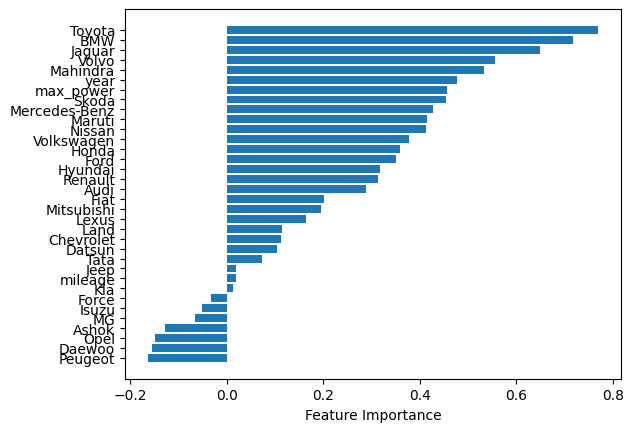

In [348]:
#Feature Importance function from Linear Regression Class
model.feature_importance()

### Saving the model
To provide inference service or deploy, it's best to save the model for latter use.

In [349]:
import pickle
model = {
    'model': model,
    'scaler': scaler,
    'year_default' : 2017,
    'max_power_default' : max_power_default,
    'mileage_default' : mileage_default,
    'brand_ohe' : brand_ohe
}

# save the model to disk
filename = 'car_price_predicition2.model'
pickle.dump(model, open(filename, 'wb'))

## 9. Inference

In [350]:
# load the model from disk
loaded_file = pickle.load(open(filename, 'rb'))

In [351]:
loaded_model = loaded_file['model']
loaded_scaler = loaded_file['scaler']
brand_ohe = loaded_file['brand_ohe']

In [375]:
sample = df [['brand','year','max_power','mileage']].loc[2000]
sample

brand        Chevrolet
year              2014
max_power         82.4
mileage           18.2
Name: 2000, dtype: object

In [374]:
type(brand_ohe)

sklearn.preprocessing._encoders.OneHotEncoder

In [353]:
brand_ohe.categories_

[array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
        'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
        'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
        'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
        'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
        'Volvo'], dtype=object)]

In [379]:
sample_np = np.array([[2014, 82.4, 18.2]])
sample_np

array([[2014. ,   82.4,   18.2]])

In [388]:
# Assuming you have already fitted brand_ohe on your training data
sample_brand_ohe = list(brand_ohe.transform([['Chevrolet']]).toarray()[0])

# Combine the one-hot encoded brand with the other features
sample= np.array([[2014,82.4,18.2]+sample_brand_ohe])

# Now scale the combined sample
sample[:,0:3] = loaded_scaler.transform(sample[:,0:3])
sample = np.insert(sample, 0, 1, axis=1)
sample

array([[ 1.        ,  0.04843522, -0.25789182, -0.29228659,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [389]:
sample.shape

(1, 35)

In [390]:
df['selling_price'].loc[2000]

300000

In [391]:
predicted_price = loaded_model.predict(sample)
predicted_price= np.exp(predicted_price)
predicted_price

array([297815.49585356])

# **Assignment Report**